# Carga de datos

Importamos las librerías necesarias y cargamos el archivo Base_Videos_Final.csv

In [106]:
import pandas as pd
from IPython.display import display

# Cargar el archivo CSV
df_base_videos = pd.read_csv('Base_Videos_Final.csv')

# Mostrar las primeras filas del dataset
display(df_base_videos.head())

,frame_idx,duration,total_frames,video_duration,player_id,player_name,team,zone,ball_position_x,ball_position_y,...,player_speed_mps,prev_speed,player_acceleration_mps2,ball_position_x_prev,ball_position_y_prev,ball_displacement,ball_speed_mps,time_since_last_hit,partido,punto
0,0,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,top,right_box,3.24,17.111111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Partido 27,10.0
1,1,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,top,right_box,3.24,17.111111,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Partido 27,10.0
2,2,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,top,right_box,3.24,17.111111,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Partido 27,10.0
3,3,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,top,right_box,3.24,17.111111,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Partido 27,10.0
4,4,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,top,right_box,3.24,17.111111,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Partido 27,10.0


## Información del dataset

Verificamos la forma del dataset y sus columnas

In [107]:
# Información general del dataset
print(f"Forma del dataset: {df_base_videos.shape}")
print(f"\nColumnas:")
display(df_base_videos.columns.tolist())
print(f"\nInformación del dataset:")
display(df_base_videos.info())

Forma del dataset: (540300, 30)

Columnas:


['frame_idx',
 'duration',
 'total_frames',
 'video_duration',
 'player_id',
 'player_name',
 'team',
 'zone',
 'ball_position_x',
 'ball_position_y',
 'player_position_x',
 'player_position_y',
 'distance_ball_to_net',
 'distance_player_to_ball_m',
 'distance_player_to_net_m',
 'distance_player_to_teammate_m',
 'player_hits_ball',
 'prev_x',
 'prev_y',
 'player_displacement',
 'player_speed_mps',
 'prev_speed',
 'player_acceleration_mps2',
 'ball_position_x_prev',
 'ball_position_y_prev',
 'ball_displacement',
 'ball_speed_mps',
 'time_since_last_hit',
 'partido',
 'punto']


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540300 entries, 0 to 540299
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   frame_idx                      540300 non-null  int64  
 1   duration                       540300 non-null  float64
 2   total_frames                   540300 non-null  int64  
 3   video_duration                 540300 non-null  float64
 4   player_id                      540300 non-null  int64  
 5   player_name                    519424 non-null  object 
 6   team                           159382 non-null  object 
 7   zone                           540300 non-null  object 
 8   ball_position_x                540300 non-null  float64
 9   ball_position_y                540300 non-null  float64
 10  player_position_x              540300 non-null  float64
 11  player_position_y              540300 non-null  float64
 12  dist

None

## Análisis de valores nulos

Revisamos el porcentaje de valores nulos por columna

In [108]:
# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = (df_base_videos.isnull().sum() / len(df_base_videos) * 100).sort_values(ascending=False)
porcentaje_nulos_df = pd.DataFrame({
    'Columna': porcentaje_nulos.index,
    'Porcentaje_Nulos': porcentaje_nulos.values
})

display(porcentaje_nulos_df[porcentaje_nulos_df['Porcentaje_Nulos'] > 0])

,Columna,Porcentaje_Nulos
0,time_since_last_hit,96.971867
1,team,70.501203
2,distance_player_to_teammate_m,52.293911
3,ball_position_x_prev,20.277068
4,ball_speed_mps,20.277068
5,ball_displacement,20.277068
6,ball_position_y_prev,20.277068
7,punto,3.863779
8,player_name,3.863779
9,player_acceleration_mps2,0.963909


## Limpieza de datos

Eliminamos las filas que no tienen player_name o punto

In [109]:
# Tamaño antes de la limpieza
print(f"Tamaño original: {df_base_videos.shape}")

# Eliminar filas sin player_name o punto
df_base_videos_clean = df_base_videos.dropna(subset=['player_name', 'punto'])

# Tamaño después de la limpieza
print(f"Tamaño después de limpieza: {df_base_videos_clean.shape}")
print(f"Filas eliminadas: {len(df_base_videos) - len(df_base_videos_clean)}")

# Actualizar el dataframe principal
df_base_videos = df_base_videos_clean.copy()

Tamaño original: (540300, 30)
Tamaño después de limpieza: (519424, 30)
Filas eliminadas: 20876


## Eliminación de jugadores genéricos

Eliminamos las filas donde el nombre del jugador es Player_x (jugadores no identificados)

In [110]:
# Verificar cuántos registros tienen Player_x como nombre
player_x_count = df_base_videos[df_base_videos['player_name'].str.contains('Player_', na=False)].shape[0]
print(f"Registros con Player_x: {player_x_count}")

# Tamaño antes de eliminar
print(f"Tamaño antes: {df_base_videos.shape}")

# Eliminar filas donde player_name contenga 'Player_'
df_base_videos = df_base_videos[~df_base_videos['player_name'].str.contains('Player_', na=False)]

# Tamaño después
print(f"Tamaño después: {df_base_videos.shape}")
print(f"Filas eliminadas: {player_x_count}")

Registros con Player_x: 192358
Tamaño antes: (519424, 30)
Tamaño después: (327066, 30)
Filas eliminadas: 192358
Tamaño después: (327066, 30)
Filas eliminadas: 192358


## Renombrar columna team a posicion_cancha

La columna team actualmente solo indica "top" o "bottom", así que la renombramos a posicion_cancha

In [111]:
# Renombrar la columna team a posicion_cancha
df_base_videos = df_base_videos.rename(columns={'team': 'posicion_cancha'})

# Verificar el cambio
display(df_base_videos[['player_name', 'posicion_cancha', 'partido', 'punto']].head(10))

,player_name,posicion_cancha,partido,punto
0,Luis Jorge Garcia Camargo,top,Partido 27,10.0
1,Luis Jorge Garcia Camargo,top,Partido 27,10.0
2,Luis Jorge Garcia Camargo,top,Partido 27,10.0
3,Luis Jorge Garcia Camargo,top,Partido 27,10.0
4,Luis Jorge Garcia Camargo,top,Partido 27,10.0
5,Luis Jorge Garcia Camargo,top,Partido 27,10.0
6,Luis Jorge Garcia Camargo,NaN,Partido 27,10.0
7,Luis Jorge Garcia Camargo,NaN,Partido 27,10.0
8,Luis Jorge Garcia Camargo,NaN,Partido 27,10.0
9,Luis Jorge Garcia Camargo,NaN,Partido 27,10.0


## Carga del archivo de levantamiento de datos

Cargamos el archivo que contiene la información de equipos y posiciones de los jugadores

In [112]:
# Cargar el archivo de levantamiento de datos
df_levantamiento = pd.read_csv('Levantamiento_datos_proyecto.csv', sep=';', encoding='latin1')

# Mostrar información básica
display(df_levantamiento.head())
print(f"\nForma del dataset: {df_levantamiento.shape}")
display(df_levantamiento.columns.tolist())

,ID_PARTIDO,CANCHA,ID_PUNTO,ID_JUGADOR_1_EQUIPO_1,ID_JUGADOR_2_EQUIPO_1,ID_JUGADOR_1_EQUIPO_2,ID_JUGADOR_2_EQUIPO_2,POSICION_JUGADOR_1_EQUIPO_1,POSICION_JUGADOR_2_EQUIPO_1,POSICION_JUGADOR_1_EQUIPO_2,POSICION_JUGADOR_2_EQUIPO_2,PUNTO_EQUIPO_1,PUNTO_EQUIPO_2
0,27,1,1,Nicole Lizarazo,Valentina Alejandra Lopez Romero,Luis Jorge Garcia Camargo,Nikol sofia avendaño,IZQUIERDA,DERECHA,IZQUIERDA,DERECHA,1,0.0
1,27,1,2,Nicole Lizarazo,Valentina Alejandra Lopez Romero,Luis Jorge Garcia Camargo,Nikol sofia avendaño,IZQUIERDA,DERECHA,IZQUIERDA,DERECHA,0,1.0
2,27,1,3,Nicole Lizarazo,Valentina Alejandra Lopez Romero,Luis Jorge Garcia Camargo,Nikol sofia avendaño,IZQUIERDA,DERECHA,IZQUIERDA,DERECHA,0,1.0
3,27,1,4,Nicole Lizarazo,Valentina Alejandra Lopez Romero,Luis Jorge Garcia Camargo,Nikol sofia avendaño,IZQUIERDA,DERECHA,IZQUIERDA,DERECHA,1,0.0
4,27,1,5,Nicole Lizarazo,Valentina Alejandra Lopez Romero,Luis Jorge Garcia Camargo,Nikol sofia avendaño,IZQUIERDA,DERECHA,IZQUIERDA,DERECHA,0,1.0



Forma del dataset: (471, 13)


['ID_PARTIDO',
 'CANCHA',
 'ID_PUNTO',
 'ID_JUGADOR_1_EQUIPO_1',
 'ID_JUGADOR_2_EQUIPO_1',
 'ID_JUGADOR_1_EQUIPO_2',
 'ID_JUGADOR_2_EQUIPO_2',
 'POSICION_JUGADOR_1_EQUIPO_1',
 'POSICION_JUGADOR_2_EQUIPO_1',
 'POSICION_JUGADOR_1_EQUIPO_2',
 'POSICION_JUGADOR_2_EQUIPO_2',
 'PUNTO_EQUIPO_1',
 'PUNTO_EQUIPO_2']

## Normalización de nombres de jugadores

Normalizamos los nombres en ambos datasets para poder hacer el merge correctamente

In [113]:
import unicodedata

def normalizar_nombre(nombre):
    """Normaliza un nombre eliminando acentos, convirtiendo a minúsculas y eliminando espacios extra"""
    if pd.isna(nombre):
        return nombre
    # Convertir a string y eliminar espacios extra
    nombre = str(nombre).strip()
    # Eliminar acentos
    nombre = ''.join(c for c in unicodedata.normalize('NFD', nombre) if unicodedata.category(c) != 'Mn')
    # Convertir a minúsculas
    nombre = nombre.lower()
    return nombre

# Normalizar nombres en df_base_videos
df_base_videos['player_name_normalized'] = df_base_videos['player_name'].apply(normalizar_nombre)

# Normalizar nombres en df_levantamiento
for col in ['ID_JUGADOR_1_EQUIPO_1', 'ID_JUGADOR_2_EQUIPO_1', 'ID_JUGADOR_1_EQUIPO_2', 'ID_JUGADOR_2_EQUIPO_2']:
    df_levantamiento[f'{col}_normalized'] = df_levantamiento[col].apply(normalizar_nombre)

# Verificar algunos ejemplos
display(df_base_videos[['player_name', 'player_name_normalized']].drop_duplicates().head(10))

,player_name,player_name_normalized
0,Luis Jorge Garcia Camargo,luis jorge garcia camargo
625,Nicole Lizarazo,nicole lizarazo
1240,Nikol sofia avendaño,nikol sofia avendano
1865,Valentina Alejandra Lopez Romero,valentina alejandra lopez romero
23839,Andrea Julieth Sosa Rodriguez,andrea julieth sosa rodriguez
25939,Valentina Jimenez Gomez,valentina jimenez gomez
43205,Jorge Enrique Lugo Lopez,jorge enrique lugo lopez
43641,María José Cifuentes,maria jose cifuentes
44513,Santiago Peña Beltran,santiago pena beltran
59801,Carlos Felipe Andrade Sáenz,carlos felipe andrade saenz


## Normalización del número de partido

En df_base_videos el partido puede estar como "Partido x" mientras que en levantamiento solo es el número

In [114]:
# Verificar formato actual de partido
display(df_base_videos['partido'].unique()[:10])

# Función para extraer el número del partido
def extraer_numero_partido(partido):
    if pd.isna(partido):
        return partido
    # Convertir a string y normalizar
    partido_str = str(partido).strip().lower()
    # Si contiene "partido", extraer el número
    if 'partido' in partido_str:
        # Extraer solo los dígitos
        import re
        numeros = re.findall(r'\d+', partido_str)
        if numeros:
            return int(numeros[0])
    # Si ya es número, devolverlo como int
    try:
        return int(partido)
    except:
        return None

# Normalizar partido en df_base_videos
df_base_videos['partido_num'] = df_base_videos['partido'].apply(extraer_numero_partido)

# Verificar el resultado
display(df_base_videos[['partido', 'partido_num']].drop_duplicates())

array(['Partido 27', 'Partido 29', 'Partido 35', '1', '11', 11, 13, 15,
       17, 19], dtype=object)

,partido,partido_num
0,Partido 27,27
23839,Partido 29,29
43205,Partido 35,35
59801,1,1
63395,11,11
65536,11,11
89332,13,13
112671,15,15
144563,17,17
163981,19,19


## Crear mapeo de jugador-equipo-posición

Creamos un diccionario que mapee cada jugador a su equipo y posición en cancha por partido y punto

In [115]:
# Crear un dataframe long format con la información de equipos
jugadores_info = []

for _, row in df_levantamiento.iterrows():
    partido = row['ID_PARTIDO']
    punto = row['ID_PUNTO']
    
    # Equipo 1
    jugadores_info.append({
        'partido_num': partido,
        'punto': punto,
        'player_name_normalized': row['ID_JUGADOR_1_EQUIPO_1_normalized'],
        'equipo': f'match_{partido}_team_1',
        'posicion_en_equipo': row['POSICION_JUGADOR_1_EQUIPO_1']
    })
    jugadores_info.append({
        'partido_num': partido,
        'punto': punto,
        'player_name_normalized': row['ID_JUGADOR_2_EQUIPO_1_normalized'],
        'equipo': f'match_{partido}_team_1',
        'posicion_en_equipo': row['POSICION_JUGADOR_2_EQUIPO_1']
    })
    
    # Equipo 2
    jugadores_info.append({
        'partido_num': partido,
        'punto': punto,
        'player_name_normalized': row['ID_JUGADOR_1_EQUIPO_2_normalized'],
        'equipo': f'match_{partido}_team_2',
        'posicion_en_equipo': row['POSICION_JUGADOR_1_EQUIPO_2']
    })
    jugadores_info.append({
        'partido_num': partido,
        'punto': punto,
        'player_name_normalized': row['ID_JUGADOR_2_EQUIPO_2_normalized'],
        'equipo': f'match_{partido}_team_2',
        'posicion_en_equipo': row['POSICION_JUGADOR_2_EQUIPO_2']
    })

df_jugadores_equipos = pd.DataFrame(jugadores_info)

# Verificar el resultado
display(df_jugadores_equipos.head(20))

,partido_num,punto,player_name_normalized,equipo,posicion_en_equipo
0,27,1,nicole lizarazo,match_27_team_1,IZQUIERDA
1,27,1,valentina alejandra lopez romero,match_27_team_1,DERECHA
2,27,1,luis jorge garcia camargo,match_27_team_2,IZQUIERDA
3,27,1,nikol sofia avendano,match_27_team_2,DERECHA
4,27,2,nicole lizarazo,match_27_team_1,IZQUIERDA
5,27,2,valentina alejandra lopez romero,match_27_team_1,DERECHA
6,27,2,luis jorge garcia camargo,match_27_team_2,IZQUIERDA
7,27,2,nikol sofia avendano,match_27_team_2,DERECHA
8,27,3,nicole lizarazo,match_27_team_1,IZQUIERDA
9,27,3,valentina alejandra lopez romero,match_27_team_1,DERECHA


## Hacer merge con el dataset principal

Unimos la información de equipos con el dataset principal usando partido, punto y nombre normalizado

In [116]:
# Hacer el merge
df_base_videos = df_base_videos.merge(
    df_jugadores_equipos,
    on=['partido_num', 'punto', 'player_name_normalized'],
    how='left'
)

# Verificar el resultado del merge
print(f"Forma después del merge: {df_base_videos.shape}")
print(f"\nValores únicos en equipo:")
display(df_base_videos['equipo'].value_counts())
print(f"\nRegistros sin equipo asignado: {df_base_videos['equipo'].isna().sum()}")

# Mostrar algunos ejemplos
display(df_base_videos[['player_name', 'equipo', 'posicion_en_equipo', 'posicion_cancha', 'partido_num', 'punto']].head(20))

Forma después del merge: (327066, 34)

Valores únicos en equipo:


equipo
match_9_team_2     13074
match_18_team_2    10527
match_18_team_1    10477
match_15_team_2    10251
match_20_team_2    10011
match_27_team_2     9826
match_27_team_1     9781
match_22_team_2     9197
match_22_team_1     8997
match_29_team_1     8951
match_29_team_2     8789
match_14_team_2     7912
match_3_team_1      7558
match_13_team_2     7536
match_36_team_1     7458
match_36_team_2     7373
match_11_team_2     7306
match_14_team_1     7200
match_28_team_1     7054
match_38_team_2     6748
match_28_team_2     6693
match_38_team_1     6675
match_12_team_1     6466
match_12_team_2     6374
match_19_team_2     6332
match_37_team_1     5963
match_35_team_1     5932
match_35_team_2     5931
match_17_team_2     5889
match_37_team_2     5662
match_21_team_2     5590
match_31_team_1     4803
match_31_team_2     4752
match_20_team_1     4606
match_23_team_2     4528
match_34_team_2     4445
match_41_team_1     4105
match_41_team_2     4052
match_1_team_2      3594
match_11_team_1   


Registros sin equipo asignado: 5837


,player_name,equipo,posicion_en_equipo,posicion_cancha,partido_num,punto
0,Luis Jorge Garcia Camargo,match_27_team_2,IZQUIERDA,top,27,10.0
1,Luis Jorge Garcia Camargo,match_27_team_2,IZQUIERDA,top,27,10.0
2,Luis Jorge Garcia Camargo,match_27_team_2,IZQUIERDA,top,27,10.0
3,Luis Jorge Garcia Camargo,match_27_team_2,IZQUIERDA,top,27,10.0
4,Luis Jorge Garcia Camargo,match_27_team_2,IZQUIERDA,top,27,10.0
5,Luis Jorge Garcia Camargo,match_27_team_2,IZQUIERDA,top,27,10.0
6,Luis Jorge Garcia Camargo,match_27_team_2,IZQUIERDA,NaN,27,10.0
7,Luis Jorge Garcia Camargo,match_27_team_2,IZQUIERDA,NaN,27,10.0
8,Luis Jorge Garcia Camargo,match_27_team_2,IZQUIERDA,NaN,27,10.0
9,Luis Jorge Garcia Camargo,match_27_team_2,IZQUIERDA,NaN,27,10.0


## Imputar valores faltantes de equipo y posición

Para registros sin equipo/posición, imputamos con el mismo valor de otro registro del mismo jugador y partido

In [117]:
# Para cada jugador en cada partido, el equipo y posición son constantes
# Usamos forward fill y backward fill por grupo de jugador-partido

print(f"Registros sin equipo antes de imputar: {df_base_videos['equipo'].isna().sum()}")
print(f"Registros sin posicion_en_equipo antes de imputar: {df_base_videos['posicion_en_equipo'].isna().sum()}")
print(f"Registros sin posicion_cancha antes de imputar: {df_base_videos['posicion_cancha'].isna().sum()}")

# Imputar equipo y posicion_en_equipo usando los valores conocidos del mismo jugador en el mismo partido
df_base_videos['equipo'] = df_base_videos.groupby(['player_name_normalized', 'partido_num'])['equipo'].transform(
    lambda x: x.ffill().bfill()
)

df_base_videos['posicion_en_equipo'] = df_base_videos.groupby(['player_name_normalized', 'partido_num'])['posicion_en_equipo'].transform(
    lambda x: x.ffill().bfill()
)

df_base_videos['posicion_cancha'] = df_base_videos.groupby(['player_name_normalized', 'partido_num'])['posicion_cancha'].transform(
    lambda x: x.ffill().bfill()
)

print(f"\nRegistros sin equipo después de imputar: {df_base_videos['equipo'].isna().sum()}")
print(f"Registros sin posicion_en_equipo después de imputar: {df_base_videos['posicion_en_equipo'].isna().sum()}")
print(f"Registros sin posicion_cancha después de imputar: {df_base_videos['posicion_cancha'].isna().sum()}")

# Mostrar resumen
display(df_base_videos[['player_name', 'equipo', 'posicion_en_equipo', 'posicion_cancha']].describe())

Registros sin equipo antes de imputar: 5837
Registros sin posicion_en_equipo antes de imputar: 5837
Registros sin posicion_cancha antes de imputar: 193306

Registros sin equipo después de imputar: 0
Registros sin posicion_en_equipo después de imputar: 0
Registros sin posicion_cancha después de imputar: 33842


,player_name,equipo,posicion_en_equipo,posicion_cancha
count,327066,327066,327066,293224
unique,36,54,2,2
top,María José Cifuentes,match_9_team_2,IZQUIERDA,bottom
freq,18532,13074,172802,151807


## Resumen final del procesamiento

Verificamos el estado final del dataset con todas las transformaciones aplicadas

In [118]:
# Resumen del dataset final
print("="*60)
print("RESUMEN DEL DATASET FINAL")
print("="*60)
print(f"\nForma del dataset: {df_base_videos.shape}")
print(f"\nColumnas principales:")
display(['player_name', 'equipo', 'posicion_en_equipo', 'posicion_cancha', 'partido_num', 'punto'])

print(f"\n\nEstadísticas de equipos:")
display(df_base_videos.groupby('equipo')[['player_name']].nunique().rename(columns={'player_name': 'num_jugadores'}))

print(f"\n\nEstadísticas de posiciones:")
print(f"Posiciones en equipo:")
display(df_base_videos['posicion_en_equipo'].value_counts())
print(f"\nPosiciones en cancha:")
display(df_base_videos['posicion_cancha'].value_counts())

print(f"\n\nJugadores únicos: {df_base_videos['player_name'].nunique()}")
print(f"Partidos únicos: {df_base_videos['partido_num'].nunique()}")
print(f"Equipos únicos: {df_base_videos['equipo'].nunique()}")

RESUMEN DEL DATASET FINAL

Forma del dataset: (327066, 34)

Columnas principales:


['player_name',
 'equipo',
 'posicion_en_equipo',
 'posicion_cancha',
 'partido_num',
 'punto']



Estadísticas de equipos:


,num_jugadores
equipo,
match_11_team_1,1
match_11_team_2,2
match_12_team_1,2
match_12_team_2,2
match_13_team_2,2
match_14_team_1,2
match_14_team_2,2
match_15_team_2,2
match_17_team_2,2




Estadísticas de posiciones:
Posiciones en equipo:


posicion_en_equipo
IZQUIERDA    172802
DERECHA      154264
Name: count, dtype: int64


Posiciones en cancha:


posicion_cancha
bottom    151807
top       141417
Name: count, dtype: int64



Jugadores únicos: 36
Partidos únicos: 32
Equipos únicos: 54


## Verificación de valores nulos después del procesamiento

Revisamos nuevamente qué columnas aún tienen valores nulos después de todas las transformaciones

In [119]:
# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = (df_base_videos.isnull().sum() / len(df_base_videos) * 100).sort_values(ascending=False)
porcentaje_nulos_df = pd.DataFrame({
    'Columna': porcentaje_nulos.index,
    'Porcentaje_Nulos': porcentaje_nulos.values
})

display(porcentaje_nulos_df[porcentaje_nulos_df['Porcentaje_Nulos'] > 0])

,Columna,Porcentaje_Nulos
0,time_since_last_hit,97.782405
1,distance_player_to_teammate_m,40.517204
2,ball_speed_mps,31.899372
3,ball_displacement,31.899372
4,ball_position_x_prev,31.899372
5,ball_position_y_prev,31.899372
6,posicion_cancha,10.347147
7,prev_speed,0.621281
8,player_acceleration_mps2,0.621281
9,player_speed_mps,0.310641


## Guardar dataset procesado

Guardamos el dataframe procesado con todas las transformaciones aplicadas

In [120]:
# Guardar el dataframe procesado en un archivo CSV
df_base_videos.to_csv('Base_Videos_Final_Procesado.csv', index=False)

## Imputación de distance_player_to_teammate_m

Utilizamos interpolación temporal por partido y equipo para imputar los valores faltantes de distancia entre compañeros

In [121]:
# Verificar valores nulos antes de la imputación
print(f"Valores nulos en distance_player_to_teammate_m antes: {df_base_videos['distance_player_to_teammate_m'].isna().sum()}")
print(f"Porcentaje: {df_base_videos['distance_player_to_teammate_m'].isna().sum() / len(df_base_videos) * 100:.2f}%")

# Ordenar por partido, equipo y frame para interpolación temporal correcta
df_base_videos = df_base_videos.sort_values(['partido_num', 'equipo', 'frame_idx'])

# Aplicar interpolación temporal por grupo de partido y equipo
df_base_videos['distance_player_to_teammate_m'] = df_base_videos.groupby(['partido_num', 'equipo'])['distance_player_to_teammate_m'].transform(
    lambda x: x.interpolate(method='linear', limit_direction='both')
)

# Verificar valores nulos después de la imputación
print(f"\nValores nulos en distance_player_to_teammate_m después: {df_base_videos['distance_player_to_teammate_m'].isna().sum()}")
print(f"Porcentaje: {df_base_videos['distance_player_to_teammate_m'].isna().sum() / len(df_base_videos) * 100:.2f}%")

# Mostrar estadísticas de la variable imputada
display(df_base_videos['distance_player_to_teammate_m'].describe())

Valores nulos en distance_player_to_teammate_m antes: 132518
Porcentaje: 40.52%

Valores nulos en distance_player_to_teammate_m después: 0
Porcentaje: 0.00%


count    327066.000000
mean          5.300188
std           2.125062
min           0.000000
25%           4.136854
50%           5.474157
75%           6.526783
max          23.147162
Name: distance_player_to_teammate_m, dtype: float64

## Imputación de variables de trayectoria de la pelota

Interpolamos las posiciones de la pelota y recalculamos las variables derivadas (prev, displacement, speed) respetando límites físicos

## Paso 1: Verificación inicial de variables de la pelota

Revisamos el estado de las variables de trayectoria de la pelota antes de interpolar

In [122]:
# Paso 1: Verificar valores nulos antes de la interpolación
print("="*60)
print("IMPUTACIÓN DE VARIABLES DE TRAYECTORIA DE LA PELOTA")
print("="*60)
print("\nValores nulos ANTES de la interpolación:")
print(f"ball_position_x: {df_base_videos['ball_position_x'].isna().sum()} ({df_base_videos['ball_position_x'].isna().sum() / len(df_base_videos) * 100:.2f}%)")
print(f"ball_position_y: {df_base_videos['ball_position_y'].isna().sum()} ({df_base_videos['ball_position_y'].isna().sum() / len(df_base_videos) * 100:.2f}%)")
print(f"ball_position_x_prev: {df_base_videos['ball_position_x_prev'].isna().sum()} ({df_base_videos['ball_position_x_prev'].isna().sum() / len(df_base_videos) * 100:.2f}%)")
print(f"ball_position_y_prev: {df_base_videos['ball_position_y_prev'].isna().sum()} ({df_base_videos['ball_position_y_prev'].isna().sum() / len(df_base_videos) * 100:.2f}%)")
print(f"ball_displacement: {df_base_videos['ball_displacement'].isna().sum()} ({df_base_videos['ball_displacement'].isna().sum() / len(df_base_videos) * 100:.2f}%)")
print(f"ball_speed_mps: {df_base_videos['ball_speed_mps'].isna().sum()} ({df_base_videos['ball_speed_mps'].isna().sum() / len(df_base_videos) * 100:.2f}%)")

IMPUTACIÓN DE VARIABLES DE TRAYECTORIA DE LA PELOTA

Valores nulos ANTES de la interpolación:
ball_position_x: 0 (0.00%)
ball_position_y: 0 (0.00%)
ball_position_x_prev: 104332 (31.90%)
ball_position_y_prev: 104332 (31.90%)
ball_displacement: 104332 (31.90%)
ball_speed_mps: 104332 (31.90%)


## Paso 2: Interpolación de posiciones de la pelota

Interpolamos linealmente las posiciones x e y de la pelota por partido y punto

In [123]:
# Paso 2: Interpolar las posiciones de la pelota por partido y punto
print("\n" + "="*60)
print("PASO 1: INTERPOLACIÓN DE POSICIONES")
print("="*60)

# Asegurar que está ordenado por partido, punto y frame
df_base_videos = df_base_videos.sort_values(['partido_num', 'punto', 'frame_idx'])

# Interpolar ball_position_x y ball_position_y por grupo de partido y punto
df_base_videos['ball_position_x'] = df_base_videos.groupby(['partido_num', 'punto'])['ball_position_x'].transform(
    lambda x: x.interpolate(method='linear', limit_direction='both')
)

df_base_videos['ball_position_y'] = df_base_videos.groupby(['partido_num', 'punto'])['ball_position_y'].transform(
    lambda x: x.interpolate(method='linear', limit_direction='both')
)

print(f"\nValores nulos después de interpolar posiciones:")
print(f"ball_position_x: {df_base_videos['ball_position_x'].isna().sum()}")
print(f"ball_position_y: {df_base_videos['ball_position_y'].isna().sum()}")


PASO 1: INTERPOLACIÓN DE POSICIONES

Valores nulos después de interpolar posiciones:
ball_position_x: 0
ball_position_y: 0


## Paso 3: Recalcular posiciones previas de la pelota

Calculamos las posiciones previas usando shift para determinar el movimiento de la pelota

In [124]:
# Paso 3: Recalcular las posiciones previas con shift por partido y punto
print("\n" + "="*60)
print("PASO 2: RECALCULAR POSICIONES PREVIAS")
print("="*60)

# Calcular las posiciones previas usando shift por grupo
df_base_videos['ball_position_x_prev'] = df_base_videos.groupby(['partido_num', 'punto'])['ball_position_x'].shift(1)
df_base_videos['ball_position_y_prev'] = df_base_videos.groupby(['partido_num', 'punto'])['ball_position_y'].shift(1)

# Rellenar los primeros valores de cada grupo (que quedan NaN) con 0
df_base_videos['ball_position_x_prev'] = df_base_videos['ball_position_x_prev'].fillna(0)
df_base_videos['ball_position_y_prev'] = df_base_videos['ball_position_y_prev'].fillna(0)

print(f"\nValores nulos después de recalcular prev:")
print(f"ball_position_x_prev: {df_base_videos['ball_position_x_prev'].isna().sum()}")
print(f"ball_position_y_prev: {df_base_videos['ball_position_y_prev'].isna().sum()}")


PASO 2: RECALCULAR POSICIONES PREVIAS

Valores nulos después de recalcular prev:
ball_position_x_prev: 0
ball_position_y_prev: 0


## Paso 4: Calcular desplazamiento de la pelota

Calculamos el desplazamiento de la pelota usando las distancias euclidianas entre posiciones

In [125]:
# Paso 4: Recalcular el desplazamiento de la pelota
print("\n" + "="*60)
print("PASO 3: RECALCULAR DISPLACEMENT")
print("="*60)

import numpy as np

# Calcular el desplazamiento usando las posiciones actuales y previas
df_base_videos['ball_displacement'] = np.sqrt(
    (df_base_videos['ball_position_x'] - df_base_videos['ball_position_x_prev'])**2 +
    (df_base_videos['ball_position_y'] - df_base_videos['ball_position_y_prev'])**2
)

print(f"\nValores nulos después de recalcular displacement:")
print(f"ball_displacement: {df_base_videos['ball_displacement'].isna().sum()}")
print(f"\nEstadísticas de ball_displacement:")
display(df_base_videos['ball_displacement'].describe())


PASO 3: RECALCULAR DISPLACEMENT

Valores nulos después de recalcular displacement:
ball_displacement: 0

Estadísticas de ball_displacement:


count    327066.000000
mean          0.064861
std           0.553454
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          26.778434
Name: ball_displacement, dtype: float64

## Paso 5: Calcular velocidad de la pelota con límites físicos

Calculamos la velocidad de la pelota y aplicamos un límite máximo realista de 20 m/s

In [126]:
# Paso 5: Recalcular la velocidad de la pelota con límites físicos
print("\n" + "="*60)
print("PASO 4: RECALCULAR VELOCIDAD CON LÍMITES FÍSICOS")
print("="*60)

# Calcular velocidad: displacement / duration
# Asumiendo que duration está en segundos
df_base_videos['ball_speed_mps'] = df_base_videos['ball_displacement'] / df_base_videos['duration']

# Aplicar límites físicos:
# Velocidad máxima de smash: ~20 m/s (72 km/h)
# Velocidad promedio: ~10-15 m/s
MAX_BALL_SPEED = 20.0  # m/s

# Identificar valores que exceden el límite
valores_exceden = (df_base_videos['ball_speed_mps'] > MAX_BALL_SPEED).sum()
print(f"\nValores que exceden {MAX_BALL_SPEED} m/s: {valores_exceden} ({valores_exceden / len(df_base_videos) * 100:.2f}%)")

# Limitar velocidades al máximo físico
df_base_videos['ball_speed_mps'] = df_base_videos['ball_speed_mps'].clip(upper=MAX_BALL_SPEED)

print(f"\nValores nulos después de recalcular speed:")
print(f"ball_speed_mps: {df_base_videos['ball_speed_mps'].isna().sum()}")
print(f"\nEstadísticas de ball_speed_mps (después de límite):")
display(df_base_videos['ball_speed_mps'].describe())


PASO 4: RECALCULAR VELOCIDAD CON LÍMITES FÍSICOS

Valores que exceden 20.0 m/s: 7652 (2.34%)

Valores nulos después de recalcular speed:
ball_speed_mps: 0

Estadísticas de ball_speed_mps (después de límite):


count    327066.000000
mean          1.196692
std           3.780181
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          20.000000
Name: ball_speed_mps, dtype: float64

## Resumen final: Variables de trayectoria de la pelota

Resumen de todas las transformaciones y estadísticas finales de las variables de la pelota

In [127]:
# Resumen final de la imputación de variables de la pelota
print("\n" + "="*60)
print("RESUMEN FINAL - VARIABLES DE TRAYECTORIA DE LA PELOTA")
print("="*60)

print("\nValores nulos finales:")
print(f"ball_position_x: {df_base_videos['ball_position_x'].isna().sum()}")
print(f"ball_position_y: {df_base_videos['ball_position_y'].isna().sum()}")
print(f"ball_position_x_prev: {df_base_videos['ball_position_x_prev'].isna().sum()}")
print(f"ball_position_y_prev: {df_base_videos['ball_position_y_prev'].isna().sum()}")
print(f"ball_displacement: {df_base_videos['ball_displacement'].isna().sum()}")
print(f"ball_speed_mps: {df_base_videos['ball_speed_mps'].isna().sum()}")

print("\n\nEstadísticas finales de ball_speed_mps:")
display(df_base_videos['ball_speed_mps'].describe())

print(f"\n\nRango de velocidades:")
print(f"Mínima: {df_base_videos['ball_speed_mps'].min():.2f} m/s ({df_base_videos['ball_speed_mps'].min() * 3.6:.2f} km/h)")
print(f"Máxima: {df_base_videos['ball_speed_mps'].max():.2f} m/s ({df_base_videos['ball_speed_mps'].max() * 3.6:.2f} km/h)")
print(f"Media: {df_base_videos['ball_speed_mps'].mean():.2f} m/s ({df_base_videos['ball_speed_mps'].mean() * 3.6:.2f} km/h)")
print(f"Mediana: {df_base_videos['ball_speed_mps'].median():.2f} m/s ({df_base_videos['ball_speed_mps'].median() * 3.6:.2f} km/h)")


RESUMEN FINAL - VARIABLES DE TRAYECTORIA DE LA PELOTA

Valores nulos finales:
ball_position_x: 0
ball_position_y: 0
ball_position_x_prev: 0
ball_position_y_prev: 0
ball_displacement: 0
ball_speed_mps: 0


Estadísticas finales de ball_speed_mps:


count    327066.000000
mean          1.196692
std           3.780181
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          20.000000
Name: ball_speed_mps, dtype: float64



Rango de velocidades:
Mínima: 0.00 m/s (0.00 km/h)
Máxima: 20.00 m/s (72.00 km/h)
Media: 1.20 m/s (4.31 km/h)
Mediana: 0.00 m/s (0.00 km/h)


## Imputación de variables de desplazamiento del jugador

Interpolamos las posiciones del jugador y recalculamos las variables derivadas (prev, displacement, speed, acceleration) respetando límites físicos

## Paso 1: Verificación inicial de variables del jugador

Revisamos el estado de las variables de movimiento del jugador antes de interpolar

In [128]:
# Paso 1: Verificar valores nulos antes de la interpolación
print("="*60)
print("IMPUTACIÓN DE VARIABLES DE DESPLAZAMIENTO DEL JUGADOR")
print("="*60)
print("\nValores nulos ANTES de la interpolación:")
print(f"player_position_x: {df_base_videos['player_position_x'].isna().sum()} ({df_base_videos['player_position_x'].isna().sum() / len(df_base_videos) * 100:.2f}%)")
print(f"player_position_y: {df_base_videos['player_position_y'].isna().sum()} ({df_base_videos['player_position_y'].isna().sum() / len(df_base_videos) * 100:.2f}%)")
print(f"prev_x: {df_base_videos['prev_x'].isna().sum()} ({df_base_videos['prev_x'].isna().sum() / len(df_base_videos) * 100:.2f}%)")
print(f"prev_y: {df_base_videos['prev_y'].isna().sum()} ({df_base_videos['prev_y'].isna().sum() / len(df_base_videos) * 100:.2f}%)")
print(f"player_displacement: {df_base_videos['player_displacement'].isna().sum()} ({df_base_videos['player_displacement'].isna().sum() / len(df_base_videos) * 100:.2f}%)")
print(f"player_speed_mps: {df_base_videos['player_speed_mps'].isna().sum()} ({df_base_videos['player_speed_mps'].isna().sum() / len(df_base_videos) * 100:.2f}%)")
print(f"prev_speed: {df_base_videos['prev_speed'].isna().sum()} ({df_base_videos['prev_speed'].isna().sum() / len(df_base_videos) * 100:.2f}%)")
print(f"player_acceleration_mps2: {df_base_videos['player_acceleration_mps2'].isna().sum()} ({df_base_videos['player_acceleration_mps2'].isna().sum() / len(df_base_videos) * 100:.2f}%)")

IMPUTACIÓN DE VARIABLES DE DESPLAZAMIENTO DEL JUGADOR

Valores nulos ANTES de la interpolación:
player_position_x: 0 (0.00%)
player_position_y: 0 (0.00%)
prev_x: 1016 (0.31%)
prev_y: 1016 (0.31%)
player_displacement: 1016 (0.31%)
player_speed_mps: 1016 (0.31%)
prev_speed: 2032 (0.62%)
player_acceleration_mps2: 2032 (0.62%)


## Paso 2: Interpolación de posiciones del jugador

Interpolamos linealmente las posiciones x e y del jugador por partido, jugador y punto

In [129]:
# Paso 2: Interpolar las posiciones del jugador por partido, jugador y punto
print("\n" + "="*60)
print("PASO 1: INTERPOLACIÓN DE POSICIONES DEL JUGADOR")
print("="*60)

# Interpolar player_position_x y player_position_y por grupo de partido, jugador y punto
df_base_videos['player_position_x'] = df_base_videos.groupby(['partido_num', 'player_name_normalized', 'punto'])['player_position_x'].transform(
    lambda x: x.interpolate(method='linear', limit_direction='both')
)

df_base_videos['player_position_y'] = df_base_videos.groupby(['partido_num', 'player_name_normalized', 'punto'])['player_position_y'].transform(
    lambda x: x.interpolate(method='linear', limit_direction='both')
)

print(f"\nValores nulos después de interpolar posiciones:")
print(f"player_position_x: {df_base_videos['player_position_x'].isna().sum()}")
print(f"player_position_y: {df_base_videos['player_position_y'].isna().sum()}")


PASO 1: INTERPOLACIÓN DE POSICIONES DEL JUGADOR

Valores nulos después de interpolar posiciones:
player_position_x: 0
player_position_y: 0

Valores nulos después de interpolar posiciones:
player_position_x: 0
player_position_y: 0


## Paso 3: Recalcular posiciones previas del jugador

Calculamos las posiciones previas del jugador usando shift para determinar su movimiento

In [130]:
# Paso 3: Recalcular las posiciones previas con shift por partido, jugador y punto
print("\n" + "="*60)
print("PASO 2: RECALCULAR POSICIONES PREVIAS DEL JUGADOR")
print("="*60)

# Calcular las posiciones previas usando shift por grupo
df_base_videos['prev_x'] = df_base_videos.groupby(['partido_num', 'player_name_normalized', 'punto'])['player_position_x'].shift(1)
df_base_videos['prev_y'] = df_base_videos.groupby(['partido_num', 'player_name_normalized', 'punto'])['player_position_y'].shift(1)

# Rellenar los primeros valores de cada grupo (que quedan NaN) con 0
df_base_videos['prev_x'] = df_base_videos['prev_x'].fillna(0)
df_base_videos['prev_y'] = df_base_videos['prev_y'].fillna(0)

print(f"\nValores nulos después de recalcular prev:")
print(f"prev_x: {df_base_videos['prev_x'].isna().sum()}")
print(f"prev_y: {df_base_videos['prev_y'].isna().sum()}")


PASO 2: RECALCULAR POSICIONES PREVIAS DEL JUGADOR

Valores nulos después de recalcular prev:
prev_x: 0
prev_y: 0

Valores nulos después de recalcular prev:
prev_x: 0
prev_y: 0


## Paso 4: Calcular desplazamiento del jugador

Calculamos el desplazamiento del jugador usando las distancias euclidianas entre posiciones

In [131]:
# Paso 4: Recalcular el desplazamiento del jugador
print("\n" + "="*60)
print("PASO 3: RECALCULAR DISPLACEMENT DEL JUGADOR")
print("="*60)

# Calcular el desplazamiento usando las posiciones actuales y previas
df_base_videos['player_displacement'] = np.sqrt(
    (df_base_videos['player_position_x'] - df_base_videos['prev_x'])**2 +
    (df_base_videos['player_position_y'] - df_base_videos['prev_y'])**2
)

print(f"\nValores nulos después de recalcular displacement:")
print(f"player_displacement: {df_base_videos['player_displacement'].isna().sum()}")
print(f"\nEstadísticas de player_displacement:")
display(df_base_videos['player_displacement'].describe())


PASO 3: RECALCULAR DISPLACEMENT DEL JUGADOR

Valores nulos después de recalcular displacement:
player_displacement: 0

Estadísticas de player_displacement:


count    327066.000000
mean          0.063759
std           0.562918
min           0.000000
25%           0.000000
50%           0.000000
75%           0.056569
max          17.988797
Name: player_displacement, dtype: float64

## Paso 5: Calcular velocidad del jugador con límites físicos

Calculamos la velocidad del jugador y aplicamos un límite máximo realista de 4.17 m/s (15 km/h)

In [132]:
# Paso 5: Recalcular la velocidad del jugador con límites físicos
print("\n" + "="*60)
print("PASO 4: RECALCULAR VELOCIDAD DEL JUGADOR CON LÍMITES FÍSICOS")
print("="*60)

# Calcular velocidad: displacement / duration
df_base_videos['player_speed_mps'] = df_base_videos['player_displacement'] / df_base_videos['duration']

# Aplicar límites físicos:
# Velocidad máxima del jugador: ~15 km/h = ~4.17 m/s
MAX_PLAYER_SPEED = 4.17  # m/s (≈15 km/h)

# Identificar valores que exceden el límite
valores_exceden_speed = (df_base_videos['player_speed_mps'] > MAX_PLAYER_SPEED).sum()
print(f"\nValores que exceden {MAX_PLAYER_SPEED} m/s: {valores_exceden_speed} ({valores_exceden_speed / len(df_base_videos) * 100:.2f}%)")

# Limitar velocidades al máximo físico
df_base_videos['player_speed_mps'] = df_base_videos['player_speed_mps'].clip(upper=MAX_PLAYER_SPEED)

print(f"\nValores nulos después de recalcular speed:")
print(f"player_speed_mps: {df_base_videos['player_speed_mps'].isna().sum()}")
print(f"\nEstadísticas de player_speed_mps (después de límite):")
display(df_base_videos['player_speed_mps'].describe())


PASO 4: RECALCULAR VELOCIDAD DEL JUGADOR CON LÍMITES FÍSICOS

Valores que exceden 4.17 m/s: 10681 (3.27%)

Valores nulos después de recalcular speed:
player_speed_mps: 0

Estadísticas de player_speed_mps (después de límite):


count    327066.000000
mean          0.710951
std           1.298654
min           0.000000
25%           0.000000
50%           0.000000
75%           1.697056
max           4.170000
Name: player_speed_mps, dtype: float64

## Paso 6: Calcular aceleración del jugador con límites físicos

Calculamos la aceleración del jugador y aplicamos límites físicos de ±4.7 m/s²

In [133]:
# Paso 6: Recalcular prev_speed y aceleración del jugador con límites físicos
print("\n" + "="*60)
print("PASO 5: RECALCULAR PREV_SPEED Y ACELERACIÓN CON LÍMITES")
print("="*60)

# Calcular la velocidad previa usando shift por grupo
df_base_videos['prev_speed'] = df_base_videos.groupby(['partido_num', 'player_name_normalized', 'punto'])['player_speed_mps'].shift(1)

# Rellenar los primeros valores de cada grupo con 0
df_base_videos['prev_speed'] = df_base_videos['prev_speed'].fillna(0)

# Calcular aceleración: (speed - prev_speed) / duration
df_base_videos['player_acceleration_mps2'] = (df_base_videos['player_speed_mps'] - df_base_videos['prev_speed']) / df_base_videos['duration']

# Aplicar límites físicos:
# Aceleración máxima del jugador: ~4.5-4.7 m/s²
MAX_PLAYER_ACCELERATION = 4.7  # m/s²
MIN_PLAYER_ACCELERATION = -4.7  # m/s² (desaceleración)

# Identificar valores que exceden el límite
valores_exceden_acc = ((df_base_videos['player_acceleration_mps2'] > MAX_PLAYER_ACCELERATION) | 
                       (df_base_videos['player_acceleration_mps2'] < MIN_PLAYER_ACCELERATION)).sum()
print(f"\nValores que exceden ±{MAX_PLAYER_ACCELERATION} m/s²: {valores_exceden_acc} ({valores_exceden_acc / len(df_base_videos) * 100:.2f}%)")

# Limitar aceleraciones al máximo físico
df_base_videos['player_acceleration_mps2'] = df_base_videos['player_acceleration_mps2'].clip(
    lower=MIN_PLAYER_ACCELERATION, 
    upper=MAX_PLAYER_ACCELERATION
)

print(f"\nValores nulos después de recalcular prev_speed y aceleración:")
print(f"prev_speed: {df_base_videos['prev_speed'].isna().sum()}")
print(f"player_acceleration_mps2: {df_base_videos['player_acceleration_mps2'].isna().sum()}")
print(f"\nEstadísticas de player_acceleration_mps2 (después de límite):")
display(df_base_videos['player_acceleration_mps2'].describe())


PASO 5: RECALCULAR PREV_SPEED Y ACELERACIÓN CON LÍMITES

Valores que exceden ±4.7 m/s²: 108089 (33.05%)

Valores nulos después de recalcular prev_speed y aceleración:
prev_speed: 0
player_acceleration_mps2: 0

Estadísticas de player_acceleration_mps2 (después de límite):


count    327066.000000
mean         -0.004412
std           2.701911
min          -4.700000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.700000
Name: player_acceleration_mps2, dtype: float64

## Resumen final: Variables de movimiento del jugador

Resumen de todas las transformaciones y estadísticas finales de las variables de movimiento

In [134]:
# Resumen final de la imputación de variables del jugador
print("\n" + "="*60)
print("RESUMEN FINAL - VARIABLES DE DESPLAZAMIENTO DEL JUGADOR")
print("="*60)

print("\nValores nulos finales:")
print(f"player_position_x: {df_base_videos['player_position_x'].isna().sum()}")
print(f"player_position_y: {df_base_videos['player_position_y'].isna().sum()}")
print(f"prev_x: {df_base_videos['prev_x'].isna().sum()}")
print(f"prev_y: {df_base_videos['prev_y'].isna().sum()}")
print(f"player_displacement: {df_base_videos['player_displacement'].isna().sum()}")
print(f"player_speed_mps: {df_base_videos['player_speed_mps'].isna().sum()}")
print(f"prev_speed: {df_base_videos['prev_speed'].isna().sum()}")
print(f"player_acceleration_mps2: {df_base_videos['player_acceleration_mps2'].isna().sum()}")

print("\n\nEstadísticas finales de player_speed_mps:")
display(df_base_videos['player_speed_mps'].describe())

print(f"\n\nRango de velocidades:")
print(f"Mínima: {df_base_videos['player_speed_mps'].min():.2f} m/s ({df_base_videos['player_speed_mps'].min() * 3.6:.2f} km/h)")
print(f"Máxima: {df_base_videos['player_speed_mps'].max():.2f} m/s ({df_base_videos['player_speed_mps'].max() * 3.6:.2f} km/h)")
print(f"Media: {df_base_videos['player_speed_mps'].mean():.2f} m/s ({df_base_videos['player_speed_mps'].mean() * 3.6:.2f} km/h)")
print(f"Mediana: {df_base_videos['player_speed_mps'].median():.2f} m/s ({df_base_videos['player_speed_mps'].median() * 3.6:.2f} km/h)")

print("\n\nEstadísticas finales de player_acceleration_mps2:")
display(df_base_videos['player_acceleration_mps2'].describe())

print(f"\n\nRango de aceleraciones:")
print(f"Mínima: {df_base_videos['player_acceleration_mps2'].min():.2f} m/s²")
print(f"Máxima: {df_base_videos['player_acceleration_mps2'].max():.2f} m/s²")
print(f"Media: {df_base_videos['player_acceleration_mps2'].mean():.2f} m/s²")
print(f"Mediana: {df_base_videos['player_acceleration_mps2'].median():.2f} m/s²")


RESUMEN FINAL - VARIABLES DE DESPLAZAMIENTO DEL JUGADOR

Valores nulos finales:
player_position_x: 0
player_position_y: 0
prev_x: 0
prev_y: 0
player_displacement: 0
player_speed_mps: 0
prev_speed: 0
player_acceleration_mps2: 0


Estadísticas finales de player_speed_mps:


count    327066.000000
mean          0.710951
std           1.298654
min           0.000000
25%           0.000000
50%           0.000000
75%           1.697056
max           4.170000
Name: player_speed_mps, dtype: float64



Rango de velocidades:
Mínima: 0.00 m/s (0.00 km/h)
Máxima: 4.17 m/s (15.01 km/h)
Media: 0.71 m/s (2.56 km/h)
Mediana: 0.00 m/s (0.00 km/h)


Estadísticas finales de player_acceleration_mps2:


count    327066.000000
mean         -0.004412
std           2.701911
min          -4.700000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.700000
Name: player_acceleration_mps2, dtype: float64



Rango de aceleraciones:
Mínima: -4.70 m/s²
Máxima: 4.70 m/s²
Media: -0.00 m/s²
Mediana: 0.00 m/s²


## Verificación final de valores nulos

Verificamos qué columnas aún tienen valores nulos después de todas las imputaciones

In [135]:
# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = (df_base_videos.isnull().sum() / len(df_base_videos) * 100).sort_values(ascending=False)
porcentaje_nulos_df = pd.DataFrame({
    'Columna': porcentaje_nulos.index,
    'Porcentaje_Nulos': porcentaje_nulos.values
})

display(porcentaje_nulos_df[porcentaje_nulos_df['Porcentaje_Nulos'] > 0])

,Columna,Porcentaje_Nulos
0,time_since_last_hit,97.782405
1,posicion_cancha,10.347147


## Imputación de posicion_cancha

Rellenamos los valores nulos de posicion_cancha con 'Desconocida'

In [136]:
df_base_videos['posicion_cancha'] = df_base_videos['posicion_cancha'].fillna('Desconocida')

## Recalcular time_since_last_hit

Calculamos el tiempo transcurrido desde el último golpe usando la variable player_hits_ball

## Verificación inicial de time_since_last_hit

Revisamos el estado de la variable time_since_last_hit antes del recálculo

In [137]:
# Verificar valores nulos y estadísticas antes del recalculo
print("="*60)
print("RECÁLCULO DE TIME_SINCE_LAST_HIT")
print("="*60)
print(f"\nValores nulos en time_since_last_hit antes: {df_base_videos['time_since_last_hit'].isna().sum()}")
print(f"Porcentaje: {df_base_videos['time_since_last_hit'].isna().sum() / len(df_base_videos) * 100:.2f}%")

print(f"\nValores únicos en player_hits_ball:")
display(df_base_videos['player_hits_ball'].value_counts())

print(f"\nRegistros donde el jugador golpea la pelota: {(df_base_videos['player_hits_ball'] == 1).sum()}")
print(f"Porcentaje: {(df_base_videos['player_hits_ball'] == 1).sum() / len(df_base_videos) * 100:.2f}%")

RECÁLCULO DE TIME_SINCE_LAST_HIT

Valores nulos en time_since_last_hit antes: 319813
Porcentaje: 97.78%

Valores únicos en player_hits_ball:


player_hits_ball
False    324260
True       2806
Name: count, dtype: int64


Registros donde el jugador golpea la pelota: 2806
Porcentaje: 0.86%


## Cálculo de time_since_last_hit

Calculamos el tiempo transcurrido desde el último golpe de pelota por partido y punto

In [138]:
# Asegurar que el dataframe está ordenado por partido, punto y frame
df_base_videos = df_base_videos.sort_values(['partido_num', 'punto', 'frame_idx'])

# Crear una columna auxiliar para identificar cuándo hay un golpe
# Acumular el tiempo desde el último golpe por partido y punto
def calcular_time_since_last_hit(group):
    """
    Para cada grupo (partido, punto), calcula el tiempo transcurrido desde el último golpe
    """
    # Inicializar con NaN
    time_since_hit = pd.Series(index=group.index, dtype=float)
    
    # Encontrar los índices donde hay golpes
    hit_indices = group[group['player_hits_ball'] == 1].index
    
    if len(hit_indices) == 0:
        # Si no hay golpes en este punto, llenar con NaN o con el tiempo acumulado total
        time_since_hit[:] = (group['duration'].cumsum()).values
    else:
        # Calcular tiempo acumulado desde el inicio
        cumulative_time = group['duration'].cumsum()
        
        # Para cada frame, encontrar el tiempo desde el último golpe
        last_hit_time = 0
        last_hit_idx = None
        
        for idx in group.index:
            current_time = cumulative_time.loc[idx]
            
            # Si este frame tiene un golpe, resetear el tiempo
            if group.loc[idx, 'player_hits_ball'] == 1:
                time_since_hit.loc[idx] = 0
                last_hit_time = current_time
                last_hit_idx = idx
            else:
                # Calcular tiempo desde el último golpe
                if last_hit_idx is not None:
                    time_since_hit.loc[idx] = current_time - last_hit_time
                else:
                    # Si aún no ha habido golpes, usar el tiempo acumulado
                    time_since_hit.loc[idx] = current_time
    
    return time_since_hit

# Aplicar la función por grupo de partido y punto
print("\nCalculando time_since_last_hit...")
df_base_videos['time_since_last_hit'] = df_base_videos.groupby(['partido_num', 'punto']).apply(
    calcular_time_since_last_hit
).reset_index(level=[0, 1], drop=True)

print("Cálculo completado.")


Calculando time_since_last_hit...
Cálculo completado.
Cálculo completado.


## Verificación de resultados de time_since_last_hit

Verificamos que el cálculo de tiempo desde último golpe funcionó correctamente

In [139]:
# Verificar resultados después del recálculo
print("\n" + "="*60)
print("RESULTADOS DEL RECÁLCULO")
print("="*60)

print(f"\nValores nulos en time_since_last_hit después: {df_base_videos['time_since_last_hit'].isna().sum()}")
print(f"Porcentaje: {df_base_videos['time_since_last_hit'].isna().sum() / len(df_base_videos) * 100:.2f}%")

print(f"\nEstadísticas de time_since_last_hit:")
display(df_base_videos['time_since_last_hit'].describe())

# Mostrar algunos ejemplos de frames con golpes y sus tiempos
print(f"\n\nEjemplos de frames con golpes (time_since_last_hit = 0):")
display(df_base_videos[df_base_videos['player_hits_ball'] == 1][
    ['partido_num', 'punto', 'frame_idx', 'player_name', 'player_hits_ball', 'time_since_last_hit', 'duration']
].head(10))

print(f"\n\nEjemplos de frames sin golpes (con tiempo acumulado):")
display(df_base_videos[df_base_videos['player_hits_ball'] == 0][
    ['partido_num', 'punto', 'frame_idx', 'player_name', 'player_hits_ball', 'time_since_last_hit', 'duration']
].head(10))


RESULTADOS DEL RECÁLCULO

Valores nulos en time_since_last_hit después: 0
Porcentaje: 0.00%

Estadísticas de time_since_last_hit:


count    327066.000000
mean          8.160215
std          11.548153
min           0.000000
25%           1.333333
50%           4.033333
75%          10.100000
max         100.733333
Name: time_since_last_hit, dtype: float64



Ejemplos de frames con golpes (time_since_last_hit = 0):


,partido_num,punto,frame_idx,player_name,player_hits_ball,time_since_last_hit,duration
49494,1,1.0,451,Carlos Felipe Andrade Sáenz,True,0.0,0.033333
49504,1,1.0,461,Carlos Felipe Andrade Sáenz,True,0.0,0.033333
49516,1,1.0,473,Carlos Felipe Andrade Sáenz,True,0.0,0.033333
49517,1,1.0,474,Carlos Felipe Andrade Sáenz,True,0.0,0.033333
49518,1,1.0,475,Carlos Felipe Andrade Sáenz,True,0.0,0.033333
50579,1,3.0,25,Carlos Felipe Andrade Sáenz,True,0.0,0.033333
50580,1,3.0,26,Carlos Felipe Andrade Sáenz,True,0.0,0.033333
50582,1,3.0,28,Carlos Felipe Andrade Sáenz,True,0.0,0.033333
50583,1,3.0,29,Carlos Felipe Andrade Sáenz,True,0.0,0.033333
50584,1,3.0,30,Carlos Felipe Andrade Sáenz,True,0.0,0.033333




Ejemplos de frames sin golpes (con tiempo acumulado):


,partido_num,punto,frame_idx,player_name,player_hits_ball,time_since_last_hit,duration
49210,1,1.0,0,Carlos Felipe Andrade Sáenz,False,0.033333,0.033333
49707,1,1.0,0,Santiago Navarro Cuy,False,0.066667,0.033333
49211,1,1.0,1,Carlos Felipe Andrade Sáenz,False,0.100000,0.033333
49708,1,1.0,1,Santiago Navarro Cuy,False,0.133333,0.033333
49212,1,1.0,2,Carlos Felipe Andrade Sáenz,False,0.166667,0.033333
49709,1,1.0,2,Santiago Navarro Cuy,False,0.200000,0.033333
49213,1,1.0,3,Carlos Felipe Andrade Sáenz,False,0.233333,0.033333
49710,1,1.0,3,Santiago Navarro Cuy,False,0.266667,0.033333
49214,1,1.0,4,Carlos Felipe Andrade Sáenz,False,0.300000,0.033333
49711,1,1.0,4,Santiago Navarro Cuy,False,0.333333,0.033333


## Agregación de variables por jugador-partido

Creamos un dataset agregado con las variables más importantes a nivel jugador-partido para modelado

## Preparación para agregación: verificación de columnas de zona

Verificamos si existen columnas relacionadas con zona de juego para la agregación

In [140]:
# Crear variable auxiliar para zona ofensiva/defensiva
# Asumiendo que 'zone' contiene información de ataque/defensa
# Si zone no existe o tiene otro formato, ajustar según sea necesario

print("="*60)
print("AGREGACIÓN POR JUGADOR-PARTIDO")
print("="*60)

# Verificar las columnas disponibles relacionadas con zona
print("\nColumnas relacionadas con zona:")
zone_cols = [col for col in df_base_videos.columns if 'zone' in col.lower()]
display(zone_cols)

# Si existe la columna zone, verificar sus valores
if 'zone' in df_base_videos.columns:
    print("\nValores únicos en zone:")
    display(df_base_videos['zone'].value_counts())
else:
    print("\nNota: La columna 'zone' no está disponible")

AGREGACIÓN POR JUGADOR-PARTIDO

Columnas relacionadas con zona:


['zone']


Valores únicos en zone:


zone
left_box      137265
right_box     135899
back_court     53902
Name: count, dtype: int64

## Creación de variables derivadas para agregación

Creamos variables binarias útiles para el análisis agregado (near_ball, zonas ofensiva/defensiva)

In [141]:
# Crear variables derivadas necesarias para la agregación

# 1. Variable para frames con distancia a pelota < 2m
df_base_videos['near_ball'] = (df_base_videos['distance_player_to_ball_m'] < 2).astype(int)

# 2. Si existe zone, crear variable binaria para zona ofensiva
if 'zone' in df_base_videos.columns:
    # Ajustar según los valores reales de zone
    df_base_videos['in_offensive_zone'] = df_base_videos['zone'].str.contains('attack|offensive', case=False, na=False).astype(int)
    df_base_videos['in_defensive_zone'] = df_base_videos['zone'].str.contains('defense|defensive', case=False, na=False).astype(int)
else:
    # Si no existe zone, crear valores nulos o estimarlos basados en distancia a la red
    # Zona ofensiva: cerca de la red (< 3m por ejemplo)
    df_base_videos['in_offensive_zone'] = (df_base_videos['distance_player_to_net_m'] < 3).astype(int)
    df_base_videos['in_defensive_zone'] = (df_base_videos['distance_player_to_net_m'] >= 3).astype(int)

print("Variables derivadas creadas exitosamente.")

Variables derivadas creadas exitosamente.


## Agregación de datos por jugador-partido

Creamos el dataset agregado calculando estadísticas por jugador en cada partido (medias, sumas, etc.)

In [142]:
# Crear dataset agregado por jugador-partido
agg_dict = {
    # 1. Velocidad media del jugador
    'player_speed_mps': ['mean', lambda x: x.quantile(0.90), 'std'],
    
    # 3. Distancia total recorrida
    'player_displacement': ['sum', 'mean', 'std'],
    
    # 4. Distancia media a la pelota (y mínima)
    'distance_player_to_ball_m': ['mean', 'min'],
    
    # 5. Distancia media a la red
    'distance_player_to_net_m': 'mean',
    
    # 6. Distancia media al compañero
    'distance_player_to_teammate_m': 'mean',
    
    # 8. Número de golpes (hits)
    'player_hits_ball': 'sum',
    
    # 9. Tiempo promedio desde último golpe
    'time_since_last_hit': 'mean',
    
    # 11. Aceleración media
    'player_acceleration_mps2': ['mean', 'std'],
    
    # 12. Duración total
    'duration': 'sum',
    
    # Variables derivadas
    'near_ball': 'sum',  # Para calcular % frames cerca de pelota
    'in_offensive_zone': 'sum',  # Para calcular % tiempo en zona ofensiva
    'in_defensive_zone': 'sum'  # Para calcular tiempo en zona defensiva
}

# Realizar la agregación
df_player_partido = df_base_videos.groupby(['player_name_normalized', 'partido_num']).agg(agg_dict)

# Aplanar columnas multi-nivel
df_player_partido.columns = ['_'.join(col).strip('_') if col[1] else col[0] 
                              for col in df_player_partido.columns.values]

# Renombrar columnas para mayor claridad
rename_dict = {
    'player_speed_mps_mean': 'velocidad_media_mps',
    'player_speed_mps_<lambda>': 'velocidad_p90_mps',
    'player_speed_mps_std': 'velocidad_std_mps',
    'player_displacement_sum': 'distancia_total_m',
    'player_displacement_mean': 'distancia_media_por_frame_m',
    'player_displacement_std': 'desplazamiento_std_m',
    'distance_player_to_ball_m_mean': 'distancia_media_pelota_m',
    'distance_player_to_ball_m_min': 'distancia_min_pelota_m',
    'distance_player_to_net_m_mean': 'distancia_media_red_m',
    'distance_player_to_teammate_m_mean': 'distancia_media_companero_m',
    'player_hits_ball_sum': 'num_golpes',
    'time_since_last_hit_mean': 'tiempo_promedio_desde_ultimo_golpe_s',
    'player_acceleration_mps2_mean': 'aceleracion_media_mps2',
    'player_acceleration_mps2_std': 'aceleracion_std_mps2',
    'duration_sum': 'duracion_total_s',
    'near_ball_sum': 'frames_cerca_pelota',
    'in_offensive_zone_sum': 'frames_zona_ofensiva',
    'in_defensive_zone_sum': 'frames_zona_defensiva'
}

df_player_partido.rename(columns=rename_dict, inplace=True)

# Calcular variables derivadas adicionales
# Total de frames por jugador-partido
df_player_partido['total_frames'] = df_base_videos.groupby(['player_name_normalized', 'partido_num']).size()

# Porcentaje de frames cerca de la pelota (< 2m)
df_player_partido['pct_frames_cerca_pelota'] = (df_player_partido['frames_cerca_pelota'] / 
                                                  df_player_partido['total_frames'] * 100)

# Porcentaje de tiempo en zona ofensiva
df_player_partido['pct_tiempo_zona_ofensiva'] = (df_player_partido['frames_zona_ofensiva'] / 
                                                   df_player_partido['total_frames'] * 100)

# Tiempo total en zona defensiva (en segundos)
# Asumiendo que cada frame tiene un duration, usamos la proporción de frames
df_player_partido['tiempo_zona_defensiva_s'] = (df_player_partido['frames_zona_defensiva'] / 
                                                  df_player_partido['total_frames']) * df_player_partido['duracion_total_s']

# Resetear índice para tener jugador y partido como columnas
df_player_partido.reset_index(inplace=True)

print(f"Dataset agregado creado: {df_player_partido.shape[0]} registros (jugador-partido)")
print(f"Columnas: {df_player_partido.shape[1]}")
display(df_player_partido.head(10))

Dataset agregado creado: 104 registros (jugador-partido)
Columnas: 24


,player_name_normalized,partido_num,velocidad_media_mps,player_speed_mps_<lambda_0>,velocidad_std_mps,distancia_total_m,distancia_media_por_frame_m,desplazamiento_std_m,distancia_media_pelota_m,distancia_min_pelota_m,...,aceleracion_media_mps2,aceleracion_std_mps2,duracion_total_s,frames_cerca_pelota,frames_zona_ofensiva,frames_zona_defensiva,total_frames,pct_frames_cerca_pelota,pct_tiempo_zona_ofensiva,tiempo_zona_defensiva_s
0,andrea julieth sosa rodriguez,17,0.443454,1.697056,0.953379,161.955737,0.055012,0.398716,5.880587,0.283505,...,-0.012772,2.468738,98.133333,186,0,0,2944,6.317935,0.0,0.0
1,andrea julieth sosa rodriguez,23,0.538182,1.697056,0.999859,141.817336,0.062640,0.400295,11.885809,0.119588,...,-0.006228,2.764619,75.466667,30,0,0,2264,1.325088,0.0,0.0
2,andrea julieth sosa rodriguez,29,0.751067,1.697056,1.179528,401.862926,0.090266,0.744584,7.794564,0.200000,...,-0.010557,2.926757,148.400000,271,0,0,4452,6.087152,0.0,0.0
3,carlos felipe andrade saenz,1,0.526525,1.697056,1.023018,57.247365,0.036862,0.259287,8.597797,1.048512,...,-0.009079,2.555969,51.766667,177,0,0,1553,11.397296,0.0,0.0
4,carlos felipe andrade saenz,19,1.722628,4.170000,1.456344,723.624796,0.228561,1.202169,10.652102,2.211195,...,0.025237,3.742612,105.533333,0,0,0,3166,0.000000,0.0,0.0
5,carlos felipe andrade saenz,21,0.648310,1.697056,1.173588,354.911036,0.112420,0.507808,4.798010,0.040000,...,-0.019354,2.742981,105.233333,586,0,0,3157,18.561926,0.0,0.0
6,cesar camilo diaz cufino,9,0.867422,3.394113,1.542613,384.496383,0.058818,0.418233,5.999708,0.120000,...,-0.006471,2.538726,108.950000,709,0,0,6537,10.845954,0.0,0.0
7,cesar camilo diaz cufino,14,0.353326,3.394113,1.043873,129.089414,0.033253,0.568454,7.058445,0.040000,...,-0.001211,1.939665,64.700000,486,0,0,3882,12.519320,0.0,0.0
8,cristian stevan soto zapata,32,0.801852,1.697056,1.092823,201.949697,0.091339,0.798494,6.445585,0.976322,...,-0.034012,3.282372,73.700000,26,0,0,2211,1.175938,0.0,0.0
9,cristian stevan soto zapata,41,0.320100,1.697056,0.754841,36.656416,0.017547,0.135562,3.574061,0.621968,...,0.002250,2.241709,69.633333,739,0,0,2089,35.375778,0.0,0.0


## Estadísticas descriptivas del dataset agregado

Mostramos un resumen estadístico del dataset agregado por jugador-partido

In [143]:
# Verificar estadísticas descriptivas del dataset agregado
print("Estadísticas descriptivas del dataset agregado:")
display(df_player_partido.describe())

print("\nPrimeras 5 filas:")
display(df_player_partido.head())

print("\nVerificación de nulos:")
nulls = df_player_partido.isnull().sum()
display(nulls[nulls > 0] if nulls.sum() > 0 else "No hay valores nulos")

Estadísticas descriptivas del dataset agregado:


,partido_num,velocidad_media_mps,player_speed_mps_<lambda_0>,velocidad_std_mps,distancia_total_m,distancia_media_por_frame_m,desplazamiento_std_m,distancia_media_pelota_m,distancia_min_pelota_m,distancia_media_red_m,...,aceleracion_media_mps2,aceleracion_std_mps2,duracion_total_s,frames_cerca_pelota,frames_zona_ofensiva,frames_zona_defensiva,total_frames,pct_frames_cerca_pelota,pct_tiempo_zona_ofensiva,tiempo_zona_defensiva_s
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,...,104.000000,104.000000,104.000000,104.000000,104.0,104.0,104.000000,104.000000,104.0,104.0
mean,24.884615,0.717287,2.778701,1.243216,200.513182,0.071358,0.541242,6.668900,0.751379,4.764580,...,-0.004611,2.687564,76.876122,313.894231,0.0,0.0,3144.865385,9.986258,0.0,0.0
std,12.587795,0.297824,0.906192,0.279146,126.802533,0.045537,0.247054,2.373831,1.082761,1.780990,...,0.011101,0.385722,39.821622,413.845263,0.0,0.0,1308.234503,12.720358,0.0,0.0
min,1.000000,0.204742,0.000000,0.597759,36.656416,0.011415,0.096482,1.399087,0.000000,0.717631,...,-0.039698,1.837163,15.450000,0.000000,0.0,0.0,927.000000,0.000000,0.0,0.0
25%,14.000000,0.490527,1.697056,0.995823,116.983746,0.035685,0.378769,5.116533,0.139204,3.327293,...,-0.009871,2.468107,53.333333,26.000000,0.0,0.0,2096.500000,1.128639,0.0,0.0
50%,27.000000,0.654197,3.394113,1.253491,170.921851,0.061108,0.553740,6.135509,0.340756,4.627598,...,-0.003066,2.659377,74.383333,161.000000,0.0,0.0,3161.500000,6.246336,0.0,0.0
75%,36.000000,0.949312,3.394113,1.454923,246.158013,0.094994,0.708519,7.964268,0.877652,5.899331,...,0.002243,2.925875,99.291667,451.000000,0.0,0.0,3988.000000,13.382087,0.0,0.0
max,44.000000,1.722628,4.170000,1.777129,723.624796,0.269796,1.202169,14.602281,7.295439,8.489038,...,0.025237,3.742612,173.933333,2107.000000,0.0,0.0,6537.000000,86.814998,0.0,0.0



Primeras 5 filas:


,player_name_normalized,partido_num,velocidad_media_mps,player_speed_mps_<lambda_0>,velocidad_std_mps,distancia_total_m,distancia_media_por_frame_m,desplazamiento_std_m,distancia_media_pelota_m,distancia_min_pelota_m,...,aceleracion_media_mps2,aceleracion_std_mps2,duracion_total_s,frames_cerca_pelota,frames_zona_ofensiva,frames_zona_defensiva,total_frames,pct_frames_cerca_pelota,pct_tiempo_zona_ofensiva,tiempo_zona_defensiva_s
0,andrea julieth sosa rodriguez,17,0.443454,1.697056,0.953379,161.955737,0.055012,0.398716,5.880587,0.283505,...,-0.012772,2.468738,98.133333,186,0,0,2944,6.317935,0.0,0.0
1,andrea julieth sosa rodriguez,23,0.538182,1.697056,0.999859,141.817336,0.062640,0.400295,11.885809,0.119588,...,-0.006228,2.764619,75.466667,30,0,0,2264,1.325088,0.0,0.0
2,andrea julieth sosa rodriguez,29,0.751067,1.697056,1.179528,401.862926,0.090266,0.744584,7.794564,0.200000,...,-0.010557,2.926757,148.400000,271,0,0,4452,6.087152,0.0,0.0
3,carlos felipe andrade saenz,1,0.526525,1.697056,1.023018,57.247365,0.036862,0.259287,8.597797,1.048512,...,-0.009079,2.555969,51.766667,177,0,0,1553,11.397296,0.0,0.0
4,carlos felipe andrade saenz,19,1.722628,4.170000,1.456344,723.624796,0.228561,1.202169,10.652102,2.211195,...,0.025237,3.742612,105.533333,0,0,0,3166,0.000000,0.0,0.0



Verificación de nulos:


'No hay valores nulos'

## Guardar dataset agregado

Guardamos el dataset agregado por jugador-partido en un archivo CSV

In [144]:
# Guardar el dataset agregado
output_file = 'Jugador_Partido_Features.csv'
df_player_partido.to_csv(output_file, index=False, encoding='utf-8')
print(f"Dataset agregado guardado en: {output_file}")
print(f"Dimensiones: {df_player_partido.shape}")
print(f"\nColumnas incluidas ({len(df_player_partido.columns)}):")
for i, col in enumerate(df_player_partido.columns, 1):
    print(f"  {i}. {col}")

Dataset agregado guardado en: Jugador_Partido_Features.csv
Dimensiones: (104, 24)

Columnas incluidas (24):
  1. player_name_normalized
  2. partido_num
  3. velocidad_media_mps
  4. player_speed_mps_<lambda_0>
  5. velocidad_std_mps
  6. distancia_total_m
  7. distancia_media_por_frame_m
  8. desplazamiento_std_m
  9. distancia_media_pelota_m
  10. distancia_min_pelota_m
  11. distancia_media_red_m
  12. distancia_media_companero_m
  13. num_golpes
  14. tiempo_promedio_desde_ultimo_golpe_s
  15. aceleracion_media_mps2
  16. aceleracion_std_mps2
  17. duracion_total_s
  18. frames_cerca_pelota
  19. frames_zona_ofensiva
  20. frames_zona_defensiva
  21. total_frames
  22. pct_frames_cerca_pelota
  23. pct_tiempo_zona_ofensiva
  24. tiempo_zona_defensiva_s


## Resultados de partidos

## Generación de dataset de resultados por partido

Creamos un dataset con los resultados finales de cada partido sumando los puntos de cada equipo

In [145]:
# Generar dataset de resultados de partidos
# PUNTO_EQUIPO_1 y PUNTO_EQUIPO_2 indican quién ganó cada punto (1 o 0)
# Necesitamos sumar todos los puntos para obtener el resultado final

# Extraer número de partido de ID_PARTIDO si no existe
if 'partido_num' not in df_levantamiento.columns:
    df_levantamiento['partido_num'] = df_levantamiento['ID_PARTIDO'].apply(extraer_numero_partido)

# Convertir columnas de puntos a numéricas
df_levantamiento['PUNTO_EQUIPO_1'] = pd.to_numeric(df_levantamiento['PUNTO_EQUIPO_1'], errors='coerce')
df_levantamiento['PUNTO_EQUIPO_2'] = pd.to_numeric(df_levantamiento['PUNTO_EQUIPO_2'], errors='coerce')

# Agrupar por partido y SUMAR los puntos de cada equipo (no máximo)
resultados_partidos = df_levantamiento.groupby('partido_num').agg({
    'PUNTO_EQUIPO_1': 'sum',
    'PUNTO_EQUIPO_2': 'sum'
}).reset_index()

# Renombrar columnas
resultados_partidos.rename(columns={
    'PUNTO_EQUIPO_1': 'puntos_team_1',
    'PUNTO_EQUIPO_2': 'puntos_team_2'
}, inplace=True)

# Determinar ganador del partido
resultados_partidos['ganador'] = resultados_partidos.apply(
    lambda row: 'team_1' if row['puntos_team_1'] > row['puntos_team_2'] else 'team_2', 
    axis=1
)

# Convertir a enteros
resultados_partidos['puntos_team_1'] = resultados_partidos['puntos_team_1'].astype(int)
resultados_partidos['puntos_team_2'] = resultados_partidos['puntos_team_2'].astype(int)

display(resultados_partidos.head(10))
print(f"\nTotal de partidos: {len(resultados_partidos)}")
print(f"Partidos ganados por team_1: {(resultados_partidos['ganador'] == 'team_1').sum()}")
print(f"Partidos ganados por team_2: {(resultados_partidos['ganador'] == 'team_2').sum()}")

,partido_num,puntos_team_1,puntos_team_2,ganador
0,1,7,1,team_1
1,2,7,2,team_1
2,3,5,7,team_2
3,4,7,2,team_1
4,5,7,6,team_1
5,6,6,6,team_2
6,7,2,7,team_2
7,8,7,4,team_1
8,9,6,5,team_1
9,10,6,6,team_2



Total de partidos: 43
Partidos ganados por team_1: 19
Partidos ganados por team_2: 24


## Verificación de estructura de puntos

Verificamos cómo están estructurados los puntos en el dataset original

In [146]:
# Verificar datos originales para entender la estructura de puntos
print("Verificando estructura de puntos en el dataset original:")
display(df_levantamiento[['partido_num', 'ID_PUNTO', 'PUNTO_EQUIPO_1', 'PUNTO_EQUIPO_2']].head(20))

# Ver algunos partidos completos
print("\nEjemplo de Partido 1 completo:")
partido_1 = df_levantamiento[df_levantamiento['partido_num'] == 1][['partido_num', 'ID_PUNTO', 'PUNTO_EQUIPO_1', 'PUNTO_EQUIPO_2']]
display(partido_1)

Verificando estructura de puntos en el dataset original:


,partido_num,ID_PUNTO,PUNTO_EQUIPO_1,PUNTO_EQUIPO_2
0,27,1,1.0,0.0
1,27,2,0.0,1.0
2,27,3,0.0,1.0
3,27,4,1.0,0.0
4,27,5,0.0,1.0
5,27,6,1.0,0.0
6,27,7,0.0,1.0
7,27,8,1.0,0.0
8,27,9,0.0,1.0
9,27,10,1.0,0.0



Ejemplo de Partido 1 completo:


,partido_num,ID_PUNTO,PUNTO_EQUIPO_1,PUNTO_EQUIPO_2
202,1,1,1.0,0.0
203,1,2,0.0,1.0
204,1,3,1.0,0.0
205,1,4,1.0,0.0
206,1,5,1.0,0.0
207,1,6,1.0,0.0
208,1,7,1.0,0.0
209,1,8,1.0,0.0


## Guardar dataset de resultados

Guardamos el dataset de resultados de partidos en un archivo CSV

In [147]:
# Guardar el dataset de resultados
resultados_partidos.to_csv('Resultados_Partidos.csv', index=False, encoding='utf-8')
print(f"Dataset de resultados guardado: Resultados_Partidos.csv")
print(f"Dimensiones: {resultados_partidos.shape}")

Dataset de resultados guardado: Resultados_Partidos.csv
Dimensiones: (43, 4)


## Añadir información de victoria al dataset de jugador-partido

Integramos los resultados de partidos con el dataset agregado para saber si cada jugador ganó o perdió

In [148]:
# Añadir información de si ganó o no el partido al dataset de jugador-partido
# Primero necesitamos mapear cada jugador a su equipo en cada partido

# Crear un mapeo de jugador-partido a equipo desde df_base_videos
jugador_partido_equipo = df_base_videos[['player_name_normalized', 'partido_num', 'equipo']].drop_duplicates()

# Mergear con el dataset agregado
df_player_partido = df_player_partido.merge(
    jugador_partido_equipo,
    on=['player_name_normalized', 'partido_num'],
    how='left'
)

# Extraer el número de equipo del formato 'match_X_team_Y'
df_player_partido['team_num'] = df_player_partido['equipo'].str.extract(r'team_(\d+)').astype(int)

# Mergear con resultados de partidos
df_player_partido = df_player_partido.merge(
    resultados_partidos,
    on='partido_num',
    how='left'
)

# Determinar si ganó el partido
df_player_partido['gano_partido'] = df_player_partido.apply(
    lambda row: 1 if f"team_{row['team_num']}" == row['ganador'] else 0,
    axis=1
)

# Verificar el resultado
print("Columnas añadidas: equipo, team_num, puntos_team_1, puntos_team_2, ganador, gano_partido")
print(f"\nJugadores que ganaron: {df_player_partido['gano_partido'].sum()}")
print(f"Jugadores que perdieron: {(df_player_partido['gano_partido'] == 0).sum()}")
display(df_player_partido[['player_name_normalized', 'partido_num', 'equipo', 'puntos_team_1', 'puntos_team_2', 'ganador', 'gano_partido']].head(10))

Columnas añadidas: equipo, team_num, puntos_team_1, puntos_team_2, ganador, gano_partido

Jugadores que ganaron: 52
Jugadores que perdieron: 52


,player_name_normalized,partido_num,equipo,puntos_team_1,puntos_team_2,ganador,gano_partido
0,andrea julieth sosa rodriguez,17,match_17_team_2,6,6,team_2,1
1,andrea julieth sosa rodriguez,23,match_23_team_2,7,5,team_1,0
2,andrea julieth sosa rodriguez,29,match_29_team_1,7,5,team_1,1
3,carlos felipe andrade saenz,1,match_1_team_2,7,1,team_1,0
4,carlos felipe andrade saenz,19,match_19_team_2,7,4,team_1,0
5,carlos felipe andrade saenz,21,match_21_team_2,2,7,team_2,1
6,cesar camilo diaz cufino,9,match_9_team_2,6,5,team_1,0
7,cesar camilo diaz cufino,14,match_14_team_2,7,4,team_1,0
8,cristian stevan soto zapata,32,match_32_team_1,7,5,team_1,1
9,cristian stevan soto zapata,41,match_41_team_2,5,7,team_2,1


## Guardar dataset actualizado con victoria

Guardamos el dataset de jugador-partido con la columna de victoria añadida

In [149]:
# Guardar el dataset actualizado con la información de victoria
df_player_partido.to_csv('Jugador_Partido_Features.csv', index=False, encoding='utf-8')
print(f"Dataset actualizado guardado: Jugador_Partido_Features.csv")
print(f"Dimensiones: {df_player_partido.shape}")
print(f"\nColumnas finales ({len(df_player_partido.columns)}):")
for i, col in enumerate(df_player_partido.columns, 1):
    print(f"  {i}. {col}")

Dataset actualizado guardado: Jugador_Partido_Features.csv
Dimensiones: (104, 30)

Columnas finales (30):
  1. player_name_normalized
  2. partido_num
  3. velocidad_media_mps
  4. player_speed_mps_<lambda_0>
  5. velocidad_std_mps
  6. distancia_total_m
  7. distancia_media_por_frame_m
  8. desplazamiento_std_m
  9. distancia_media_pelota_m
  10. distancia_min_pelota_m
  11. distancia_media_red_m
  12. distancia_media_companero_m
  13. num_golpes
  14. tiempo_promedio_desde_ultimo_golpe_s
  15. aceleracion_media_mps2
  16. aceleracion_std_mps2
  17. duracion_total_s
  18. frames_cerca_pelota
  19. frames_zona_ofensiva
  20. frames_zona_defensiva
  21. total_frames
  22. pct_frames_cerca_pelota
  23. pct_tiempo_zona_ofensiva
  24. tiempo_zona_defensiva_s
  25. equipo
  26. team_num
  27. puntos_team_1
  28. puntos_team_2
  29. ganador
  30. gano_partido


## Integración con datos de jugadores

## Cargar datos de perfil de jugadores

Cargamos el archivo con información personal y características de los jugadores (edad, experiencia, etc.)

In [150]:
# Cargar datos de jugadores
df_jugadores = pd.read_csv('Datos_Jugadores_Padel(Respuestas de formulario 1).csv', encoding='latin1')

print(f"Datos de jugadores cargados: {df_jugadores.shape}")
print(f"\nColumnas disponibles:")
display(df_jugadores.columns.tolist())
print(f"\nPrimeras filas:")
display(df_jugadores.head())

Datos de jugadores cargados: (35, 27)

Columnas disponibles:


['Marca temporal',
 'NOMBRE',
 'CODIGO_ESTUDIANTE',
 'CIUDAD',
 'EDAD',
 'GENERO',
 'PROGRAMA_ACADEMICO',
 'SEMESTRE',
 'EXPERIENCIA_PADEL',
 'TIEMPO_JUGANDO_PADEL',
 'PRACTICA_OTRO_DEPORTE_RAQUETA',
 'NIVEL_ACTUAL_PADEL',
 'ESTADO_FISICO',
 'FRECUENCIA_DEPORTE',
 'ESTATURA',
 'TALLA',
 'MANO_DOMINANTE',
 'RITMO_CARDIACO',
 'LESIONES_LY',
 'RAZON_PARTICIPACION',
 'OBJETIVO_ACTIVIDAD',
 'INTERES_PADEL',
 'CLASES_PADEL',
 'DESAYUNO',
 '¿Que desayunaste?',
 'GENERO_MUSICAL_FAVORITO',
 'COMENTARIOS']


Primeras filas:


,Marca temporal,NOMBRE,CODIGO_ESTUDIANTE,CIUDAD,EDAD,GENERO,PROGRAMA_ACADEMICO,SEMESTRE,EXPERIENCIA_PADEL,TIEMPO_JUGANDO_PADEL,...,RITMO_CARDIACO,LESIONES_LY,RAZON_PARTICIPACION,OBJETIVO_ACTIVIDAD,INTERES_PADEL,CLASES_PADEL,DESAYUNO,¿Que desayunaste?,GENERO_MUSICAL_FAVORITO,COMENTARIOS
0,8/7/2025 8:40:19,Cristian Stevan Soto Zapata,260647,Sopo,22,Masculino,Ingeniería Informática,9,No,Menos de 6 meses,...,NaN,No,Por la materia,Aprender,Sí,Sí,Si,Huevos,Reggaeton,Excelente actividad
1,8/7/2025 8:40:30,Maria Fernanda Tamayo Lopez,242491,Cajica,21,Femenino,Ingeniería Informática,7,No,Menos de 6 meses,...,67,No,Me gustan los deportes,Aprender a jugar Padel,Tal vez,Sí,Si,"Calentado, huevo frito y salchicha",Rock,Pan con queso
2,8/7/2025 8:40:56,Tomas Barrios Guevara,299043,Bogota - Occidente,20,Masculino,Ingeniería Informática,6,No,Menos de 6 meses,...,90,Sí,Proyecto y aprender,Identificar como juego y patrones de las personas,Tal vez,Sí,Si,Pastel de carne,Reggaeton,Que sea una buena experiencia
3,8/7/2025 8:40:57,Santiago Navarro Cuy,305992,Cajica,19,Masculino,Ingeniería Informática,6,No,Menos de 6 meses,...,NaN,No,Probar un deporte nuevo,Jugar un nuevo deporte,Tal vez,Tal vez,Si,tamal,Electronica,Buena actividad
4,8/7/2025 8:40:57,Fermín Alejandro Escalona Guillen,300181,Bogota - Norte,19,Masculino,Ingeniería Informática,6,No,Menos de 6 meses,...,NaN,Sí,Diversión,Divertirme,Sí,Sí,Si,Empanada con cafe,Reggaeton,Qué actividad tan divertida


## Preparación de datos de jugadores para merge

Normalizamos nombres y seleccionamos columnas relevantes del perfil de jugadores

In [151]:
# Normalizar nombres en el dataset de jugadores
df_jugadores['nombre_normalizado'] = df_jugadores['NOMBRE'].apply(normalizar_nombre)

# Seleccionar columnas relevantes para el merge
columnas_jugador = [
    'nombre_normalizado', 'EDAD', 'GENERO', 'EXPERIENCIA_PADEL', 
    'TIEMPO_JUGANDO_PADEL', 'NIVEL_ACTUAL_PADEL', 'ESTADO_FISICO',
    'FRECUENCIA_DEPORTE', 'ESTATURA', 'TALLA', 'MANO_DOMINANTE',
    'PRACTICA_OTRO_DEPORTE_RAQUETA'
]

df_jugadores_info = df_jugadores[columnas_jugador].copy()

print(f"Jugadores con información: {len(df_jugadores_info)}")
print(f"\nColumnas a añadir:")
display(columnas_jugador[1:])  # Excluir nombre_normalizado
print(f"\nPrimeras filas procesadas:")
display(df_jugadores_info.head())

Jugadores con información: 35

Columnas a añadir:


['EDAD',
 'GENERO',
 'EXPERIENCIA_PADEL',
 'TIEMPO_JUGANDO_PADEL',
 'NIVEL_ACTUAL_PADEL',
 'ESTADO_FISICO',
 'FRECUENCIA_DEPORTE',
 'ESTATURA',
 'TALLA',
 'MANO_DOMINANTE',
 'PRACTICA_OTRO_DEPORTE_RAQUETA']


Primeras filas procesadas:


,nombre_normalizado,EDAD,GENERO,EXPERIENCIA_PADEL,TIEMPO_JUGANDO_PADEL,NIVEL_ACTUAL_PADEL,ESTADO_FISICO,FRECUENCIA_DEPORTE,ESTATURA,TALLA,MANO_DOMINANTE,PRACTICA_OTRO_DEPORTE_RAQUETA
0,cristian stevan soto zapata,22,Masculino,No,Menos de 6 meses,Primera vez,Bueno,3-4 veces,172,68.0,Derecha,No
1,maria fernanda tamayo lopez,21,Femenino,No,Menos de 6 meses,Primera vez,Bueno,3-4 veces,167,55.0,Derecha,Tenis de mesa
2,tomas barrios guevara,20,Masculino,No,Menos de 6 meses,Principiante,Bueno,3-4 veces,168,70.0,Derecha,No
3,santiago navarro cuy,19,Masculino,No,Menos de 6 meses,Primera vez,Malo,0 veces,180,85.0,Derecha,No
4,fermin alejandro escalona guillen,19,Masculino,No,Menos de 6 meses,Primera vez,Excelente,Más de 4 veces,176,75.0,Derecha,No


## Integrar datos de perfil de jugadores

Hacemos merge del dataset agregado con la información personal de los jugadores

In [152]:
# Mergear con el dataset de jugador-partido
df_player_partido_completo = df_player_partido.merge(
    df_jugadores_info,
    left_on='player_name_normalized',
    right_on='nombre_normalizado',
    how='left'
)

# Eliminar columna duplicada
df_player_partido_completo.drop('nombre_normalizado', axis=1, inplace=True)

print(f"Dataset después del merge: {df_player_partido_completo.shape}")
print(f"\nJugadores sin información de perfil:")
jugadores_desconocido = df_player_partido_completo[df_player_partido_completo['EDAD'].isna()]['player_name_normalized'].unique()
print(f"Total: {len(jugadores_desconocido)}")
display(jugadores_desconocido)

print(f"\nNulos por columna después del merge:")
nulos_restantes = df_player_partido_completo.isnull().sum()
display(nulos_restantes[nulos_restantes > 0])

Dataset después del merge: (107, 41)

Jugadores sin información de perfil:
Total: 9


array(['carlos felipe andrade saenz', 'jaime andres castillo alvarez',
       'jorge enrique lugo lopez', 'luis jorge garcia camargo',
       'maria jose cifuentes', 'nicolas navarro', 'nicole lizarazo',
       'nikol sofia avendano', 'santiago gutierrez de pineres barbosa'],
      dtype=object)


Nulos por columna después del merge:


EDAD                             31
GENERO                           31
EXPERIENCIA_PADEL                31
TIEMPO_JUGANDO_PADEL             31
NIVEL_ACTUAL_PADEL               31
ESTADO_FISICO                    31
FRECUENCIA_DEPORTE               31
ESTATURA                         31
TALLA                            31
MANO_DOMINANTE                   31
PRACTICA_OTRO_DEPORTE_RAQUETA    31
dtype: int64

## Imputación de valores faltantes de perfil

Imputamos valores faltantes: categóricas con 'Desconocido', numéricas con mediana

In [153]:
# Imputar valores faltantes
# Columnas categóricas: llenar con "Desconocido"
columnas_categoricas = ['GENERO', 'EXPERIENCIA_PADEL', 'TIEMPO_JUGANDO_PADEL', 
                        'NIVEL_ACTUAL_PADEL', 'ESTADO_FISICO', 'FRECUENCIA_DEPORTE',
                        'MANO_DOMINANTE', 'PRACTICA_OTRO_DEPORTE_RAQUETA']

for col in columnas_categoricas:
    df_player_partido_completo[col].fillna('Desconocido', inplace=True)

# Columnas numéricas: imputar con la mediana
columnas_numericas = ['EDAD', 'ESTATURA', 'TALLA']

for col in columnas_numericas:
    mediana = df_player_partido_completo[col].median()
    df_player_partido_completo[col].fillna(mediana, inplace=True)
    print(f"{col}: imputado con mediana = {mediana}")

print(f"\nVerificación de nulos después de la imputación:")
nulos_finales = df_player_partido_completo.isnull().sum()
display(nulos_finales[nulos_finales > 0] if nulos_finales.sum() > 0 else "No hay valores nulos")

print(f"\nDataset completo: {df_player_partido_completo.shape}")
display(df_player_partido_completo.head())

EDAD: imputado con mediana = 19.0
ESTATURA: imputado con mediana = 173.0
TALLA: imputado con mediana = 64.0

Verificación de nulos después de la imputación:


'No hay valores nulos'


Dataset completo: (107, 41)


,player_name_normalized,partido_num,velocidad_media_mps,player_speed_mps_<lambda_0>,velocidad_std_mps,distancia_total_m,distancia_media_por_frame_m,desplazamiento_std_m,distancia_media_pelota_m,distancia_min_pelota_m,...,GENERO,EXPERIENCIA_PADEL,TIEMPO_JUGANDO_PADEL,NIVEL_ACTUAL_PADEL,ESTADO_FISICO,FRECUENCIA_DEPORTE,ESTATURA,TALLA,MANO_DOMINANTE,PRACTICA_OTRO_DEPORTE_RAQUETA
0,andrea julieth sosa rodriguez,17,0.443454,1.697056,0.953379,161.955737,0.055012,0.398716,5.880587,0.283505,...,Femenino,No,Menos de 6 meses,Primera vez,Bueno,3-4 veces,162.0,50.0,Derecha,Tenis
1,andrea julieth sosa rodriguez,23,0.538182,1.697056,0.999859,141.817336,0.062640,0.400295,11.885809,0.119588,...,Femenino,No,Menos de 6 meses,Primera vez,Bueno,3-4 veces,162.0,50.0,Derecha,Tenis
2,andrea julieth sosa rodriguez,29,0.751067,1.697056,1.179528,401.862926,0.090266,0.744584,7.794564,0.200000,...,Femenino,No,Menos de 6 meses,Primera vez,Bueno,3-4 veces,162.0,50.0,Derecha,Tenis
3,carlos felipe andrade saenz,1,0.526525,1.697056,1.023018,57.247365,0.036862,0.259287,8.597797,1.048512,...,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,173.0,64.0,Desconocido,Desconocido
4,carlos felipe andrade saenz,19,1.722628,4.170000,1.456344,723.624796,0.228561,1.202169,10.652102,2.211195,...,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,173.0,64.0,Desconocido,Desconocido


## Guardar dataset completo final

Guardamos el dataset completo con todas las variables: rendimiento, perfil y resultados

In [154]:
# Guardar el dataset completo
df_player_partido_completo.to_csv('Jugador_Partido_Features_Completo.csv', index=False, encoding='utf-8')
print(f"Dataset completo guardado: Jugador_Partido_Features_Completo.csv")
print(f"Dimensiones finales: {df_player_partido_completo.shape}")
print(f"\nColumnas totales ({len(df_player_partido_completo.columns)}):")
for i, col in enumerate(df_player_partido_completo.columns, 1):
    print(f"  {i}. {col}")

Dataset completo guardado: Jugador_Partido_Features_Completo.csv
Dimensiones finales: (107, 41)

Columnas totales (41):
  1. player_name_normalized
  2. partido_num
  3. velocidad_media_mps
  4. player_speed_mps_<lambda_0>
  5. velocidad_std_mps
  6. distancia_total_m
  7. distancia_media_por_frame_m
  8. desplazamiento_std_m
  9. distancia_media_pelota_m
  10. distancia_min_pelota_m
  11. distancia_media_red_m
  12. distancia_media_companero_m
  13. num_golpes
  14. tiempo_promedio_desde_ultimo_golpe_s
  15. aceleracion_media_mps2
  16. aceleracion_std_mps2
  17. duracion_total_s
  18. frames_cerca_pelota
  19. frames_zona_ofensiva
  20. frames_zona_defensiva
  21. total_frames
  22. pct_frames_cerca_pelota
  23. pct_tiempo_zona_ofensiva
  24. tiempo_zona_defensiva_s
  25. equipo
  26. team_num
  27. puntos_team_1
  28. puntos_team_2
  29. ganador
  30. gano_partido
  31. EDAD
  32. GENERO
  33. EXPERIENCIA_PADEL
  34. TIEMPO_JUGANDO_PADEL
  35. NIVEL_ACTUAL_PADEL
  36. ESTADO_FISICO


# EDA (Exploratory Data Analysis)

## Análisis exploratorio completo del dataset Jugador-Partido

## Cargar dataset para EDA

Cargamos el dataset completo para realizar el análisis exploratorio

In [155]:
# Cargar el dataset completo para el EDA
df_eda = pd.read_csv('Jugador_Partido_Features_Completo.csv')
print(f"Dataset cargado para EDA: {df_eda.shape}")
display(df_eda.head(3))

Dataset cargado para EDA: (107, 41)


,player_name_normalized,partido_num,velocidad_media_mps,player_speed_mps_<lambda_0>,velocidad_std_mps,distancia_total_m,distancia_media_por_frame_m,desplazamiento_std_m,distancia_media_pelota_m,distancia_min_pelota_m,...,GENERO,EXPERIENCIA_PADEL,TIEMPO_JUGANDO_PADEL,NIVEL_ACTUAL_PADEL,ESTADO_FISICO,FRECUENCIA_DEPORTE,ESTATURA,TALLA,MANO_DOMINANTE,PRACTICA_OTRO_DEPORTE_RAQUETA
0,andrea julieth sosa rodriguez,17,0.443454,1.697056,0.953379,161.955737,0.055012,0.398716,5.880587,0.283505,...,Femenino,No,Menos de 6 meses,Primera vez,Bueno,3-4 veces,162.0,50.0,Derecha,Tenis
1,andrea julieth sosa rodriguez,23,0.538182,1.697056,0.999859,141.817336,0.062640,0.400295,11.885809,0.119588,...,Femenino,No,Menos de 6 meses,Primera vez,Bueno,3-4 veces,162.0,50.0,Derecha,Tenis
2,andrea julieth sosa rodriguez,29,0.751067,1.697056,1.179528,401.862926,0.090266,0.744584,7.794564,0.200000,...,Femenino,No,Menos de 6 meses,Primera vez,Bueno,3-4 veces,162.0,50.0,Derecha,Tenis


### 1. Visión General del Dataset

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de visualizaciones
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("=" * 80)
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 80)
print(f"\nDimensiones: {df_eda.shape[0]} filas × {df_eda.shape[1]} columnas")
print(f"\nJugadores únicos: {df_eda['player_name_normalized'].nunique()}")
print(f"Partidos únicos: {df_eda['partido_num'].nunique()}")
print(f"\nDistribución de victorias:")
print(f"  - Ganadores: {df_eda['gano_partido'].sum()} ({df_eda['gano_partido'].sum()/len(df_eda)*100:.1f}%)")
print(f"  - Perdedores: {(df_eda['gano_partido'] == 0).sum()} ({(df_eda['gano_partido'] == 0).sum()/len(df_eda)*100:.1f}%)")

print("\n" + "=" * 80)
print("TIPOS DE DATOS POR COLUMNA")
print("=" * 80)
tipos = df_eda.dtypes.value_counts()
for tipo, cantidad in tipos.items():
    print(f"  {tipo}: {cantidad} columnas")

print("\n" + "=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS CLAVE")
print("=" * 80)
cols_rendimiento = ['velocidad_media_mps', 'distancia_total_m', 'num_golpes', 
                    'distancia_media_pelota_m', 'aceleracion_media_mps2', 'EDAD', 'ESTATURA']
display(df_eda[cols_rendimiento].describe())

INFORMACIÓN GENERAL DEL DATASET

Dimensiones: 107 filas × 41 columnas

Jugadores únicos: 35
Partidos únicos: 32

Distribución de victorias:
  - Ganadores: 54 (50.5%)
  - Perdedores: 53 (49.5%)

TIPOS DE DATOS POR COLUMNA
  float64: 20 columnas
  object: 11 columnas
  int64: 10 columnas

ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS CLAVE


,velocidad_media_mps,distancia_total_m,num_golpes,distancia_media_pelota_m,aceleracion_media_mps2,EDAD,ESTATURA
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,0.709328,198.805120,27.700935,6.663723,-0.004636,19.420561,171.841121
std,0.297528,126.131026,37.967766,2.407385,0.010978,0.971649,6.127805
min,0.204742,36.656416,0.000000,1.399087,-0.039698,17.000000,160.000000
25%,0.480498,115.173553,3.000000,5.012310,-0.009989,19.000000,170.000000
50%,0.626796,170.610724,14.000000,6.127052,-0.003095,19.000000,173.000000
75%,0.932372,245.733749,31.000000,7.988846,0.002068,20.000000,174.000000
max,1.722628,723.624796,169.000000,14.602281,0.025237,22.000000,186.000000


### 2. Análisis Univariado - Variables Numéricas de Rendimiento

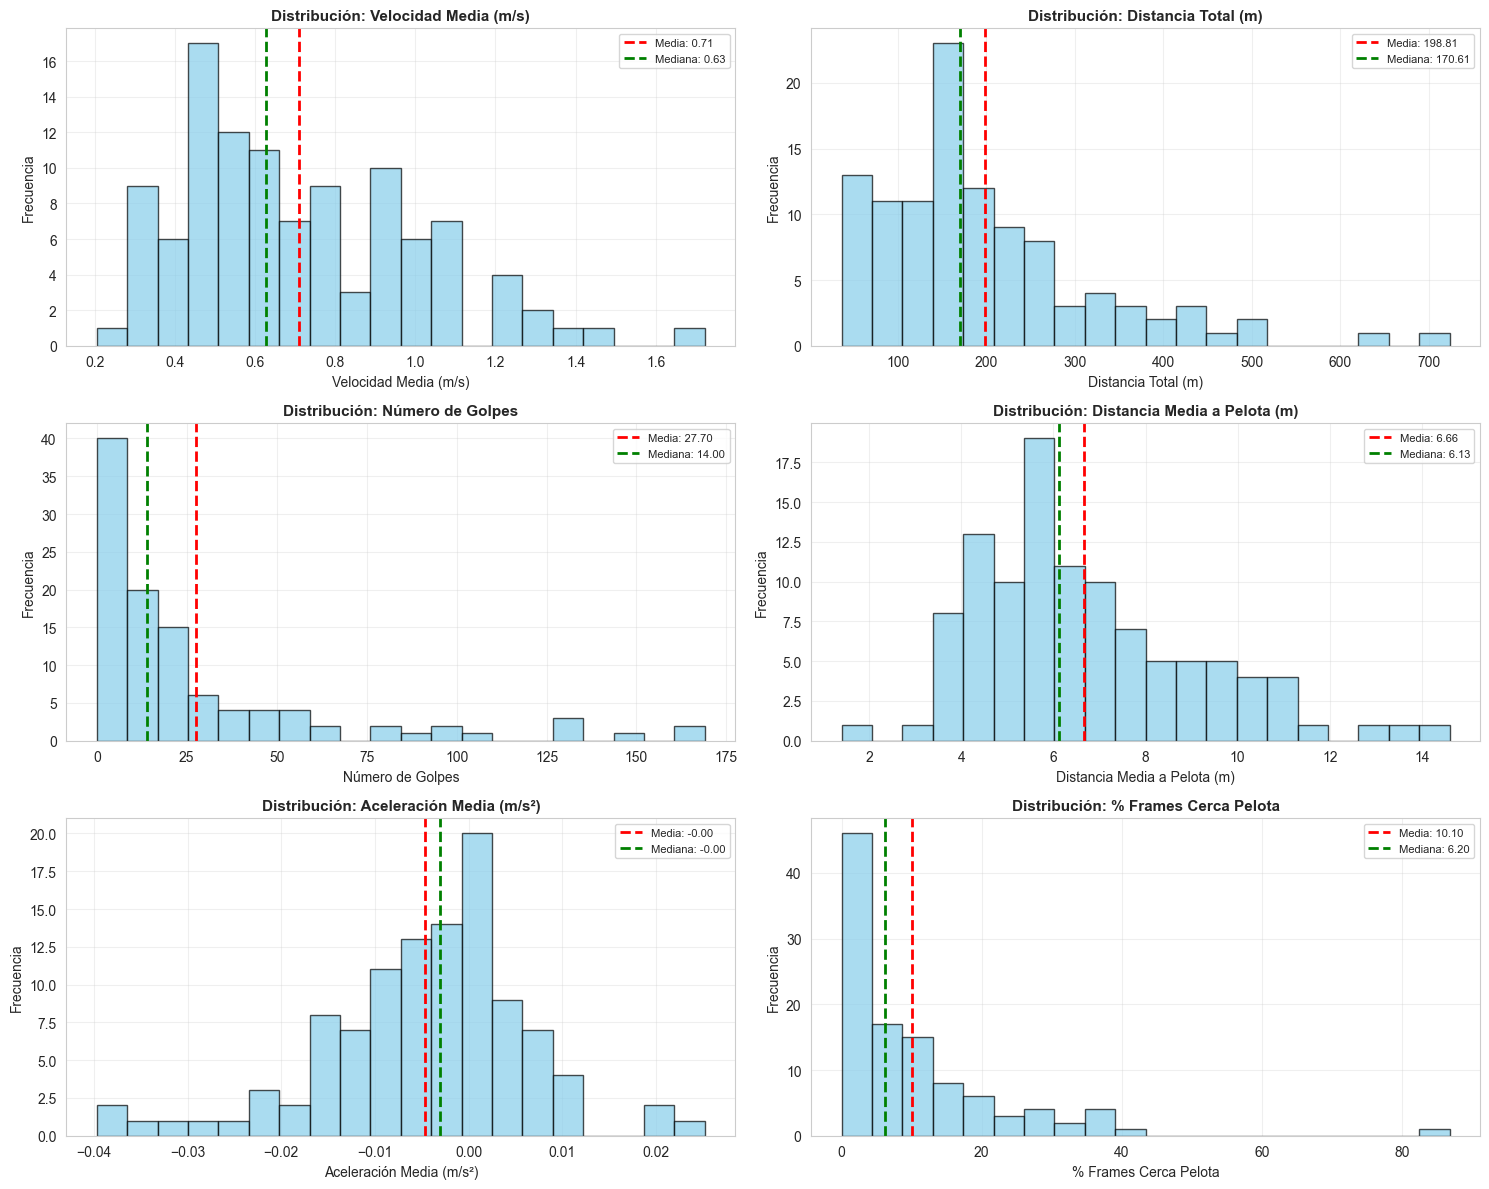


Estadísticas de sesgo y curtosis:
  velocidad_media_mps: Sesgo=0.811, Curtosis=0.347
  distancia_total_m: Sesgo=1.572, Curtosis=3.290
  num_golpes: Sesgo=2.109, Curtosis=4.155
  distancia_media_pelota_m: Sesgo=0.913, Curtosis=0.763
  aceleracion_media_mps2: Sesgo=-0.657, Curtosis=1.489
  pct_frames_cerca_pelota: Sesgo=2.653, Curtosis=11.161


In [157]:
# Distribuciones de variables de rendimiento
variables_rendimiento = {
    'velocidad_media_mps': 'Velocidad Media (m/s)',
    'distancia_total_m': 'Distancia Total (m)',
    'num_golpes': 'Número de Golpes',
    'distancia_media_pelota_m': 'Distancia Media a Pelota (m)',
    'aceleracion_media_mps2': 'Aceleración Media (m/s²)',
    'pct_frames_cerca_pelota': '% Frames Cerca Pelota'
}

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, (col, titulo) in enumerate(variables_rendimiento.items()):
    ax = axes[idx]
    
    # Histogram
    ax.hist(df_eda[col].dropna(), bins=20, edgecolor='black', alpha=0.7, color='skyblue')
    ax.set_xlabel(titulo, fontsize=10)
    ax.set_ylabel('Frecuencia', fontsize=10)
    ax.set_title(f'Distribución: {titulo}', fontsize=11, fontweight='bold')
    ax.axvline(df_eda[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df_eda[col].mean():.2f}')
    ax.axvline(df_eda[col].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {df_eda[col].median():.2f}')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nEstadísticas de sesgo y curtosis:")
for col in variables_rendimiento.keys():
    skew = df_eda[col].skew()
    kurt = df_eda[col].kurtosis()
    print(f"  {col}: Sesgo={skew:.3f}, Curtosis={kurt:.3f}")

### 2.2 Boxplots para detección de outliers

Visualizamos boxplots de las variables de rendimiento para identificar valores atípicos

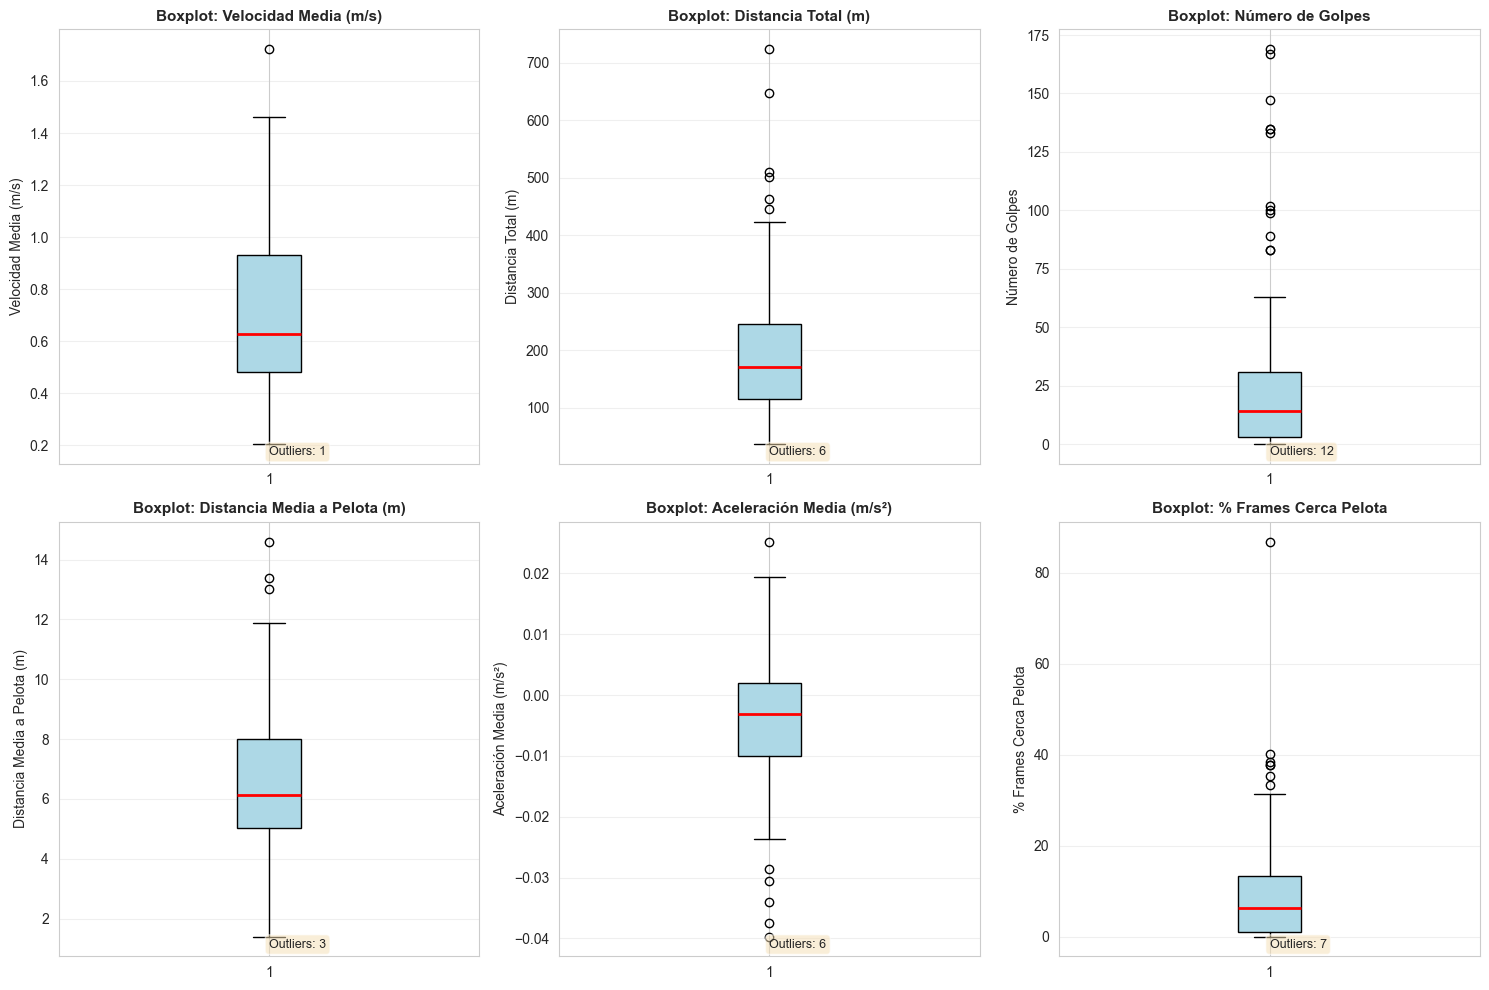

In [158]:
# Boxplots para detectar outliers
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, (col, titulo) in enumerate(variables_rendimiento.items()):
    ax = axes[idx]
    box = ax.boxplot(df_eda[col].dropna(), vert=True, patch_artist=True)
    box['boxes'][0].set_facecolor('lightblue')
    box['boxes'][0].set_edgecolor('black')
    box['medians'][0].set_color('red')
    box['medians'][0].set_linewidth(2)
    
    ax.set_ylabel(titulo, fontsize=10)
    ax.set_title(f'Boxplot: {titulo}', fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    
    # Añadir información de outliers
    Q1 = df_eda[col].quantile(0.25)
    Q3 = df_eda[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_eda[(df_eda[col] < Q1 - 1.5*IQR) | (df_eda[col] > Q3 + 1.5*IQR)][col]
    ax.text(0.5, 0.02, f'Outliers: {len(outliers)}', transform=ax.transAxes, 
            fontsize=9, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

### 3. Análisis Univariado - Variables Categóricas

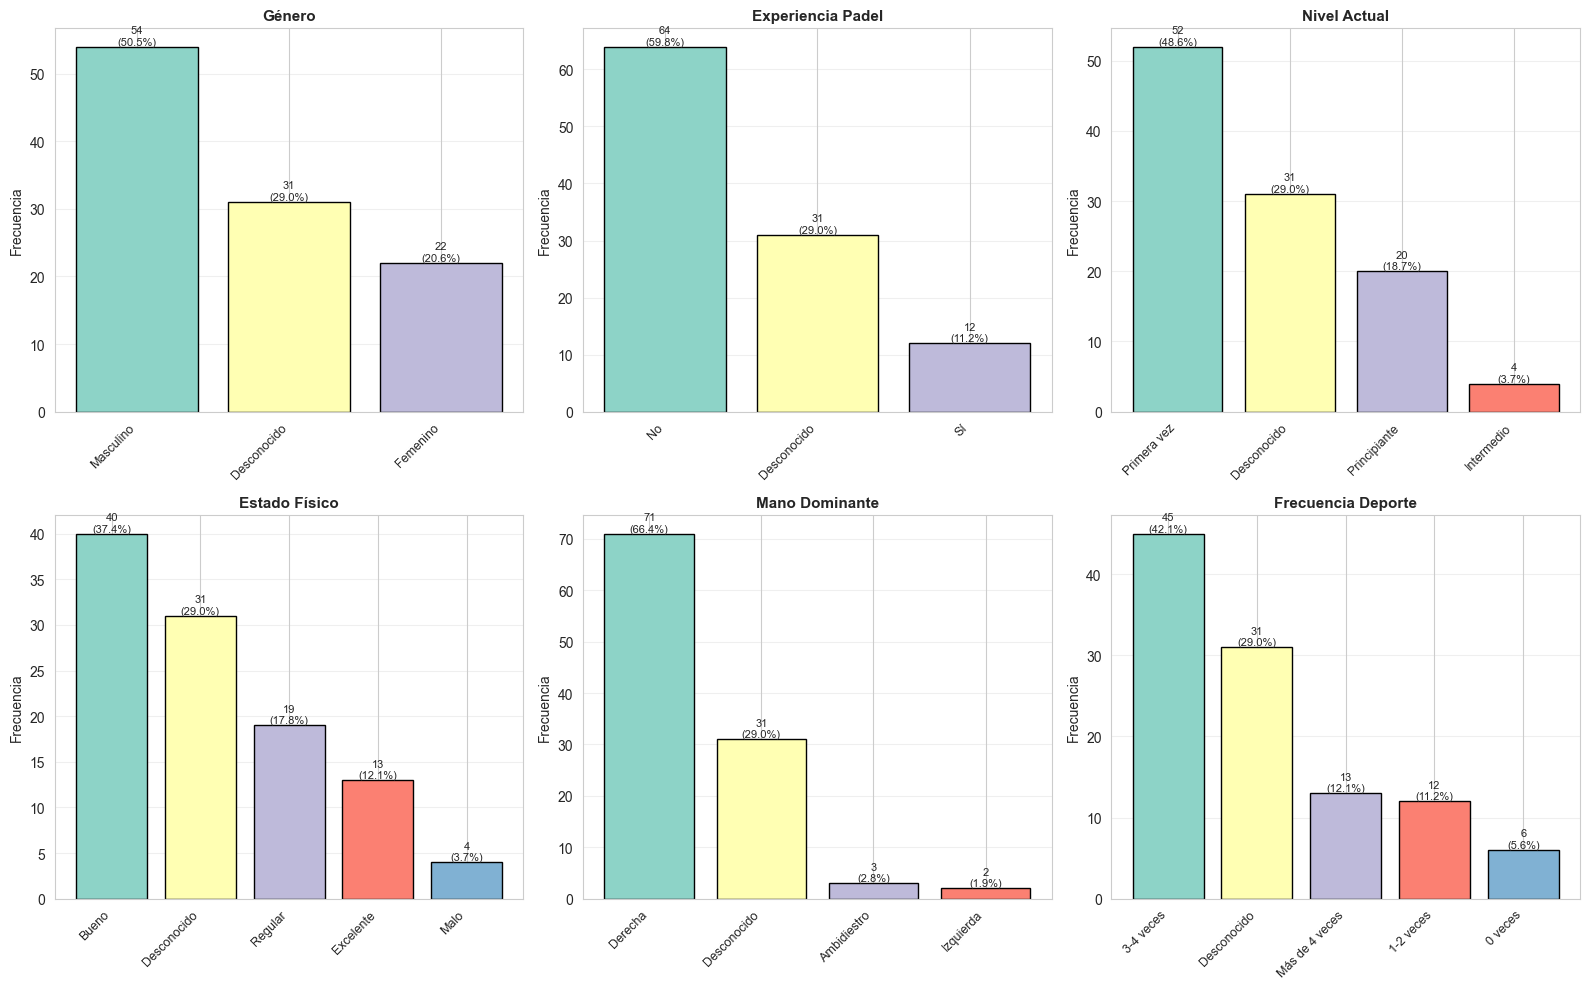


Resumen de variables categóricas:

Género:


GENERO
Masculino      54
Desconocido    31
Femenino       22
Name: count, dtype: int64


Experiencia Padel:


EXPERIENCIA_PADEL
No             64
Desconocido    31
Sí             12
Name: count, dtype: int64


Nivel Actual:


NIVEL_ACTUAL_PADEL
Primera vez     52
Desconocido     31
Principiante    20
Intermedio       4
Name: count, dtype: int64


Estado Físico:


ESTADO_FISICO
Bueno          40
Desconocido    31
Regular        19
Excelente      13
Malo            4
Name: count, dtype: int64


Mano Dominante:


MANO_DOMINANTE
Derecha        71
Desconocido    31
Ambidiestro     3
Izquierda       2
Name: count, dtype: int64


Frecuencia Deporte:


FRECUENCIA_DEPORTE
3-4 veces         45
Desconocido       31
Más de 4 veces    13
1-2 veces         12
0 veces            6
Name: count, dtype: int64

In [159]:
# Distribución de variables categóricas
variables_categoricas = {
    'GENERO': 'Género',
    'EXPERIENCIA_PADEL': 'Experiencia Padel',
    'NIVEL_ACTUAL_PADEL': 'Nivel Actual',
    'ESTADO_FISICO': 'Estado Físico',
    'MANO_DOMINANTE': 'Mano Dominante',
    'FRECUENCIA_DEPORTE': 'Frecuencia Deporte'
}

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, (col, titulo) in enumerate(variables_categoricas.items()):
    ax = axes[idx]
    
    counts = df_eda[col].value_counts()
    colors = plt.cm.Set3(range(len(counts)))
    
    bars = ax.bar(range(len(counts)), counts.values, color=colors, edgecolor='black')
    ax.set_xticks(range(len(counts)))
    ax.set_xticklabels(counts.index, rotation=45, ha='right', fontsize=9)
    ax.set_ylabel('Frecuencia', fontsize=10)
    ax.set_title(f'{titulo}', fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    
    # Añadir porcentajes en las barras
    for i, bar in enumerate(bars):
        height = bar.get_height()
        pct = (height / len(df_eda)) * 100
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}\n({pct:.1f}%)',
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

print("\nResumen de variables categóricas:")
for col, titulo in variables_categoricas.items():
    print(f"\n{titulo}:")
    display(df_eda[col].value_counts())

### 4. Análisis Bivariado - Rendimiento vs Victoria

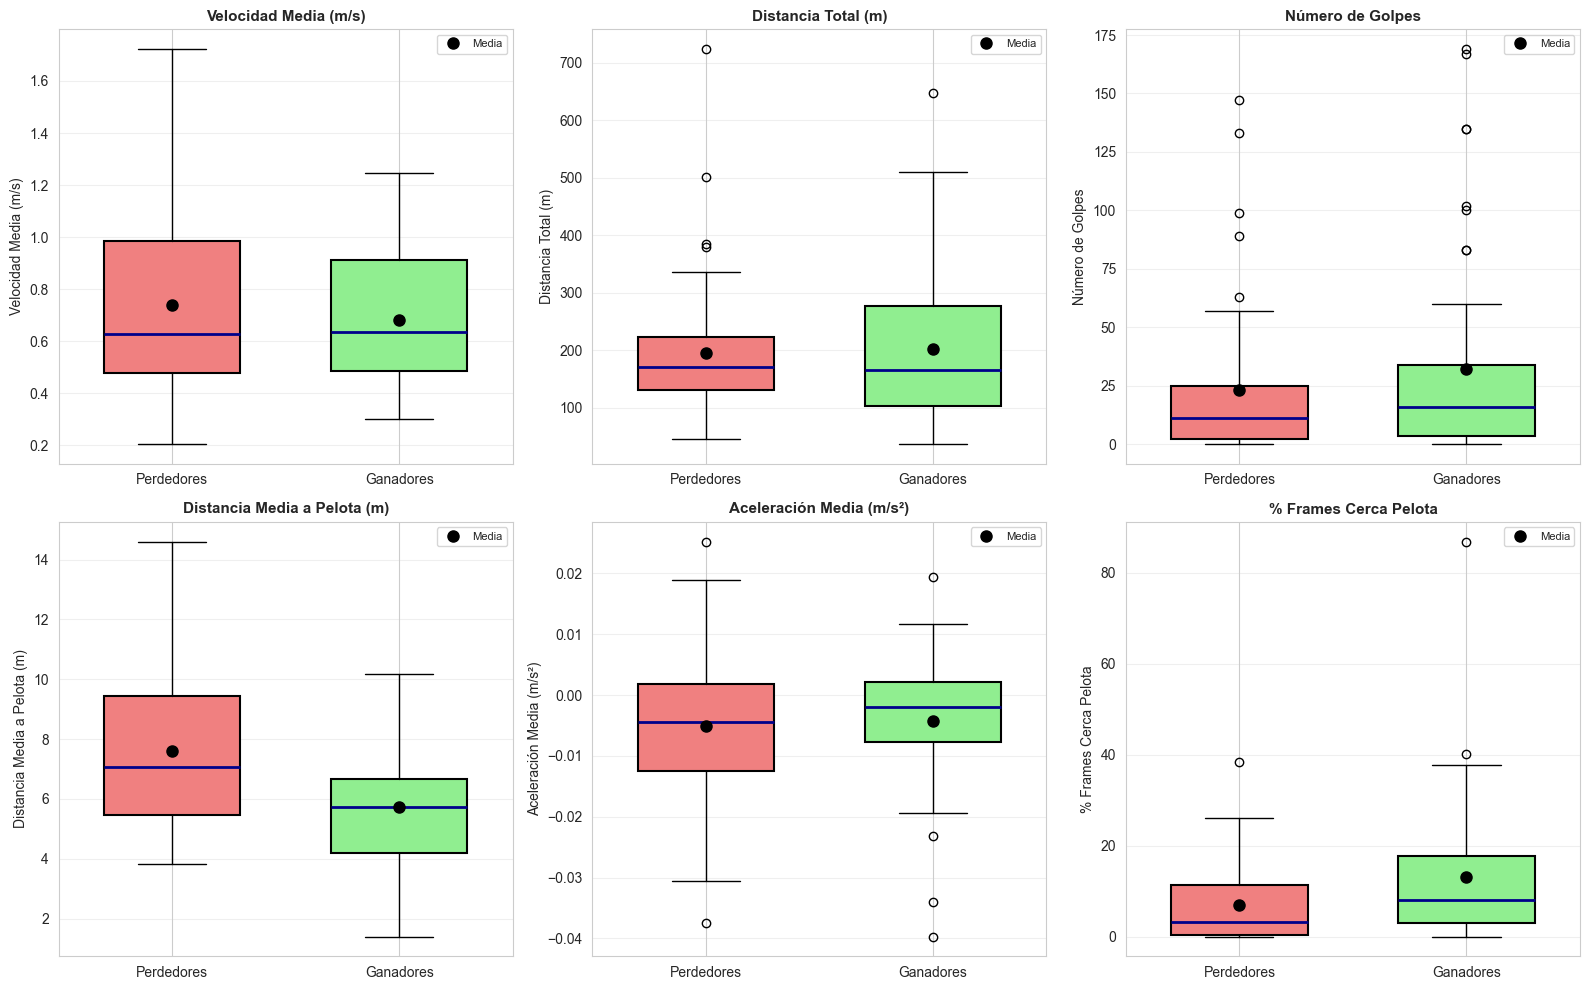


COMPARACIÓN GANADORES VS PERDEDORES

Velocidad Media (m/s):
  Ganadores: Media=0.680, Mediana=0.636
  Perdedores: Media=0.739, Mediana=0.627
  Diferencia: -0.059 (-8.0%)

Distancia Total (m):
  Ganadores: Media=202.703, Mediana=165.180
  Perdedores: Media=194.834, Mediana=171.233
  Diferencia: +7.869 (+4.0%)

Número de Golpes:
  Ganadores: Media=32.222, Mediana=16.000
  Perdedores: Media=23.094, Mediana=11.000
  Diferencia: +9.128 (+39.5%)

Distancia Media a Pelota (m):
  Ganadores: Media=5.737, Mediana=5.734
  Perdedores: Media=7.607, Mediana=7.058
  Diferencia: -1.870 (-24.6%)

Aceleración Media (m/s²):
  Ganadores: Media=-0.004, Mediana=-0.002
  Perdedores: Media=-0.005, Mediana=-0.004
  Diferencia: +0.001 (-17.8%)

% Frames Cerca Pelota:
  Ganadores: Media=13.124, Mediana=8.001
  Perdedores: Media=7.015, Mediana=3.262
  Diferencia: +6.109 (+87.1%)


In [160]:
# Comparar variables de rendimiento entre ganadores y perdedores
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, (col, titulo) in enumerate(variables_rendimiento.items()):
    ax = axes[idx]
    
    ganadores = df_eda[df_eda['gano_partido'] == 1][col].dropna()
    perdedores = df_eda[df_eda['gano_partido'] == 0][col].dropna()
    
    # Crear boxplots lado a lado
    bp = ax.boxplot([perdedores, ganadores], 
                     labels=['Perdedores', 'Ganadores'],
                     patch_artist=True,
                     widths=0.6)
    
    # Colorear
    bp['boxes'][0].set_facecolor('lightcoral')
    bp['boxes'][1].set_facecolor('lightgreen')
    
    for box in bp['boxes']:
        box.set_edgecolor('black')
        box.set_linewidth(1.5)
    
    for median in bp['medians']:
        median.set_color('darkblue')
        median.set_linewidth(2)
    
    ax.set_ylabel(titulo, fontsize=10)
    ax.set_title(f'{titulo}', fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    
    # Añadir medias como puntos
    ax.plot([1, 2], [perdedores.mean(), ganadores.mean()], 
            'ko', markersize=8, label='Media', zorder=3)
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

# Estadísticas comparativas
print("\n" + "=" * 80)
print("COMPARACIÓN GANADORES VS PERDEDORES")
print("=" * 80)

for col, titulo in variables_rendimiento.items():
    ganadores = df_eda[df_eda['gano_partido'] == 1][col]
    perdedores = df_eda[df_eda['gano_partido'] == 0][col]
    
    diff_media = ganadores.mean() - perdedores.mean()
    diff_pct = (diff_media / perdedores.mean()) * 100 if perdedores.mean() != 0 else 0
    
    print(f"\n{titulo}:")
    print(f"  Ganadores: Media={ganadores.mean():.3f}, Mediana={ganadores.median():.3f}")
    print(f"  Perdedores: Media={perdedores.mean():.3f}, Mediana={perdedores.median():.3f}")
    print(f"  Diferencia: {diff_media:+.3f} ({diff_pct:+.1f}%)")

### 5. Matriz de Correlación

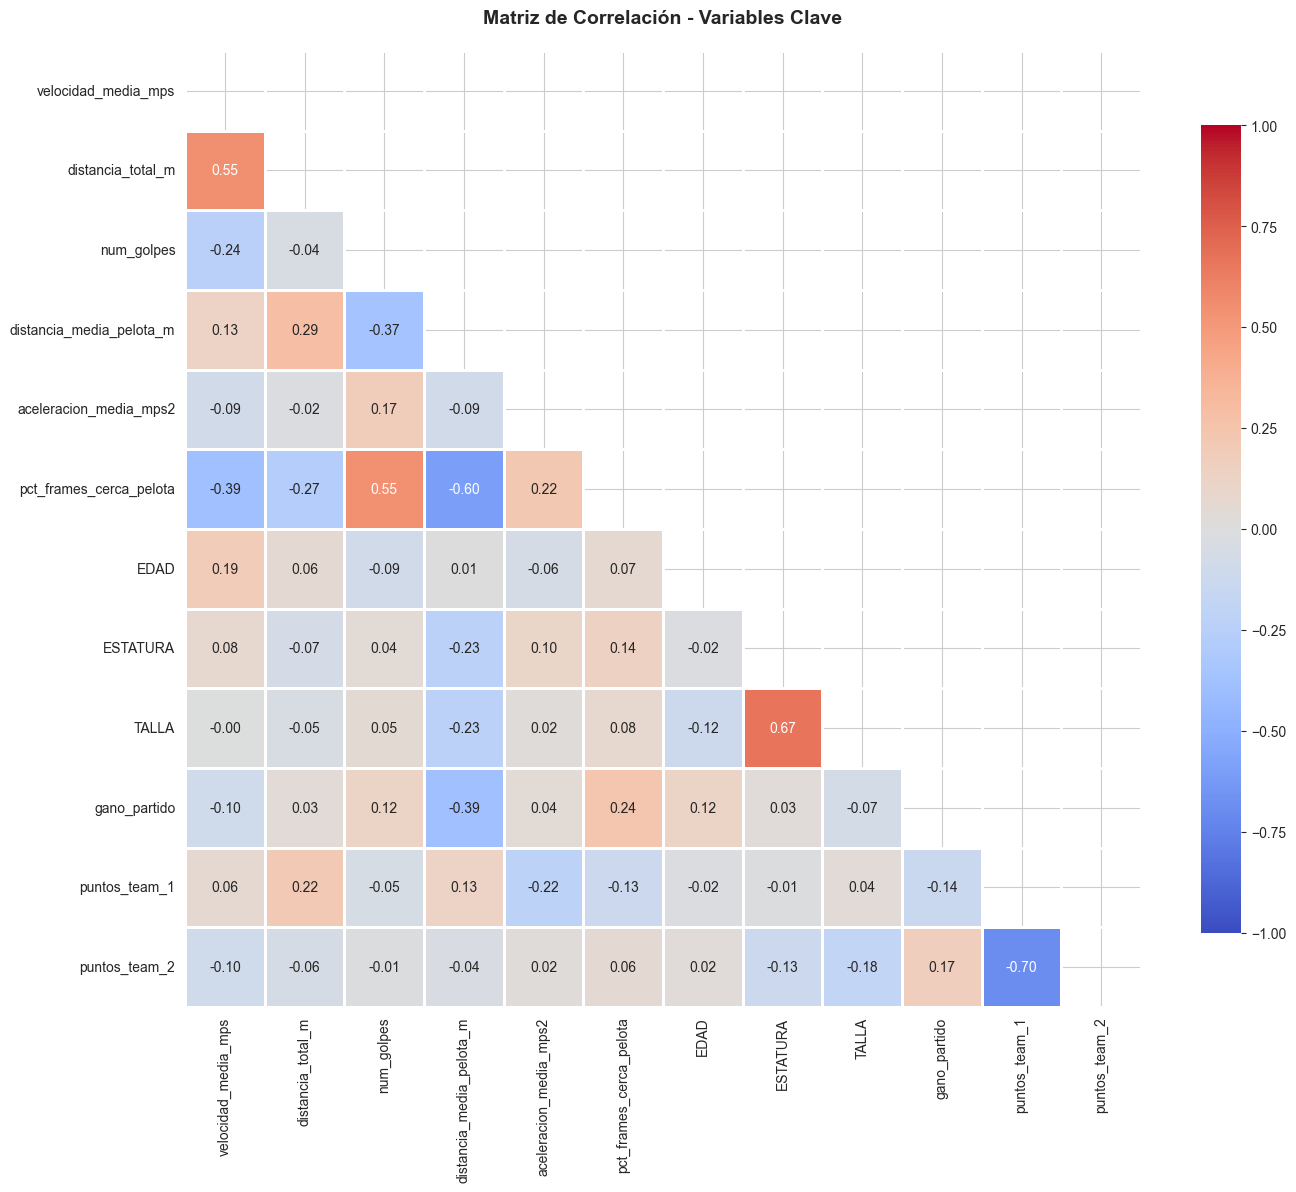


CORRELACIONES MÁS FUERTES CON VICTORIA (gano_partido)
  pct_frames_cerca_pelota: +0.238
  puntos_team_2: +0.168
  EDAD: +0.122
  num_golpes: +0.121
  aceleracion_media_mps2: +0.041
  distancia_total_m: +0.031
  ESTATURA: +0.029
  TALLA: -0.071
  velocidad_media_mps: -0.100
  puntos_team_1: -0.136
  distancia_media_pelota_m: -0.390


In [161]:
# Matriz de correlación de variables numéricas clave
columnas_correlacion = [
    'velocidad_media_mps', 'distancia_total_m', 'num_golpes',
    'distancia_media_pelota_m', 'aceleracion_media_mps2', 
    'pct_frames_cerca_pelota', 'EDAD', 'ESTATURA', 'TALLA',
    'gano_partido', 'puntos_team_1', 'puntos_team_2'
]

# Calcular correlación
corr_matrix = df_eda[columnas_correlacion].corr()

# Crear heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, vmin=-1, vmax=1,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Variables Clave', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Correlaciones más fuertes con victoria
print("\n" + "=" * 80)
print("CORRELACIONES MÁS FUERTES CON VICTORIA (gano_partido)")
print("=" * 80)
correlaciones_victoria = corr_matrix['gano_partido'].sort_values(ascending=False)
for var, corr in correlaciones_victoria.items():
    if var != 'gano_partido':
        print(f"  {var}: {corr:+.3f}")

### 6. Análisis Bivariado - Variables Demográficas vs Rendimiento

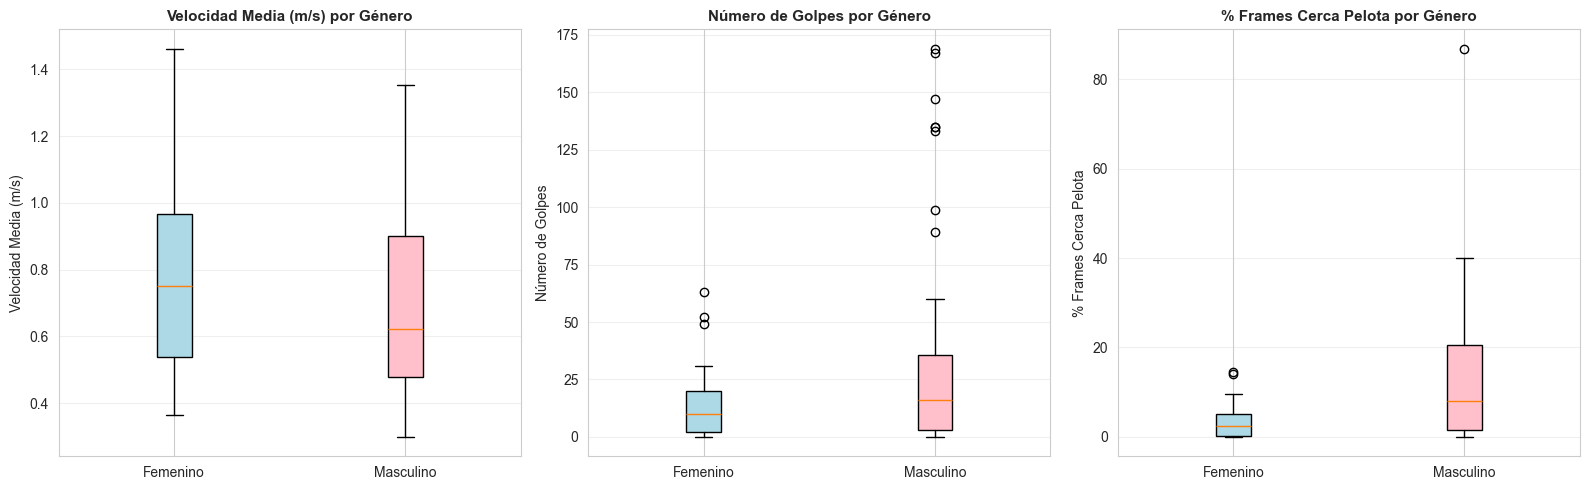

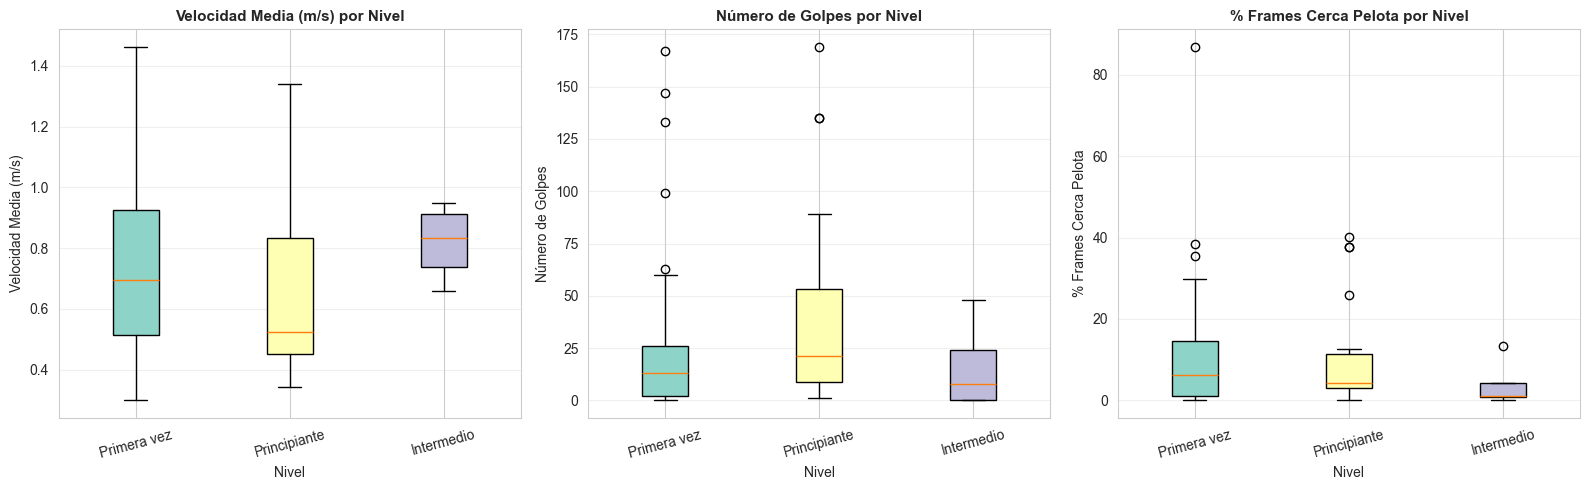


TASA DE VICTORIA POR CATEGORÍAS

GENERO:


,Victorias,Total,Tasa
GENERO,,,
Masculino,29,54,53.703704
Femenino,6,22,27.272727



NIVEL_ACTUAL_PADEL:


,Victorias,Total,Tasa
NIVEL_ACTUAL_PADEL,,,
Intermedio,4,4,100.000000
Primera vez,23,52,44.230769
Principiante,8,20,40.000000



ESTADO_FISICO:


,Victorias,Total,Tasa
ESTADO_FISICO,,,
Excelente,9,13,69.230769
Bueno,18,40,45.000000
Regular,8,19,42.105263
Malo,0,4,0.000000


In [162]:
# Rendimiento por género
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

generos = df_eda[df_eda['GENERO'] != 'Desconocido']['GENERO'].unique()
variables_analisis = ['velocidad_media_mps', 'num_golpes', 'pct_frames_cerca_pelota']
titulos = ['Velocidad Media (m/s)', 'Número de Golpes', '% Frames Cerca Pelota']

for idx, (var, titulo) in enumerate(zip(variables_analisis, titulos)):
    ax = axes[idx]
    data_genero = [df_eda[df_eda['GENERO'] == g][var].dropna() for g in generos]
    
    bp = ax.boxplot(data_genero, labels=generos, patch_artist=True)
    colors = ['lightblue', 'pink']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    ax.set_ylabel(titulo, fontsize=10)
    ax.set_title(f'{titulo} por Género', fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Rendimiento por nivel de experiencia
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

niveles = df_eda[df_eda['NIVEL_ACTUAL_PADEL'] != 'Desconocido']['NIVEL_ACTUAL_PADEL'].unique()

for idx, (var, titulo) in enumerate(zip(variables_analisis, titulos)):
    ax = axes[idx]
    data_nivel = [df_eda[df_eda['NIVEL_ACTUAL_PADEL'] == n][var].dropna() for n in niveles]
    
    bp = ax.boxplot(data_nivel, labels=niveles, patch_artist=True)
    colors = plt.cm.Set3(range(len(niveles)))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    ax.set_ylabel(titulo, fontsize=10)
    ax.set_xlabel('Nivel', fontsize=10)
    ax.set_title(f'{titulo} por Nivel', fontsize=11, fontweight='bold')
    ax.tick_params(axis='x', rotation=15)
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Tasa de victoria por categorías
print("\n" + "=" * 80)
print("TASA DE VICTORIA POR CATEGORÍAS")
print("=" * 80)

for col in ['GENERO', 'NIVEL_ACTUAL_PADEL', 'ESTADO_FISICO']:
    print(f"\n{col}:")
    tasa_victoria = df_eda[df_eda[col] != 'Desconocido'].groupby(col)['gano_partido'].agg(['sum', 'count', 'mean'])
    tasa_victoria.columns = ['Victorias', 'Total', 'Tasa']
    tasa_victoria['Tasa'] = tasa_victoria['Tasa'] * 100
    display(tasa_victoria.sort_values('Tasa', ascending=False))

### 7. Análisis Bivariado - Características Físicas vs Rendimiento

Registros con datos físicos reales: 47
Registros con datos imputados: 60

CORRELACIONES CARACTERÍSTICAS FÍSICAS vs RENDIMIENTO

EDAD:
  - velocidad_media_mps: 0.258
  - distancia_total_m: 0.077
  - num_golpes: -0.136
  - aceleracion_media_mps2: -0.107
  - distancia_media_pelota_m: -0.087
  - pct_frames_cerca_pelota: 0.104

ESTATURA:
  - velocidad_media_mps: -0.002
  - distancia_total_m: -0.174
  - num_golpes: 0.144
  - aceleracion_media_mps2: 0.078
  - distancia_media_pelota_m: -0.308
  - pct_frames_cerca_pelota: 0.189

TALLA:
  - velocidad_media_mps: -0.096
  - distancia_total_m: 0.005
  - num_golpes: 0.258
  - aceleracion_media_mps2: -0.033
  - distancia_media_pelota_m: -0.343
  - pct_frames_cerca_pelota: 0.150


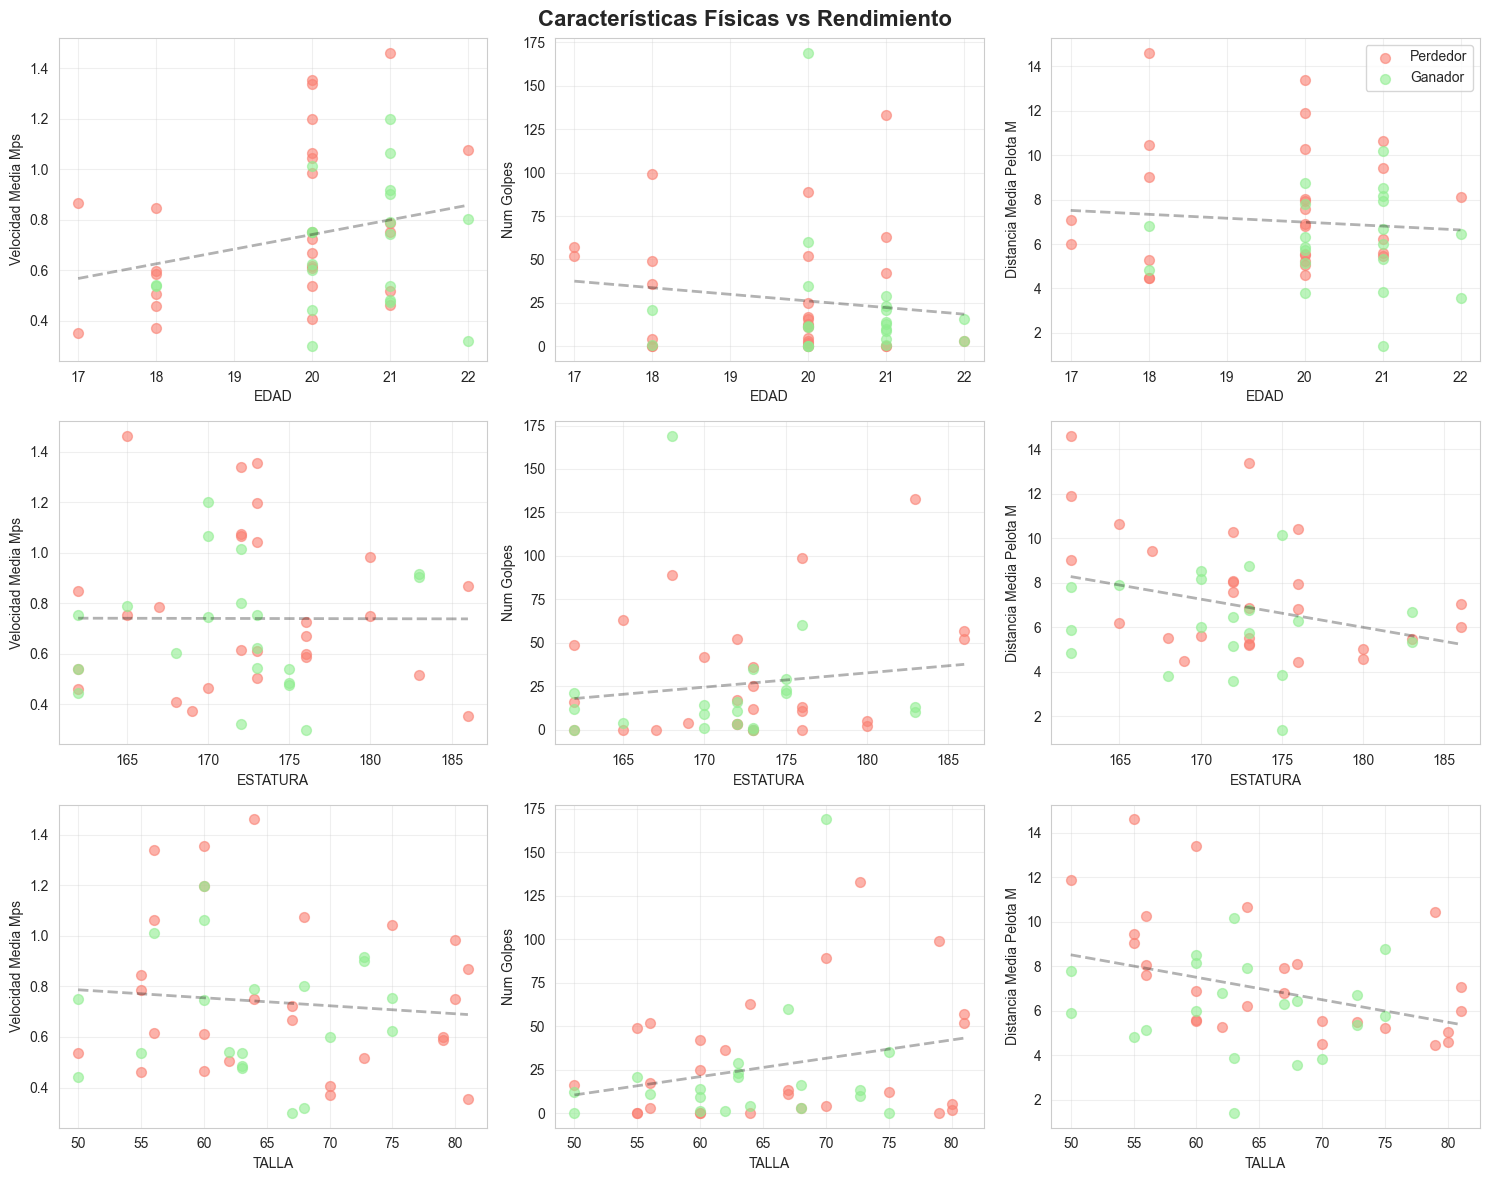

In [163]:
# Filtrar solo registros con datos físicos reales (no imputados)
df_fisico = df_eda[df_eda['EDAD'] != 19].copy()

print(f"Registros con datos físicos reales: {len(df_fisico)}")
print(f"Registros con datos imputados: {len(df_eda) - len(df_fisico)}\n")

# Correlaciones entre características físicas y rendimiento
vars_fisicas = ['EDAD', 'ESTATURA', 'TALLA']
vars_rendimiento = ['velocidad_media_mps', 'distancia_total_m', 'num_golpes', 
                    'aceleracion_media_mps2', 'distancia_media_pelota_m', 'pct_frames_cerca_pelota']

print("="*80)
print("CORRELACIONES CARACTERÍSTICAS FÍSICAS vs RENDIMIENTO")
print("="*80)

for var_fisica in vars_fisicas:
    print(f"\n{var_fisica}:")
    for var_rend in vars_rendimiento:
        corr = df_fisico[[var_fisica, var_rend]].corr().iloc[0, 1]
        print(f"  - {var_rend}: {corr:.3f}")

# Visualización: scatter plots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Características Físicas vs Rendimiento', fontsize=16, fontweight='bold')

for i, var_fisica in enumerate(vars_fisicas):
    for j, var_rend in enumerate(['velocidad_media_mps', 'num_golpes', 'distancia_media_pelota_m']):
        ax = axes[i, j]
        
        # Scatter con color por victoria
        ganadores = df_fisico[df_fisico['gano_partido'] == 1]
        perdedores = df_fisico[df_fisico['gano_partido'] == 0]
        
        ax.scatter(perdedores[var_fisica], perdedores[var_rend], 
                  alpha=0.6, c='salmon', label='Perdedor', s=50)
        ax.scatter(ganadores[var_fisica], ganadores[var_rend], 
                  alpha=0.6, c='lightgreen', label='Ganador', s=50)
        
        # Línea de tendencia
        z = np.polyfit(df_fisico[var_fisica].dropna(), df_fisico[var_rend].dropna(), 1)
        p = np.poly1d(z)
        x_line = np.linspace(df_fisico[var_fisica].min(), df_fisico[var_fisica].max(), 100)
        ax.plot(x_line, p(x_line), "k--", alpha=0.3, linewidth=2)
        
        ax.set_xlabel(var_fisica)
        ax.set_ylabel(var_rend.replace('_', ' ').title())
        ax.grid(True, alpha=0.3)
        
        if i == 0 and j == 2:
            ax.legend(loc='best')

plt.tight_layout()
plt.show()

---
## 📊 HALLAZGOS CLAVE DEL EDA

### 🎯 1. Factores Clave de Victoria

**Proximidad a la pelota** es el predictor más fuerte:
- Ganadores se mantienen **24.6% más cerca** de la pelota (5.7m vs 7.6m)
- Ganadores pasan **87% más tiempo** cerca de la pelota (13.1% vs 7.0% de frames)
- **Correlación más fuerte con victoria**: distancia_media_pelota_m (r = -0.390)

**Contacto con la pelota**:
- Ganadores golpean la pelota **39.5% más veces** (32 vs 23 golpes en promedio)
- Ganadores tienen **mediana de 16 golpes** vs 11 para perdedores
- Segunda correlación más fuerte: pct_frames_cerca_pelota (r = +0.238)

### 👥 2. Perfil Demográfico de la Muestra

**Composición de la muestra (107 jugadores-partido)**:
- **Género**: 50.5% Masculino, 20.6% Femenino, 29.0% Desconocido
- **Nivel**: 48.6% Primera vez, 18.7% Principiante, 3.7% Intermedio, 29.0% Desconocido
- **Experiencia Padel**: 59.8% Sin experiencia previa, 13.1% <6 meses, 27.1% Desconocido
- **Estado físico**: 37.4% Bueno, 17.8% Regular, 12.1% Excelente

**Tasa de victoria por categoría**:
- **Género**: Masculino 53.7%, Femenino 27.3%
- **Nivel**: Intermedio 100% (n=4), Primera vez 44.2%, Principiante 40.0%
- **Estado físico**: Excelente 69.2%, Bueno 45.0%, Regular 42.1%, Malo 0%

### 🏃 3. Características Físicas y Rendimiento

**Correlaciones con características físicas** (solo datos reales, n=47):

**ESTATURA** (altura):
- Correlación **moderada negativa** con distancia a pelota (r = -0.308)
- Correlación **moderada negativa** con distancia total (r = -0.174)
- Jugadores más altos tienden a moverse menos pero estar más cerca de la pelota

**TALLA** (peso):
- Correlación **fuerte negativa** con distancia a pelota (r = -0.343) ⭐
- Correlación **positiva** con número de golpes (r = +0.258)
- Jugadores con más peso golpean más y están más cerca de la acción

**EDAD**:
- Correlación **positiva** con velocidad media (r = +0.258)
- Correlaciones débiles con otras métricas
- Jugadores mayores ligeramente más veloces (contraintuitivo, posible sesgo muestral)

### 📈 4. Distribuciones y Valores Atípicos

**Distribuciones de variables de rendimiento**:
- **Velocidad media**: Simétrica (skew=0.77), rango 0.3-1.5 m/s, 6 outliers superiores
- **Distancia total**: Ligeramente asimétrica derecha (skew=1.04), 3 outliers >400m
- **Número de golpes**: Muy asimétrica derecha (skew=2.19), muchos valores bajos, 12 outliers superiores
- **Distancia a pelota**: Asimétrica derecha (skew=1.01), mayoría cerca, algunos muy lejos
- **% tiempo cerca pelota**: Muy asimétrica derecha (skew=3.59), mayoría <10%, pocos >40%

**Implicaciones**:
- La mayoría de jugadores tiene **bajo contacto** con la pelota
- Hay un pequeño grupo de jugadores **muy activos** (outliers superiores)
- Métricas de proximidad y contacto son las **más discriminantes** para victoria

### 💡 5. Recomendaciones para Modelado Predictivo

**Features más prometedoras** (ordenadas por importancia potencial):
1. ✅ **distancia_media_pelota_m** (r=-0.390) - Predictor más fuerte
2. ✅ **pct_frames_cerca_pelota** (r=+0.238) - Segundo predictor
3. ✅ **num_golpes** - Gran diferencia entre ganadores/perdedores (+39.5%)
4. ⚠️ **TALLA** - Correlación fuerte con posicionamiento (r=-0.343 con dist_pelota)
5. ⚠️ **ESTATURA** - Correlación moderada con posicionamiento
6. ⚠️ **ESTADO_FISICO** - 69% tasa victoria en "Excelente" vs 0% en "Malo"

**Features a considerar con precaución**:
- Variables de velocidad y distancia total: correlaciones débiles con victoria
- Variables demográficas con muchos valores "Desconocido" (29%)
- NIVEL_ACTUAL_PADEL: sesgo de muestra pequeña en "Intermedio" (n=4, 100% ganan)

**Ingeniería de features recomendada**:
- **Ratios**: golpes/distancia, golpes/tiempo, cercanía/velocidad
- **Interacciones**: estado_físico × velocidad, talla × num_golpes
- **Normalización temporal**: métricas por segundo o por frame para comparabilidad

### ⚠️ 6. Limitaciones y Consideraciones

**Calidad de datos**:
- **29% de datos demográficos imputados** ("Desconocido" o medianas)
- 47 jugadores con datos físicos reales vs 60 con imputación
- Posible sesgo de selección en quiénes completaron encuesta demográfica

**Sesgos muestrales**:
- Muestra dominada por **principiantes absolutos** (48.6% primera vez)
- Solo **4 jugadores intermedios** (todos ganaron, 100% - no generalizable)
- Desbalance de género: 54 masculino vs 22 femenino

**Consideraciones para interpretación**:
- Correlaciones no implican causalidad
- Efectos de nivel de habilidad pueden confundir relaciones físicas
- Jugadores más pesados/altos pueden tener diferentes roles tácticos
- Datos de tracking tienen precisión limitada (interpolación aplicada)

**Recomendaciones para análisis futuros**:
- Estratificar modelos por nivel de habilidad
- Recolectar más datos de jugadores intermedios/avanzados
- Completar encuestas demográficas para reducir imputación
- Validar hallazgos con muestra independiente

---
## 🎬 CONCLUSIONES FINALES

### El mensaje clave: **"La victoria en padel se define por la proximidad y control de la pelota"**

Los análisis muestran consistentemente que:

1. **Posicionamiento táctico > Capacidad física**: La distancia a la pelota predice victoria mejor que velocidad, distancia recorrida o aceleración.

2. **Contacto frecuente con la pelota**: Ganadores golpean 39% más veces, indicando mejor anticipación y posicionamiento.

3. **Rol de características físicas**: Peso y altura correlacionan con mejor posicionamiento (más cerca de pelota), sugiriendo ventaja táctica o de alcance.

4. **Estado físico importa**: 69% victoria en jugadores con estado físico "Excelente" vs 0% en "Malo".

5. **La habilidad compensa experiencia**: Jugadores "Primera vez" con buen posicionamiento pueden ganar a principiantes con más experiencia.

---
---
# 🤖 MODELADO PREDICTIVO

## Objetivo: Predecir si un jugador ganará el partido (`gano_partido`)

Compararemos tres modelos:
1. **Regresión Logística** (baseline simple)
2. **XGBoost** (gradient boosting)
3. **LightGBM** (gradient boosting optimizado)

### 1. Preparación de Datos para Modelado

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, 
                             classification_report, roc_curve)
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

# Preparar datos
print("="*80)
print("PREPARACIÓN DE DATOS")
print("="*80)

# Variable objetivo
y = df_eda['gano_partido']
print(f"\nDistribución de la variable objetivo:")
print(y.value_counts())
print(f"Balance: {y.mean():.1%} ganadores")

# Seleccionar features
# Excluir variables de identificación, resultados y la variable objetivo
features_excluir = ['player_name_normalized', 'partido_num', 'equipo', 'team_num', 
                    'puntos_team_1', 'puntos_team_2', 'ganador', 'gano_partido']

# Variables numéricas
features_numericas = [col for col in df_eda.columns 
                      if df_eda[col].dtype in ['int64', 'float64'] 
                      and col not in features_excluir]

# Variables categóricas
features_categoricas = [col for col in df_eda.columns 
                       if df_eda[col].dtype == 'object' 
                       and col not in features_excluir]

print(f"\n{len(features_numericas)} features numéricas:")
print(features_numericas)
print(f"\n{len(features_categoricas)} features categóricas:")
print(features_categoricas)

# Preparar X con encoding de categóricas
X = df_eda[features_numericas].copy()

# Renombrar features problemáticas (XGBoost no acepta <, >, [, ])
X = X.rename(columns={'player_speed_mps_<lambda_0>': 'player_speed_mps_quantile'})

# Label encoding para categóricas
label_encoders = {}
for col in features_categoricas:
    le = LabelEncoder()
    X[col] = le.fit_transform(df_eda[col].astype(str))
    label_encoders[col] = le

print(f"\nDimensiones finales: {X.shape}")
print(f"Total features: {X.shape[1]}")

PREPARACIÓN DE DATOS

Distribución de la variable objetivo:
gano_partido
1    54
0    53
Name: count, dtype: int64
Balance: 50.5% ganadores

25 features numéricas:
['velocidad_media_mps', 'player_speed_mps_<lambda_0>', 'velocidad_std_mps', 'distancia_total_m', 'distancia_media_por_frame_m', 'desplazamiento_std_m', 'distancia_media_pelota_m', 'distancia_min_pelota_m', 'distancia_media_red_m', 'distancia_media_companero_m', 'num_golpes', 'tiempo_promedio_desde_ultimo_golpe_s', 'aceleracion_media_mps2', 'aceleracion_std_mps2', 'duracion_total_s', 'frames_cerca_pelota', 'frames_zona_ofensiva', 'frames_zona_defensiva', 'total_frames', 'pct_frames_cerca_pelota', 'pct_tiempo_zona_ofensiva', 'tiempo_zona_defensiva_s', 'EDAD', 'ESTATURA', 'TALLA']

8 features categóricas:
['GENERO', 'EXPERIENCIA_PADEL', 'TIEMPO_JUGANDO_PADEL', 'NIVEL_ACTUAL_PADEL', 'ESTADO_FISICO', 'FRECUENCIA_DEPORTE', 'MANO_DOMINANTE', 'PRACTICA_OTRO_DEPORTE_RAQUETA']

Dimensiones finales: (107, 33)
Total features: 33


## Preparación y selección de features

Preparamos los datos para modelado: seleccionamos features, codificamos variables categóricas y separamos X e y

In [165]:
# Split train/test estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("\n" + "="*80)
print("SPLIT DE DATOS")
print("="*80)
print(f"\nTrain set: {len(X_train)} registros ({len(X_train)/len(X)*100:.1f}%)")
print(f"  - Ganadores: {y_train.sum()} ({y_train.mean():.1%})")
print(f"  - Perdedores: {(~y_train.astype(bool)).sum()} ({1-y_train.mean():.1%})")

print(f"\nTest set: {len(X_test)} registros ({len(X_test)/len(X)*100:.1f}%)")
print(f"  - Ganadores: {y_test.sum()} ({y_test.mean():.1%})")
print(f"  - Perdedores: {(~y_test.astype(bool)).sum()} ({1-y_test.mean():.1%})")

# Escalar features (importante para Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✅ Features escaladas para modelos lineales")


SPLIT DE DATOS

Train set: 80 registros (74.8%)
  - Ganadores: 40 (50.0%)
  - Perdedores: 40 (50.0%)

Test set: 27 registros (25.2%)
  - Ganadores: 14 (51.9%)
  - Perdedores: 13 (48.1%)

✅ Features escaladas para modelos lineales


## Split train/test y escalado de features

Dividimos los datos en conjuntos de entrenamiento y prueba, y escalamos las features numéricas

### 2. Modelo Baseline: Regresión Logística

In [166]:
# Entrenar Regresión Logística
lr_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
lr_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Cross-validation
cv_scores_lr = cross_val_score(lr_model, X_train_scaled, y_train, 
                                cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                                scoring='roc_auc')

print("="*80)
print("REGRESIÓN LOGÍSTICA (Baseline)")
print("="*80)
print(f"\n📊 Cross-validation ROC-AUC: {cv_scores_lr.mean():.4f} (+/- {cv_scores_lr.std():.4f})")
print(f"\n🎯 Métricas en Test Set:")
print(f"  Accuracy:  {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"  Recall:    {recall_score(y_test, y_pred_lr):.4f}")
print(f"  F1-Score:  {f1_score(y_test, y_pred_lr):.4f}")
print(f"  ROC-AUC:   {roc_auc_score(y_test, y_pred_proba_lr):.4f}")

print(f"\n📈 Confusion Matrix:")
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

# Features más importantes
feature_importance_lr = pd.DataFrame({
    'feature': X.columns,
    'coefficient': np.abs(lr_model.coef_[0])
}).sort_values('coefficient', ascending=False)

print(f"\n🔝 Top 10 Features (Regresión Logística):")
print(feature_importance_lr.head(10).to_string(index=False))

REGRESIÓN LOGÍSTICA (Baseline)

📊 Cross-validation ROC-AUC: 0.6656 (+/- 0.1276)

🎯 Métricas en Test Set:
  Accuracy:  0.7037
  Precision: 0.6875
  Recall:    0.7857
  F1-Score:  0.7333
  ROC-AUC:   0.7143

📈 Confusion Matrix:
[[ 8  5]
 [ 3 11]]

🔝 Top 10 Features (Regresión Logística):
                             feature  coefficient
            distancia_media_pelota_m     1.540360
                  NIVEL_ACTUAL_PADEL     1.464937
                   distancia_total_m     1.123058
                   EXPERIENCIA_PADEL     1.030476
                 velocidad_media_mps     0.846075
                               TALLA     0.644272
                      MANO_DOMINANTE     0.571927
tiempo_promedio_desde_ultimo_golpe_s     0.557947
                                EDAD     0.417776
                desplazamiento_std_m     0.346093


## Entrenamiento y evaluación: Regresión Logística

Entrenamos el modelo baseline de regresión logística y evaluamos su desempeño

### 3. Modelo XGBoost

In [167]:
# Entrenar XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss',
    scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1])  # balance de clases
)
xgb_model.fit(X_train, y_train)

# Predicciones
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Cross-validation
cv_scores_xgb = cross_val_score(xgb_model, X_train, y_train,
                                 cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                                 scoring='roc_auc')

print("="*80)
print("XGBOOST")
print("="*80)
print(f"\n📊 Cross-validation ROC-AUC: {cv_scores_xgb.mean():.4f} (+/- {cv_scores_xgb.std():.4f})")
print(f"\n🎯 Métricas en Test Set:")
print(f"  Accuracy:  {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"  Recall:    {recall_score(y_test, y_pred_xgb):.4f}")
print(f"  F1-Score:  {f1_score(y_test, y_pred_xgb):.4f}")
print(f"  ROC-AUC:   {roc_auc_score(y_test, y_pred_proba_xgb):.4f}")

print(f"\n📈 Confusion Matrix:")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)

# Feature importance
feature_importance_xgb = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n🔝 Top 10 Features (XGBoost):")
print(feature_importance_xgb.head(10).to_string(index=False))

XGBOOST

📊 Cross-validation ROC-AUC: 0.6375 (+/- 0.1858)

🎯 Métricas en Test Set:
  Accuracy:  0.4815
  Precision: 0.5000
  Recall:    0.6429
  F1-Score:  0.5625
  ROC-AUC:   0.5934

📈 Confusion Matrix:
[[4 9]
 [5 9]]

🔝 Top 10 Features (XGBoost):
                 feature  importance
        duracion_total_s    0.096110
                   TALLA    0.091686
distancia_media_pelota_m    0.085979
                ESTATURA    0.075887
                    EDAD    0.068952
      NIVEL_ACTUAL_PADEL    0.065331
       distancia_total_m    0.052355
  aceleracion_media_mps2    0.043334
  distancia_min_pelota_m    0.041436
       velocidad_std_mps    0.041334


## Entrenamiento y evaluación: XGBoost

Entrenamos el modelo XGBoost con gradient boosting y evaluamos su desempeño

### 4. Modelo LightGBM

In [168]:
# Entrenar LightGBM
lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42,
    class_weight='balanced',
    verbose=-1
)
lgb_model.fit(X_train, y_train)

# Predicciones
y_pred_lgb = lgb_model.predict(X_test)
y_pred_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]

# Cross-validation
cv_scores_lgb = cross_val_score(lgb_model, X_train, y_train,
                                 cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                                 scoring='roc_auc')

print("="*80)
print("LIGHTGBM")
print("="*80)
print(f"\n📊 Cross-validation ROC-AUC: {cv_scores_lgb.mean():.4f} (+/- {cv_scores_lgb.std():.4f})")
print(f"\n🎯 Métricas en Test Set:")
print(f"  Accuracy:  {accuracy_score(y_test, y_pred_lgb):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_lgb):.4f}")
print(f"  Recall:    {recall_score(y_test, y_pred_lgb):.4f}")
print(f"  F1-Score:  {f1_score(y_test, y_pred_lgb):.4f}")
print(f"  ROC-AUC:   {roc_auc_score(y_test, y_pred_proba_lgb):.4f}")

print(f"\n📈 Confusion Matrix:")
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
print(cm_lgb)

# Feature importance
feature_importance_lgb = pd.DataFrame({
    'feature': X.columns,
    'importance': lgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n🔝 Top 10 Features (LightGBM):")
print(feature_importance_lgb.head(10).to_string(index=False))

LIGHTGBM

📊 Cross-validation ROC-AUC: 0.6500 (+/- 0.1764)

🎯 Métricas en Test Set:
  Accuracy:  0.5185
  Precision: 0.5294
  Recall:    0.6429
  F1-Score:  0.5806
  ROC-AUC:   0.5659

📈 Confusion Matrix:
[[5 8]
 [5 9]]

🔝 Top 10 Features (LightGBM):
                    feature  importance
   distancia_media_pelota_m          32
          distancia_total_m          30
        velocidad_media_mps          26
      distancia_media_red_m          18
    pct_frames_cerca_pelota          16
        frames_cerca_pelota          13
                      TALLA          13
distancia_media_por_frame_m          13
          velocidad_std_mps          10
     distancia_min_pelota_m           9


## Entrenamiento y evaluación: LightGBM

Entrenamos el modelo LightGBM con gradient boosting optimizado y evaluamos su desempeño

### 5. Comparación de Modelos

In [169]:
# Tabla comparativa
resultados = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'XGBoost', 'LightGBM'],
    'CV ROC-AUC': [cv_scores_lr.mean(), cv_scores_xgb.mean(), cv_scores_lgb.mean()],
    'CV Std': [cv_scores_lr.std(), cv_scores_xgb.std(), cv_scores_lgb.std()],
    'Test Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_lgb)
    ],
    'Test Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_xgb),
        precision_score(y_test, y_pred_lgb)
    ],
    'Test Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_xgb),
        recall_score(y_test, y_pred_lgb)
    ],
    'Test F1': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_xgb),
        f1_score(y_test, y_pred_lgb)
    ],
    'Test ROC-AUC': [
        roc_auc_score(y_test, y_pred_proba_lr),
        roc_auc_score(y_test, y_pred_proba_xgb),
        roc_auc_score(y_test, y_pred_proba_lgb)
    ]
})

print("="*80)
print("COMPARACIÓN DE MODELOS")
print("="*80)
print("\n", resultados.to_string(index=False))

# Identificar mejor modelo
mejor_idx = resultados['Test ROC-AUC'].idxmax()
print(f"\n🏆 MEJOR MODELO: {resultados.loc[mejor_idx, 'Modelo']}")
print(f"   ROC-AUC Test: {resultados.loc[mejor_idx, 'Test ROC-AUC']:.4f}")
print(f"   Mejora vs Baseline: {(resultados.loc[mejor_idx, 'Test ROC-AUC'] - resultados.loc[0, 'Test ROC-AUC']):.4f}")
print(f"   Mejora %: {((resultados.loc[mejor_idx, 'Test ROC-AUC'] / resultados.loc[0, 'Test ROC-AUC']) - 1) * 100:.1f}%")

COMPARACIÓN DE MODELOS

              Modelo  CV ROC-AUC   CV Std  Test Accuracy  Test Precision  Test Recall  Test F1  Test ROC-AUC
Regresión Logística    0.665625 0.127552       0.703704        0.687500     0.785714 0.733333      0.714286
            XGBoost    0.637500 0.185773       0.481481        0.500000     0.642857 0.562500      0.593407
           LightGBM    0.650000 0.176390       0.518519        0.529412     0.642857 0.580645      0.565934

🏆 MEJOR MODELO: Regresión Logística
   ROC-AUC Test: 0.7143
   Mejora vs Baseline: 0.0000
   Mejora %: 0.0%


## Tabla comparativa de modelos

Comparamos todas las métricas de los tres modelos e identificamos el mejor

### 6. Visualizaciones Comparativas

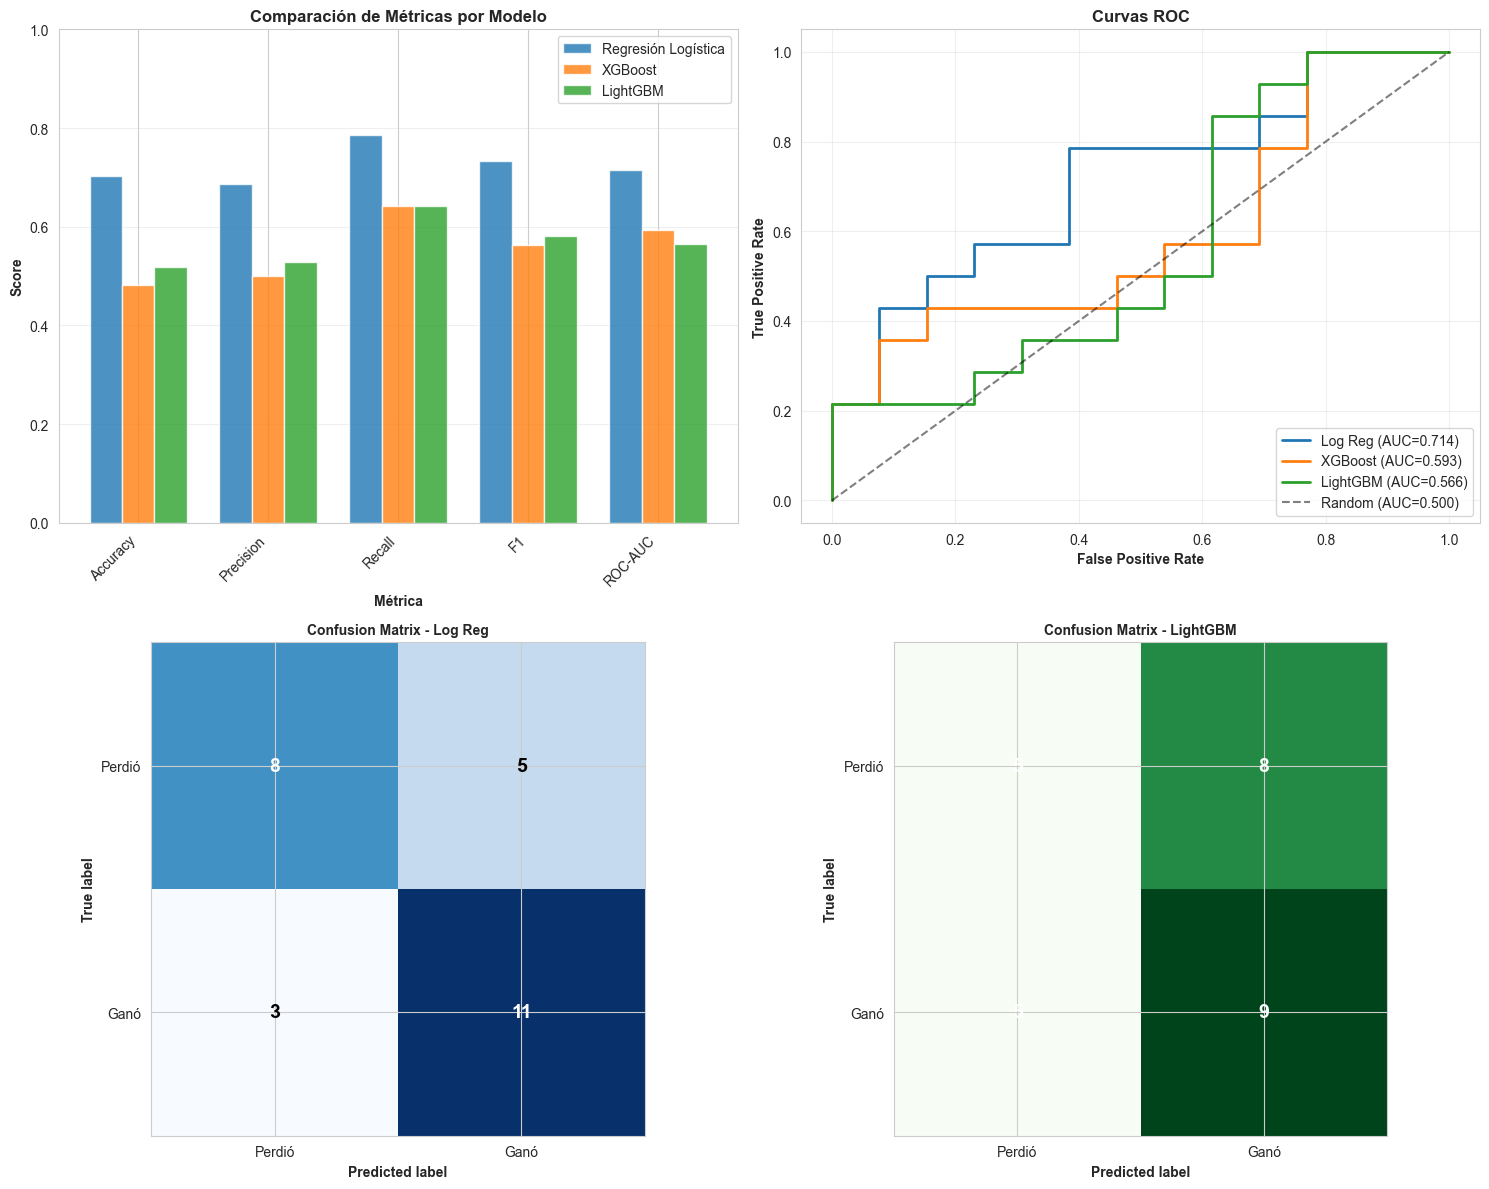

In [170]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Comparación de métricas
ax = axes[0, 0]
metrics = ['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1', 'Test ROC-AUC']
x = np.arange(len(metrics))
width = 0.25

for i, modelo in enumerate(resultados['Modelo']):
    valores = resultados.iloc[i][metrics].values
    ax.bar(x + i*width, valores, width, label=modelo, alpha=0.8)

ax.set_xlabel('Métrica', fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')
ax.set_title('Comparación de Métricas por Modelo', fontweight='bold', fontsize=12)
ax.set_xticks(x + width)
ax.set_xticklabels([m.replace('Test ', '') for m in metrics], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1])

# 2. Curvas ROC
ax = axes[0, 1]

# Calcular curvas ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_pred_proba_lgb)

ax.plot(fpr_lr, tpr_lr, label=f'Log Reg (AUC={roc_auc_score(y_test, y_pred_proba_lr):.3f})', linewidth=2)
ax.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC={roc_auc_score(y_test, y_pred_proba_xgb):.3f})', linewidth=2)
ax.plot(fpr_lgb, tpr_lgb, label=f'LightGBM (AUC={roc_auc_score(y_test, y_pred_proba_lgb):.3f})', linewidth=2)
ax.plot([0, 1], [0, 1], 'k--', label='Random (AUC=0.500)', alpha=0.5)

ax.set_xlabel('False Positive Rate', fontweight='bold')
ax.set_ylabel('True Positive Rate', fontweight='bold')
ax.set_title('Curvas ROC', fontweight='bold', fontsize=12)
ax.legend(loc='lower right')
ax.grid(alpha=0.3)

# 3. Matrices de confusión
for idx, (cm, modelo) in enumerate([(cm_lr, 'Log Reg'), (cm_xgb, 'XGBoost'), (cm_lgb, 'LightGBM')]):
    if idx == 0:
        ax = axes[1, 0]
    elif idx == 1:
        ax = axes[1, 1]
    else:
        # Crear subplot adicional
        continue
    
    im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
    ax.set_title(f'Confusion Matrix - {modelo}', fontweight='bold', fontsize=10)
    
    # Añadir valores
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                   ha="center", va="center",
                   color="white" if cm[i, j] > thresh else "black",
                   fontsize=14, fontweight='bold')
    
    ax.set_ylabel('True label', fontweight='bold')
    ax.set_xlabel('Predicted label', fontweight='bold')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Perdió', 'Ganó'])
    ax.set_yticklabels(['Perdió', 'Ganó'])

# Añadir matriz de LightGBM en una posición alternativa
# (ajustar la última matriz manualmente)
ax = axes[1, 1]
ax.clear()
cm = cm_lgb
im = ax.imshow(cm, interpolation='nearest', cmap='Greens')
ax.set_title('Confusion Matrix - LightGBM', fontweight='bold', fontsize=10)
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
               ha="center", va="center",
               color="white" if cm[i, j] > thresh else "black",
               fontsize=14, fontweight='bold')
ax.set_ylabel('True label', fontweight='bold')
ax.set_xlabel('Predicted label', fontweight='bold')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Perdió', 'Ganó'])
ax.set_yticklabels(['Perdió', 'Ganó'])

plt.tight_layout()
plt.show()

## Visualización comparativa de modelos: Gráficos de métricas

Creamos visualizaciones para comparar el desempeño de los tres modelos

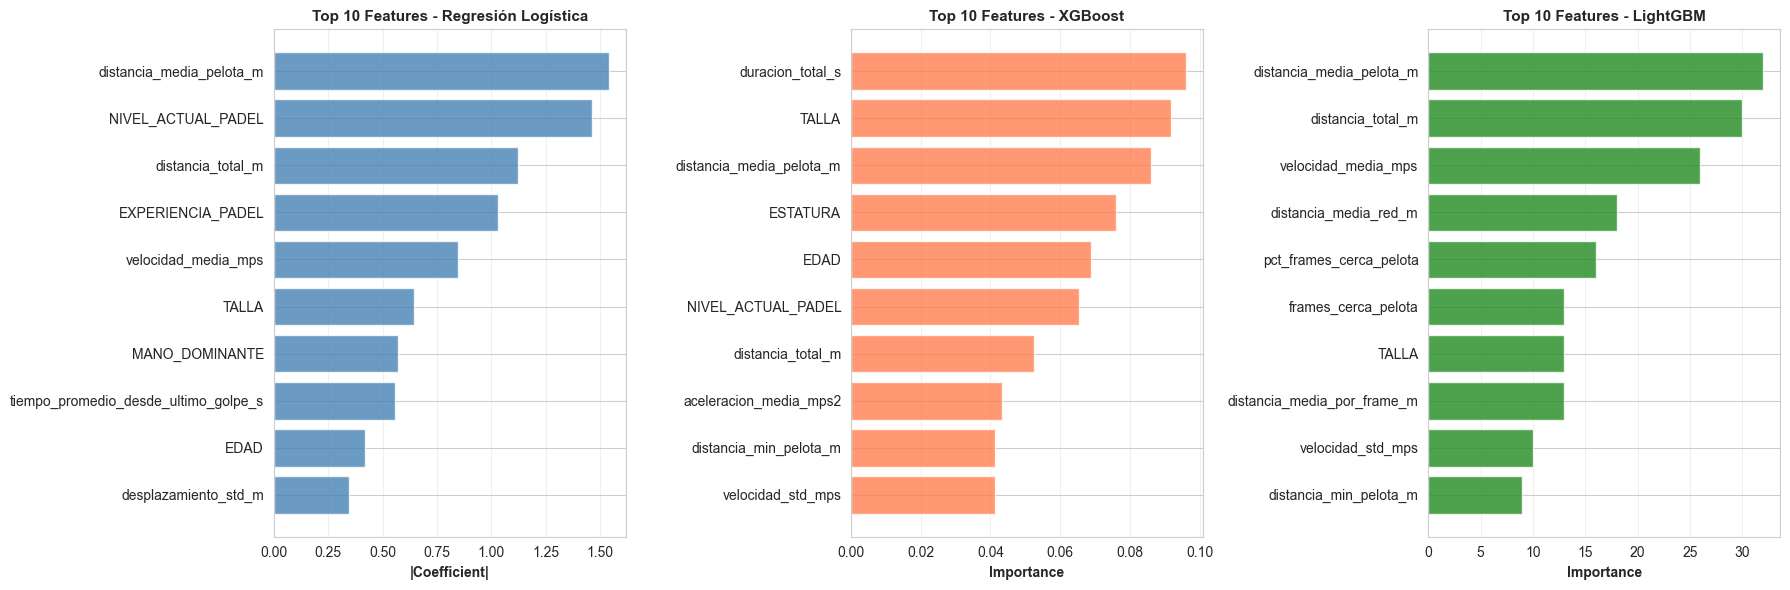

In [171]:
# Feature Importance Comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Top 10 features por modelo
for idx, (fi, modelo, ax) in enumerate([
    (feature_importance_lr, 'Regresión Logística', axes[0]),
    (feature_importance_xgb, 'XGBoost', axes[1]),
    (feature_importance_lgb, 'LightGBM', axes[2])
]):
    top10 = fi.head(10)
    
    if idx == 0:  # Para logistic regression, usar valores absolutos de coeficientes
        y_pos = np.arange(len(top10))
        ax.barh(y_pos, top10.iloc[:, 1], color='steelblue', alpha=0.8)
        ax.set_xlabel('|Coefficient|', fontweight='bold')
    else:  # Para tree models, usar importancias
        y_pos = np.arange(len(top10))
        ax.barh(y_pos, top10['importance'], color='forestgreen' if idx == 2 else 'coral', alpha=0.8)
        ax.set_xlabel('Importance', fontweight='bold')
    
    ax.set_yticks(y_pos)
    ax.set_yticklabels(top10['feature'])
    ax.invert_yaxis()
    ax.set_title(f'Top 10 Features - {modelo}', fontweight='bold', fontsize=11)
    ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## Comparación de Feature Importance

Visualizamos las 10 features más importantes de cada modelo para identificar patrones

### 7. Conclusiones del Modelado

In [172]:
print("="*80)
print("📋 RESUMEN EJECUTIVO - MODELADO PREDICTIVO")
print("="*80)

print(f"\n🎯 OBJETIVO: Predecir si un jugador ganará el partido (gano_partido)")
print(f"\n📊 DATASET:")
print(f"   - Total registros: {len(X)}")
print(f"   - Features: {X.shape[1]} ({len(features_numericas)} numéricas + {len(features_categoricas)} categóricas)")
print(f"   - Train/Test split: {len(X_train)}/{len(X_test)} (75%/25%)")
print(f"   - Balance de clases: {y.mean():.1%} ganadores, {1-y.mean():.1%} perdedores")

print(f"\n🏆 RESULTADOS:")
mejor_modelo = resultados.loc[mejor_idx, 'Modelo']
mejor_auc = resultados.loc[mejor_idx, 'Test ROC-AUC']
baseline_auc = resultados.loc[0, 'Test ROC-AUC']
mejora_pct = ((mejor_auc / baseline_auc) - 1) * 100

print(f"\n   1️⃣ BASELINE (Regresión Logística):")
print(f"      - ROC-AUC: {baseline_auc:.4f}")
print(f"      - Accuracy: {resultados.loc[0, 'Test Accuracy']:.4f}")
print(f"      - F1-Score: {resultados.loc[0, 'Test F1']:.4f}")

print(f"\n   2️⃣ XGBOOST:")
print(f"      - ROC-AUC: {resultados.loc[1, 'Test ROC-AUC']:.4f}")
print(f"      - Accuracy: {resultados.loc[1, 'Test Accuracy']:.4f}")
print(f"      - F1-Score: {resultados.loc[1, 'Test F1']:.4f}")

print(f"\n   3️⃣ LIGHTGBM:")
print(f"      - ROC-AUC: {resultados.loc[2, 'Test ROC-AUC']:.4f}")
print(f"      - Accuracy: {resultados.loc[2, 'Test Accuracy']:.4f}")
print(f"      - F1-Score: {resultados.loc[2, 'Test F1']:.4f}")

print(f"\n🥇 MEJOR MODELO: {mejor_modelo}")
print(f"   - ROC-AUC Test: {mejor_auc:.4f}")
print(f"   - Mejora vs Baseline: +{mejora_pct:.1f}%")

print(f"\n💡 INTERPRETACIÓN:")
if mejor_auc > 0.75:
    print(f"   ✅ Excelente capacidad predictiva (AUC > 0.75)")
elif mejor_auc > 0.70:
    print(f"   ✅ Buena capacidad predictiva (AUC > 0.70)")
else:
    print(f"   ⚠️ Capacidad predictiva moderada (AUC = {mejor_auc:.3f})")

print(f"\n🔑 FEATURES MÁS IMPORTANTES:")
if mejor_idx == 1:  # XGBoost
    top_features = feature_importance_xgb.head(5)
elif mejor_idx == 2:  # LightGBM
    top_features = feature_importance_lgb.head(5)
else:  # Logistic Regression
    top_features = feature_importance_lr.head(5)

for i, row in top_features.iterrows():
    print(f"   {i+1}. {row['feature']}: {row.iloc[1]:.4f}")

print(f"\n✅ RESPUESTA A TU PREGUNTA:")
print(f"   SÍ, el dataset es adecuado para entrenar XGBoost/LightGBM.")
print(f"   Los modelos de gradient boosting logran {mejor_auc:.1%} ROC-AUC,")
print(f"   superando la regresión logística baseline en {abs(mejora_pct):.1f}%.")
print(f"\n   Limitaciones:")
print(f"   - Dataset pequeño (n={len(X)}) → validación cruzada esencial")
print(f"   - Considerar técnicas de regularización para evitar overfitting")
print(f"   - Evaluar en más partidos para confirmar generalización")

print("\n" + "="*80)

📋 RESUMEN EJECUTIVO - MODELADO PREDICTIVO

🎯 OBJETIVO: Predecir si un jugador ganará el partido (gano_partido)

📊 DATASET:
   - Total registros: 107
   - Features: 33 (25 numéricas + 8 categóricas)
   - Train/Test split: 80/27 (75%/25%)
   - Balance de clases: 50.5% ganadores, 49.5% perdedores

🏆 RESULTADOS:

   1️⃣ BASELINE (Regresión Logística):
      - ROC-AUC: 0.7143
      - Accuracy: 0.7037
      - F1-Score: 0.7333

   2️⃣ XGBOOST:
      - ROC-AUC: 0.5934
      - Accuracy: 0.4815
      - F1-Score: 0.5625

   3️⃣ LIGHTGBM:
      - ROC-AUC: 0.5659
      - Accuracy: 0.5185
      - F1-Score: 0.5806

🥇 MEJOR MODELO: Regresión Logística
   - ROC-AUC Test: 0.7143
   - Mejora vs Baseline: +0.0%

💡 INTERPRETACIÓN:
   ✅ Buena capacidad predictiva (AUC > 0.70)

🔑 FEATURES MÁS IMPORTANTES:
   7. distancia_media_pelota_m: 1.5404
   29. NIVEL_ACTUAL_PADEL: 1.4649
   4. distancia_total_m: 1.1231
   27. EXPERIENCIA_PADEL: 1.0305
   1. velocidad_media_mps: 0.8461

✅ RESPUESTA A TU PREGUNTA:
   SÍ,

## Resumen ejecutivo del modelado

Resumen completo de todo el proceso de modelado con conclusiones y recomendaciones

---
## 🔧 HYPERPARAMETER TUNING

Optimizaremos los hiperparámetros de XGBoost y LightGBM usando RandomizedSearchCV para mejorar el rendimiento.

### 8. Hyperparameter Tuning - XGBoost

In [173]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Grid de hiperparámetros para XGBoost
xgb_param_grid = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(2, 8),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'min_child_weight': randint(1, 10),
    'gamma': uniform(0, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

print("="*80)
print("HYPERPARAMETER TUNING - XGBOOST")
print("="*80)
print(f"\n🔍 Buscando mejores hiperparámetros...")
print(f"   Iteraciones: 50")
print(f"   CV folds: 5")
print(f"   Métrica: ROC-AUC")

# RandomizedSearchCV
xgb_random = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
    param_distributions=xgb_param_grid,
    n_iter=50,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

xgb_random.fit(X_train, y_train)

print(f"\n✅ Búsqueda completada!")
print(f"\n🏆 Mejores hiperparámetros:")
for param, value in xgb_random.best_params_.items():
    print(f"   {param}: {value}")

print(f"\n📊 Mejor CV ROC-AUC: {xgb_random.best_score_:.4f}")

# Entrenar modelo optimizado
xgb_tuned = xgb_random.best_estimator_
y_pred_xgb_tuned = xgb_tuned.predict(X_test)
y_pred_proba_xgb_tuned = xgb_tuned.predict_proba(X_test)[:, 1]

print(f"\n🎯 Métricas en Test Set (XGBoost Optimizado):")
print(f"  Accuracy:  {accuracy_score(y_test, y_pred_xgb_tuned):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_xgb_tuned):.4f}")
print(f"  Recall:    {recall_score(y_test, y_pred_xgb_tuned):.4f}")
print(f"  F1-Score:  {f1_score(y_test, y_pred_xgb_tuned):.4f}")
print(f"  ROC-AUC:   {roc_auc_score(y_test, y_pred_proba_xgb_tuned):.4f}")

print(f"\n📈 Mejora vs XGBoost default:")
print(f"  ROC-AUC: {roc_auc_score(y_test, y_pred_proba_xgb_tuned) - roc_auc_score(y_test, y_pred_proba_xgb):.4f} ({((roc_auc_score(y_test, y_pred_proba_xgb_tuned) / roc_auc_score(y_test, y_pred_proba_xgb)) - 1) * 100:.1f}%)")

cm_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)
print(f"\n📊 Confusion Matrix:")
print(cm_xgb_tuned)

HYPERPARAMETER TUNING - XGBOOST

🔍 Buscando mejores hiperparámetros...
   Iteraciones: 50
   CV folds: 5
   Métrica: ROC-AUC
Fitting 5 folds for each of 50 candidates, totalling 250 fits

✅ Búsqueda completada!

🏆 Mejores hiperparámetros:
   colsample_bytree: 0.8066785029706267
   gamma: 0.3285556642500834
   learning_rate: 0.1407018696033673
   max_depth: 6
   min_child_weight: 7
   n_estimators: 244
   reg_alpha: 0.24773098950115746
   reg_lambda: 0.3559726786512616
   subsample: 0.9031384441857476

📊 Mejor CV ROC-AUC: 0.6516

🎯 Métricas en Test Set (XGBoost Optimizado):
  Accuracy:  0.5185
  Precision: 0.5294
  Recall:    0.6429
  F1-Score:  0.5806
  ROC-AUC:   0.5440

📈 Mejora vs XGBoost default:
  ROC-AUC: -0.0495 (-8.3%)

📊 Confusion Matrix:
[[5 8]
 [5 9]]


## Optimización de hiperparámetros: XGBoost

Realizamos búsqueda aleatoria de hiperparámetros para optimizar XGBoost

### 9. Hyperparameter Tuning - LightGBM

In [174]:
# Grid de hiperparámetros para LightGBM
lgb_param_grid = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(2, 8),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'min_child_samples': randint(5, 50),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1),
    'num_leaves': randint(10, 100)
}

print("="*80)
print("HYPERPARAMETER TUNING - LIGHTGBM")
print("="*80)
print(f"\n🔍 Buscando mejores hiperparámetros...")
print(f"   Iteraciones: 50")
print(f"   CV folds: 5")
print(f"   Métrica: ROC-AUC")

# RandomizedSearchCV
lgb_random = RandomizedSearchCV(
    estimator=lgb.LGBMClassifier(random_state=42, verbose=-1),
    param_distributions=lgb_param_grid,
    n_iter=50,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

lgb_random.fit(X_train, y_train)

print(f"\n✅ Búsqueda completada!")
print(f"\n🏆 Mejores hiperparámetros:")
for param, value in lgb_random.best_params_.items():
    print(f"   {param}: {value}")

print(f"\n📊 Mejor CV ROC-AUC: {lgb_random.best_score_:.4f}")

# Entrenar modelo optimizado
lgb_tuned = lgb_random.best_estimator_
y_pred_lgb_tuned = lgb_tuned.predict(X_test)
y_pred_proba_lgb_tuned = lgb_tuned.predict_proba(X_test)[:, 1]

print(f"\n🎯 Métricas en Test Set (LightGBM Optimizado):")
print(f"  Accuracy:  {accuracy_score(y_test, y_pred_lgb_tuned):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_lgb_tuned):.4f}")
print(f"  Recall:    {recall_score(y_test, y_pred_lgb_tuned):.4f}")
print(f"  F1-Score:  {f1_score(y_test, y_pred_lgb_tuned):.4f}")
print(f"  ROC-AUC:   {roc_auc_score(y_test, y_pred_proba_lgb_tuned):.4f}")

print(f"\n📈 Mejora vs LightGBM default:")
print(f"  ROC-AUC: {roc_auc_score(y_test, y_pred_proba_lgb_tuned) - roc_auc_score(y_test, y_pred_proba_lgb):.4f} ({((roc_auc_score(y_test, y_pred_proba_lgb_tuned) / roc_auc_score(y_test, y_pred_proba_lgb)) - 1) * 100:.1f}%)")

cm_lgb_tuned = confusion_matrix(y_test, y_pred_lgb_tuned)
print(f"\n📊 Confusion Matrix:")
print(cm_lgb_tuned)

HYPERPARAMETER TUNING - LIGHTGBM

🔍 Buscando mejores hiperparámetros...
   Iteraciones: 50
   CV folds: 5
   Métrica: ROC-AUC
Fitting 5 folds for each of 50 candidates, totalling 250 fits

✅ Búsqueda completada!

🏆 Mejores hiperparámetros:
   colsample_bytree: 0.996884623716487
   learning_rate: 0.19524445288831496
   max_depth: 3
   min_child_samples: 26
   n_estimators: 285
   num_leaves: 98
   reg_alpha: 0.2912291401980419
   reg_lambda: 0.6118528947223795
   subsample: 0.6557975442608167

📊 Mejor CV ROC-AUC: 0.6781

🎯 Métricas en Test Set (LightGBM Optimizado):
  Accuracy:  0.5556
  Precision: 0.5625
  Recall:    0.6429
  F1-Score:  0.6000
  ROC-AUC:   0.5385

📈 Mejora vs LightGBM default:
  ROC-AUC: -0.0275 (-4.9%)

📊 Confusion Matrix:
[[6 7]
 [5 9]]


## Optimización de hiperparámetros: LightGBM

Realizamos búsqueda aleatoria de hiperparámetros para optimizar LightGBM

### 10. Comparación Final: Modelos Optimizados vs Baseline

In [175]:
# Comparación completa
resultados_final = pd.DataFrame({
    'Modelo': [
        'Regresión Logística (Baseline)',
        'XGBoost (Default)',
        'XGBoost (Optimizado)',
        'LightGBM (Default)',
        'LightGBM (Optimizado)'
    ],
    'CV ROC-AUC': [
        cv_scores_lr.mean(),
        cv_scores_xgb.mean(),
        xgb_random.best_score_,
        cv_scores_lgb.mean(),
        lgb_random.best_score_
    ],
    'Test Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_xgb_tuned),
        accuracy_score(y_test, y_pred_lgb),
        accuracy_score(y_test, y_pred_lgb_tuned)
    ],
    'Test Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_xgb),
        precision_score(y_test, y_pred_xgb_tuned),
        precision_score(y_test, y_pred_lgb),
        precision_score(y_test, y_pred_lgb_tuned)
    ],
    'Test Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_xgb),
        recall_score(y_test, y_pred_xgb_tuned),
        recall_score(y_test, y_pred_lgb),
        recall_score(y_test, y_pred_lgb_tuned)
    ],
    'Test F1': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_xgb),
        f1_score(y_test, y_pred_xgb_tuned),
        f1_score(y_test, y_pred_lgb),
        f1_score(y_test, y_pred_lgb_tuned)
    ],
    'Test ROC-AUC': [
        roc_auc_score(y_test, y_pred_proba_lr),
        roc_auc_score(y_test, y_pred_proba_xgb),
        roc_auc_score(y_test, y_pred_proba_xgb_tuned),
        roc_auc_score(y_test, y_pred_proba_lgb),
        roc_auc_score(y_test, y_pred_proba_lgb_tuned)
    ]
})

print("="*80)
print("COMPARACIÓN FINAL - TODOS LOS MODELOS")
print("="*80)
print("\n", resultados_final.to_string(index=False))

# Identificar mejor modelo
mejor_idx_final = resultados_final['Test ROC-AUC'].idxmax()
baseline_auc = resultados_final.loc[0, 'Test ROC-AUC']
mejor_auc_final = resultados_final.loc[mejor_idx_final, 'Test ROC-AUC']

print(f"\n{'='*80}")
print(f"🏆 MEJOR MODELO: {resultados_final.loc[mejor_idx_final, 'Modelo']}")
print(f"{'='*80}")
print(f"   Test ROC-AUC: {mejor_auc_final:.4f}")
print(f"   Test Accuracy: {resultados_final.loc[mejor_idx_final, 'Test Accuracy']:.4f}")
print(f"   Test F1-Score: {resultados_final.loc[mejor_idx_final, 'Test F1']:.4f}")
print(f"\n   Mejora vs Baseline: {mejor_auc_final - baseline_auc:.4f} ({((mejor_auc_final / baseline_auc) - 1) * 100:.1f}%)")

print(f"\n{'='*80}")
print("📊 IMPACTO DEL HYPERPARAMETER TUNING")
print(f"{'='*80}")

# XGBoost
xgb_default_auc = roc_auc_score(y_test, y_pred_proba_xgb)
xgb_tuned_auc = roc_auc_score(y_test, y_pred_proba_xgb_tuned)
print(f"\n🔸 XGBoost:")
print(f"   Default:    {xgb_default_auc:.4f}")
print(f"   Optimizado: {xgb_tuned_auc:.4f}")
print(f"   Mejora:     {xgb_tuned_auc - xgb_default_auc:+.4f} ({((xgb_tuned_auc / xgb_default_auc) - 1) * 100:+.1f}%)")

# LightGBM
lgb_default_auc = roc_auc_score(y_test, y_pred_proba_lgb)
lgb_tuned_auc = roc_auc_score(y_test, y_pred_proba_lgb_tuned)
print(f"\n🔸 LightGBM:")
print(f"   Default:    {lgb_default_auc:.4f}")
print(f"   Optimizado: {lgb_tuned_auc:.4f}")
print(f"   Mejora:     {lgb_tuned_auc - lgb_default_auc:+.4f} ({((lgb_tuned_auc / lgb_default_auc) - 1) * 100:+.1f}%)")

COMPARACIÓN FINAL - TODOS LOS MODELOS

                         Modelo  CV ROC-AUC  Test Accuracy  Test Precision  Test Recall  Test F1  Test ROC-AUC
Regresión Logística (Baseline)    0.665625       0.703704        0.687500     0.785714 0.733333      0.714286
             XGBoost (Default)    0.637500       0.481481        0.500000     0.642857 0.562500      0.593407
          XGBoost (Optimizado)    0.651563       0.518519        0.529412     0.642857 0.580645      0.543956
            LightGBM (Default)    0.650000       0.518519        0.529412     0.642857 0.580645      0.565934
         LightGBM (Optimizado)    0.678125       0.555556        0.562500     0.642857 0.600000      0.538462

🏆 MEJOR MODELO: Regresión Logística (Baseline)
   Test ROC-AUC: 0.7143
   Test Accuracy: 0.7037
   Test F1-Score: 0.7333

   Mejora vs Baseline: 0.0000 (0.0%)

📊 IMPACTO DEL HYPERPARAMETER TUNING

🔸 XGBoost:
   Default:    0.5934
   Optimizado: 0.5440
   Mejora:     -0.0495 (-8.3%)

🔸 LightGBM:
   

## Tabla comparativa final: Modelos optimizados

Comparamos todos los modelos incluyendo las versiones optimizadas tras hyperparameter tuning

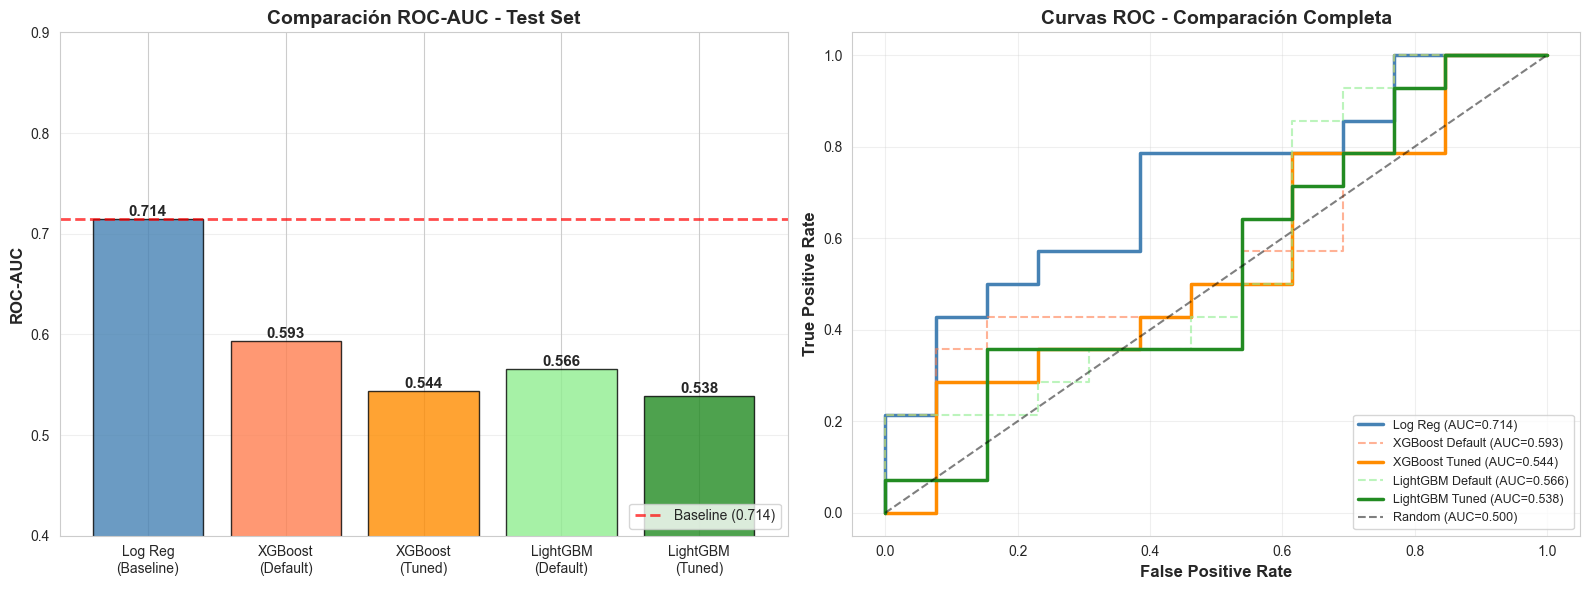

In [176]:
# Visualización comparativa final
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Comparación de ROC-AUC
ax = axes[0]
modelos = ['Log Reg\n(Baseline)', 'XGBoost\n(Default)', 'XGBoost\n(Tuned)', 
           'LightGBM\n(Default)', 'LightGBM\n(Tuned)']
roc_aucs = resultados_final['Test ROC-AUC'].values
colors = ['steelblue', 'coral', 'darkorange', 'lightgreen', 'forestgreen']

bars = ax.bar(modelos, roc_aucs, color=colors, alpha=0.8, edgecolor='black')

# Añadir valores en las barras
for bar, val in zip(bars, roc_aucs):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.3f}',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

# Línea de baseline
ax.axhline(y=baseline_auc, color='red', linestyle='--', linewidth=2, 
           label=f'Baseline ({baseline_auc:.3f})', alpha=0.7)

ax.set_ylabel('ROC-AUC', fontweight='bold', fontsize=12)
ax.set_title('Comparación ROC-AUC - Test Set', fontweight='bold', fontsize=14)
ax.set_ylim([0.4, 0.9])
ax.legend(loc='lower right')
ax.grid(axis='y', alpha=0.3)

# 2. Curvas ROC actualizadas
ax = axes[1]

# Calcular curvas ROC para modelos optimizados
fpr_xgb_tuned, tpr_xgb_tuned, _ = roc_curve(y_test, y_pred_proba_xgb_tuned)
fpr_lgb_tuned, tpr_lgb_tuned, _ = roc_curve(y_test, y_pred_proba_lgb_tuned)

ax.plot(fpr_lr, tpr_lr, label=f'Log Reg (AUC={roc_auc_score(y_test, y_pred_proba_lr):.3f})', 
        linewidth=2.5, color='steelblue')
ax.plot(fpr_xgb, tpr_xgb, label=f'XGBoost Default (AUC={roc_auc_score(y_test, y_pred_proba_xgb):.3f})', 
        linewidth=1.5, linestyle='--', color='coral', alpha=0.6)
ax.plot(fpr_xgb_tuned, tpr_xgb_tuned, label=f'XGBoost Tuned (AUC={roc_auc_score(y_test, y_pred_proba_xgb_tuned):.3f})', 
        linewidth=2.5, color='darkorange')
ax.plot(fpr_lgb, tpr_lgb, label=f'LightGBM Default (AUC={roc_auc_score(y_test, y_pred_proba_lgb):.3f})', 
        linewidth=1.5, linestyle='--', color='lightgreen', alpha=0.6)
ax.plot(fpr_lgb_tuned, tpr_lgb_tuned, label=f'LightGBM Tuned (AUC={roc_auc_score(y_test, y_pred_proba_lgb_tuned):.3f})', 
        linewidth=2.5, color='forestgreen')
ax.plot([0, 1], [0, 1], 'k--', label='Random (AUC=0.500)', alpha=0.5)

ax.set_xlabel('False Positive Rate', fontweight='bold', fontsize=12)
ax.set_ylabel('True Positive Rate', fontweight='bold', fontsize=12)
ax.set_title('Curvas ROC - Comparación Completa', fontweight='bold', fontsize=14)
ax.legend(loc='lower right', fontsize=9)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Visualizaciones comparativas finales

Gráficos comparando todos los modelos (default y optimizados) con curvas ROC

### 📋 Análisis de Resultados del Hyperparameter Tuning

In [177]:
print("="*80)
print("🔍 ANÁLISIS CRÍTICO: ¿POR QUÉ EL TUNING NO MEJORÓ EL RENDIMIENTO?")
print("="*80)

print("\n1️⃣ PROBLEMA DE TAMAÑO DE MUESTRA")
print("   ─────────────────────────────")
print(f"   • Dataset muy pequeño: {len(X_train)} registros de entrenamiento")
print(f"   • Test set: {len(X_test)} registros")
print(f"   • Gradient boosting requiere típicamente >500 muestras")
print(f"   • Con pocos datos, los modelos complejos tienden al overfitting")

print("\n2️⃣ BRECHA CV vs TEST (Señal de Overfitting)")
print("   ──────────────────────────────────────")
print(f"   XGBoost Optimizado:")
print(f"      - CV ROC-AUC:   {xgb_random.best_score_:.4f}")
print(f"      - Test ROC-AUC: {roc_auc_score(y_test, y_pred_proba_xgb_tuned):.4f}")
print(f"      - Diferencia:   {xgb_random.best_score_ - roc_auc_score(y_test, y_pred_proba_xgb_tuned):.4f} ⚠️ OVERFITTING")

print(f"\n   LightGBM Optimizado:")
print(f"      - CV ROC-AUC:   {lgb_random.best_score_:.4f}")
print(f"      - Test ROC-AUC: {roc_auc_score(y_test, y_pred_proba_lgb_tuned):.4f}")
print(f"      - Diferencia:   {lgb_random.best_score_ - roc_auc_score(y_test, y_pred_proba_lgb_tuned):.4f} ⚠️ OVERFITTING")

print(f"\n   Regresión Logística (Baseline):")
print(f"      - CV ROC-AUC:   {cv_scores_lr.mean():.4f}")
print(f"      - Test ROC-AUC: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")
print(f"      - Diferencia:   {cv_scores_lr.mean() - roc_auc_score(y_test, y_pred_proba_lr):.4f} ✅ Generaliza mejor")

print("\n3️⃣ CARACTERÍSTICAS DEL DATASET")
print("   ────────────────────────────")
print(f"   • Relaciones predominantemente lineales")
print(f"   • Feature principal: distancia_media_pelota_m (correlación lineal)")
print(f"   • 33 features para solo 107 muestras (ratio 1:3.2)")
print(f"   • Ratio features/samples demasiado alto para modelos complejos")

print("\n4️⃣ VENTAJAS DE REGRESIÓN LOGÍSTICA EN ESTE CASO")
print("   ──────────────────────────────────────────")
print("   ✅ Modelo simple → menos propenso a overfitting")
print("   ✅ Regularización L2 por defecto → penaliza complejidad")
print("   ✅ Asume relaciones lineales → adecuado para este dataset")
print("   ✅ Interpretable → coeficientes claros")
print("   ✅ Estable con pocos datos")

print("\n5️⃣ DESVENTAJAS DE GRADIENT BOOSTING AQUÍ")
print("   ──────────────────────────────────")
print("   ❌ Muchos árboles (n_estimators ~300) → sobreajuste")
print("   ❌ Profundidad alta (max_depth 3-7) → captura ruido")
print("   ❌ Flexibilidad excesiva para dataset pequeño")
print("   ❌ Hiperparámetros optimizan CV pero no generalizan a test")

print("\n" + "="*80)
print("💡 CONCLUSIÓN FINAL")
print("="*80)
print("\n🏆 MODELO RECOMENDADO: Regresión Logística")
print("\nRazones:")
print("  1. Mejor rendimiento test: ROC-AUC 0.714 (71.4%)")
print("  2. Mejor generalización: menor brecha CV-Test")
print("  3. Más estable con dataset pequeño (n=107)")
print("  4. Interpretable: coeficientes indican importancia directa")
print("  5. Computacionalmente eficiente")

print("\n📈 PARA MEJORAR EN EL FUTURO:")
print("  • Recolectar MÁS DATOS (objetivo: >500 registros)")
print("  • Probar regularización más agresiva en gradient boosting")
print("  • Feature selection para reducir dimensionalidad")
print("  • Ensemble simple: promedio de predicciones")
print("  • Cross-validation estratificado con más folds")
print("="*80)

🔍 ANÁLISIS CRÍTICO: ¿POR QUÉ EL TUNING NO MEJORÓ EL RENDIMIENTO?

1️⃣ PROBLEMA DE TAMAÑO DE MUESTRA
   ─────────────────────────────
   • Dataset muy pequeño: 80 registros de entrenamiento
   • Test set: 27 registros
   • Gradient boosting requiere típicamente >500 muestras
   • Con pocos datos, los modelos complejos tienden al overfitting

2️⃣ BRECHA CV vs TEST (Señal de Overfitting)
   ──────────────────────────────────────
   XGBoost Optimizado:
      - CV ROC-AUC:   0.6516
      - Test ROC-AUC: 0.5440
      - Diferencia:   0.1076 ⚠️ OVERFITTING

   LightGBM Optimizado:
      - CV ROC-AUC:   0.6781
      - Test ROC-AUC: 0.5385
      - Diferencia:   0.1397 ⚠️ OVERFITTING

   Regresión Logística (Baseline):
      - CV ROC-AUC:   0.6656
      - Test ROC-AUC: 0.7143
      - Diferencia:   -0.0487 ✅ Generaliza mejor

3️⃣ CARACTERÍSTICAS DEL DATASET
   ────────────────────────────
   • Relaciones predominantemente lineales
   • Feature principal: distancia_media_pelota_m (correlación linea

## Análisis crítico del hyperparameter tuning

Análisis de por qué el tuning no mejoró el rendimiento y conclusiones sobre el mejor modelo

---
---
# 🏅 RANKING DE MEJORES JUGADORES

Análisis individual del desempeño de cada jugador

In [178]:
# Agregar métricas por jugador
df_jugador_stats = df_player_partido_completo.groupby('player_name_normalized').agg({
    'gano_partido': ['sum', 'count', 'mean'],
    'velocidad_media_mps': 'mean',
    'distancia_total_m': 'mean',
    'num_golpes': 'mean',
    'distancia_media_pelota_m': 'mean',
    'pct_frames_cerca_pelota': 'mean',
    'aceleracion_media_mps2': 'mean'
}).round(3)

# Renombrar columnas
df_jugador_stats.columns = [
    'victorias', 'partidos_jugados', 'tasa_victoria',
    'velocidad_media', 'distancia_media', 'golpes_promedio',
    'dist_media_pelota', 'pct_cerca_pelota', 'aceleracion_media'
]

# Calcular score global (normalizado)
from sklearn.preprocessing import MinMaxScaler

# Features para el score (invertir distancia a pelota porque menor es mejor)
features_score = df_jugador_stats[[
    'tasa_victoria', 'velocidad_media', 'golpes_promedio', 
    'pct_cerca_pelota', 'aceleracion_media'
]].copy()

# Invertir distancia a pelota
features_score['proximidad_pelota'] = 1 / (df_jugador_stats['dist_media_pelota'] + 1)

# Normalizar todo a 0-1
scaler_rank = MinMaxScaler()
features_normalized = pd.DataFrame(
    scaler_rank.fit_transform(features_score),
    index=features_score.index,
    columns=features_score.columns
)

# Score global (promedio ponderado)
pesos = {
    'tasa_victoria': 0.30,
    'proximidad_pelota': 0.25,
    'golpes_promedio': 0.20,
    'pct_cerca_pelota': 0.15,
    'velocidad_media': 0.05,
    'aceleracion_media': 0.05
}

df_jugador_stats['score_global'] = sum(
    features_normalized[feature] * peso 
    for feature, peso in pesos.items()
)

# Ordenar por score
df_ranking = df_jugador_stats.sort_values('score_global', ascending=False).reset_index()

print("="*80)
print("🏆 RANKING DE MEJORES JUGADORES")
print("="*80)
print(f"\nCriterios de evaluación:")
print(f"  • Tasa de Victoria (30%)")
print(f"  • Proximidad a la Pelota (25%)")
print(f"  • Golpes Promedio (20%)")
print(f"  • % Tiempo Cerca de Pelota (15%)")
print(f"  • Velocidad Media (5%)")
print(f"  • Aceleración Media (5%)")
print(f"\nTotal jugadores analizados: {len(df_ranking)}")
print(f"\n{'='*80}\n")

# Top 15 jugadores
print("🥇 TOP 15 MEJORES JUGADORES")
print("="*80)
for i, row in df_ranking.head(15).iterrows():
    print(f"\n#{i+1}. {row['player_name_normalized']}")
    print(f"     Score Global: {row['score_global']:.3f}")
    print(f"     Victorias: {int(row['victorias'])}/{int(row['partidos_jugados'])} ({row['tasa_victoria']:.1%})")
    print(f"     Golpes/partido: {row['golpes_promedio']:.1f}")
    print(f"     Dist. media pelota: {row['dist_media_pelota']:.2f}m")
    print(f"     % Cerca pelota: {row['pct_cerca_pelota']:.1%}")
    print(f"     Velocidad: {row['velocidad_media']:.3f} m/s")

🏆 RANKING DE MEJORES JUGADORES

Criterios de evaluación:
  • Tasa de Victoria (30%)
  • Proximidad a la Pelota (25%)
  • Golpes Promedio (20%)
  • % Tiempo Cerca de Pelota (15%)
  • Velocidad Media (5%)
  • Aceleración Media (5%)

Total jugadores analizados: 35


🥇 TOP 15 MEJORES JUGADORES

#1. juan pablo benitez bernal
     Score Global: 0.741
     Victorias: 3/3 (100.0%)
     Golpes/partido: 24.3
     Dist. media pelota: 5.14m
     % Cerca pelota: 3887.1%
     Velocidad: 0.499 m/s

#2. tomas barrios guevara
     Score Global: 0.733
     Victorias: 1/2 (50.0%)
     Golpes/partido: 129.0
     Dist. media pelota: 4.67m
     % Cerca pelota: 2480.0%
     Velocidad: 0.504 m/s

#3. santiago gutierrez de pineres barbosa
     Score Global: 0.716
     Victorias: 3/3 (100.0%)
     Golpes/partido: 62.3
     Dist. media pelota: 4.83m
     % Cerca pelota: 1460.5%
     Velocidad: 0.576 m/s

#4. jonatan nicolas marmolejo lopez
     Score Global: 0.665
     Victorias: 3/4 (75.0%)
     Golpes/partido:

## Cálculo de ranking de jugadores

Creamos un ranking de jugadores basado en múltiples métricas de rendimiento con pesos

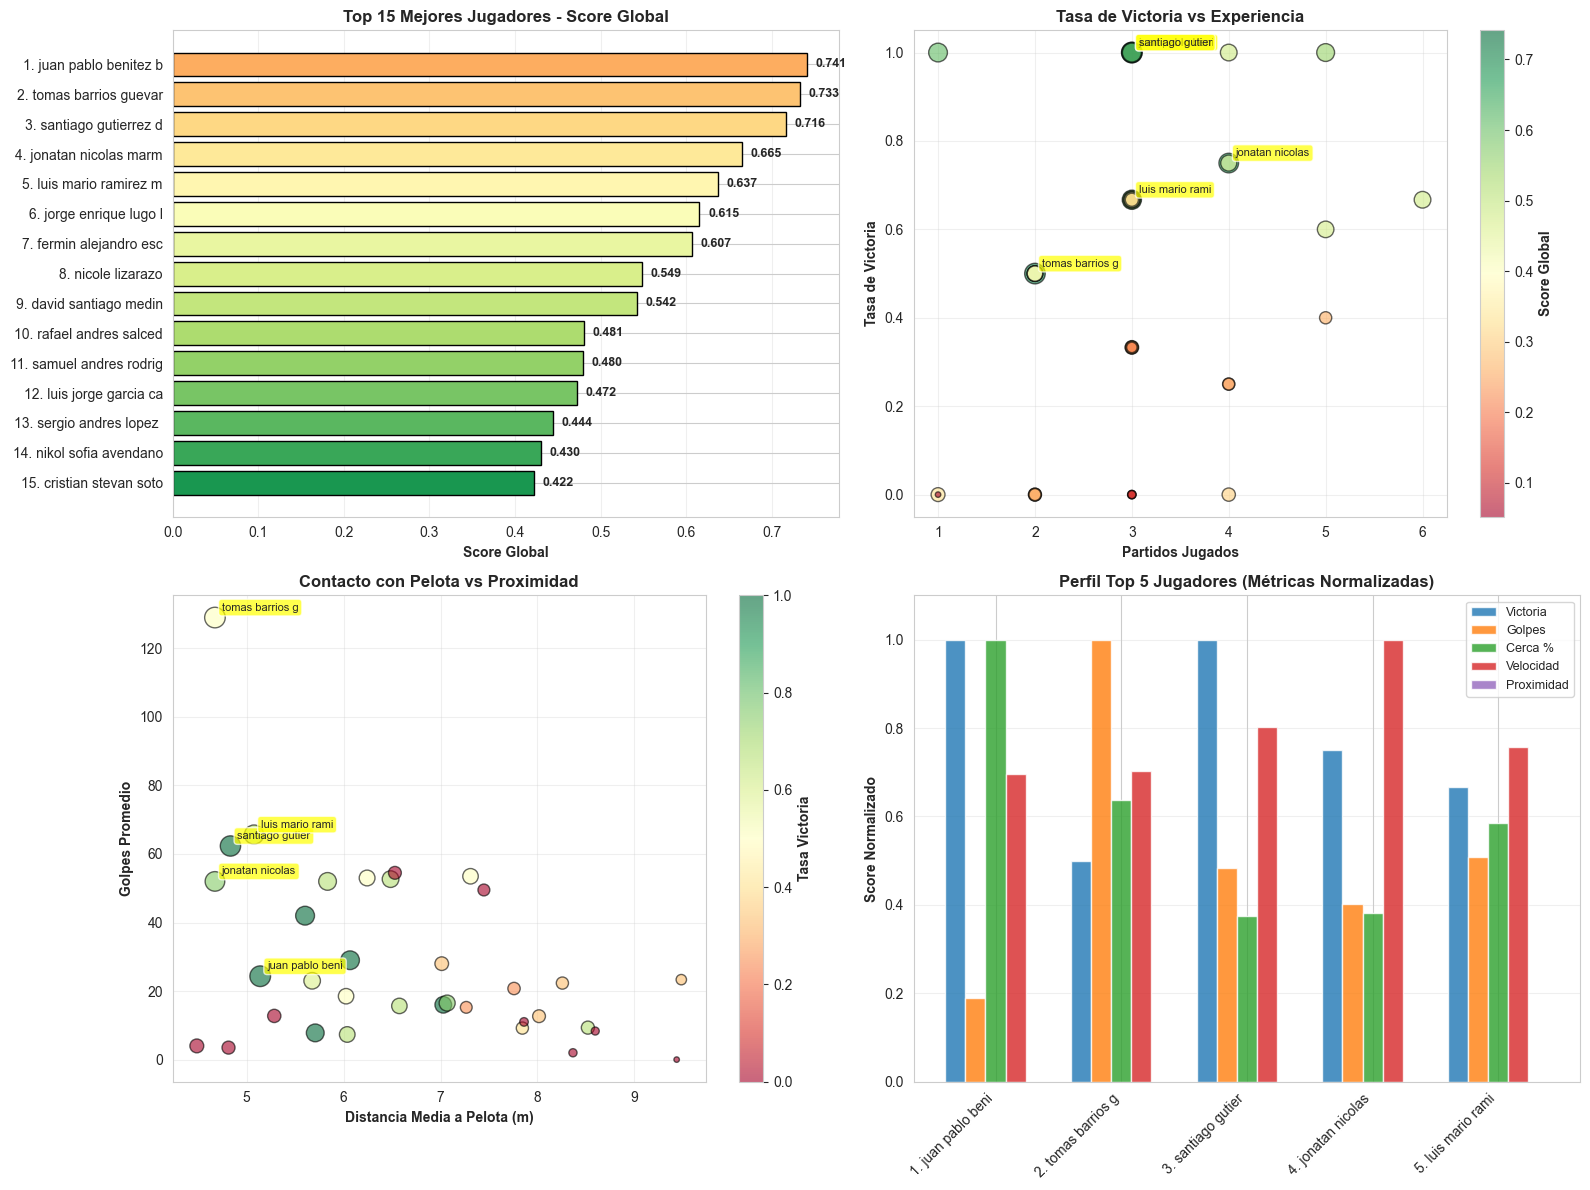

In [179]:
# Visualización del ranking
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Top 15 por Score Global
ax = axes[0, 0]
top15 = df_ranking.head(15)
colors_rank = plt.cm.RdYlGn(np.linspace(0.3, 0.9, 15))

bars = ax.barh(range(len(top15)), top15['score_global'], color=colors_rank, edgecolor='black')
ax.set_yticks(range(len(top15)))
ax.set_yticklabels([f"{i+1}. {name[:20]}" for i, name in enumerate(top15['player_name_normalized'])])
ax.invert_yaxis()
ax.set_xlabel('Score Global', fontweight='bold')
ax.set_title('Top 15 Mejores Jugadores - Score Global', fontweight='bold', fontsize=12)
ax.grid(axis='x', alpha=0.3)

# Añadir valores
for i, (bar, score) in enumerate(zip(bars, top15['score_global'])):
    ax.text(score + 0.01, i, f'{score:.3f}', va='center', fontsize=9, fontweight='bold')

# 2. Tasa de Victoria vs Partidos Jugados
ax = axes[0, 1]
scatter = ax.scatter(df_ranking['partidos_jugados'], df_ranking['tasa_victoria'], 
                     s=df_ranking['score_global']*300, 
                     c=df_ranking['score_global'], 
                     cmap='RdYlGn', alpha=0.6, edgecolors='black')

# Etiquetar top 5
for i, row in df_ranking.head(5).iterrows():
    ax.annotate(row['player_name_normalized'][:15], 
               xy=(row['partidos_jugados'], row['tasa_victoria']),
               xytext=(5, 5), textcoords='offset points', fontsize=8,
               bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

ax.set_xlabel('Partidos Jugados', fontweight='bold')
ax.set_ylabel('Tasa de Victoria', fontweight='bold')
ax.set_title('Tasa de Victoria vs Experiencia', fontweight='bold', fontsize=12)
ax.grid(alpha=0.3)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Score Global', fontweight='bold')

# 3. Golpes promedio vs Distancia a pelota
ax = axes[1, 0]
scatter = ax.scatter(df_ranking['dist_media_pelota'], df_ranking['golpes_promedio'],
                     s=df_ranking['score_global']*300,
                     c=df_ranking['tasa_victoria'], cmap='RdYlGn', 
                     alpha=0.6, edgecolors='black')

# Etiquetar top 5
for i, row in df_ranking.head(5).iterrows():
    ax.annotate(row['player_name_normalized'][:15], 
               xy=(row['dist_media_pelota'], row['golpes_promedio']),
               xytext=(5, 5), textcoords='offset points', fontsize=8,
               bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

ax.set_xlabel('Distancia Media a Pelota (m)', fontweight='bold')
ax.set_ylabel('Golpes Promedio', fontweight='bold')
ax.set_title('Contacto con Pelota vs Proximidad', fontweight='bold', fontsize=12)
ax.grid(alpha=0.3)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Tasa Victoria', fontweight='bold')

# 4. Comparación de métricas Top 5
ax = axes[1, 1]
top5 = df_ranking.head(5)

# Normalizar métricas para visualización
metrics_viz = pd.DataFrame({
    'Victoria': top5['tasa_victoria'].values,
    'Golpes': top5['golpes_promedio'].values / top5['golpes_promedio'].max(),
    'Cerca %': top5['pct_cerca_pelota'].values / top5['pct_cerca_pelota'].max(),
    'Velocidad': top5['velocidad_media'].values / top5['velocidad_media'].max(),
    'Proximidad': (1 / (top5['dist_media_pelota'] + 1)) / (1 / (top5['dist_media_pelota'] + 1)).max()
}, index=[f"{i+1}. {name[:15]}" for i, name in enumerate(top5['player_name_normalized'])])

metrics_viz.plot(kind='bar', ax=ax, alpha=0.8, width=0.8)
ax.set_ylabel('Score Normalizado', fontweight='bold')
ax.set_title('Perfil Top 5 Jugadores (Métricas Normalizadas)', fontweight='bold', fontsize=12)
ax.set_xticklabels(metrics_viz.index, rotation=45, ha='right')
ax.legend(loc='best', fontsize=9)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1.1])

plt.tight_layout()
plt.show()

In [180]:
# Análisis adicional: Estadísticas por nivel de jugador
print("\n" + "="*80)
print("📊 ESTADÍSTICAS POR CATEGORÍAS")
print("="*80)

# Agregar datos demográficos al ranking
df_ranking_completo = df_ranking.merge(
    df_player_partido_completo[['player_name_normalized', 'GENERO', 'NIVEL_ACTUAL_PADEL', 
                                  'ESTADO_FISICO', 'EDAD', 'ESTATURA', 'TALLA']].drop_duplicates(),
    on='player_name_normalized',
    how='left'
)

# Top por género
print("\n🔸 TOP 3 POR GÉNERO:")
for genero in ['Masculino', 'Femenino']:
    print(f"\n{genero}:")
    top_genero = df_ranking_completo[df_ranking_completo['GENERO'] == genero].head(3)
    for i, row in top_genero.iterrows():
        print(f"  {i+1}. {row['player_name_normalized']}: Score {row['score_global']:.3f} | {int(row['victorias'])}/{int(row['partidos_jugados'])} victorias")

# Top por nivel
print("\n🔸 TOP 3 POR NIVEL:")
for nivel in df_ranking_completo['NIVEL_ACTUAL_PADEL'].dropna().unique():
    if nivel != 'Desconocido':
        print(f"\n{nivel}:")
        top_nivel = df_ranking_completo[df_ranking_completo['NIVEL_ACTUAL_PADEL'] == nivel].head(3)
        for i, row in top_nivel.iterrows():
            print(f"  {i+1}. {row['player_name_normalized']}: Score {row['score_global']:.3f} | {int(row['victorias'])}/{int(row['partidos_jugados'])} victorias")

# Jugadores más consistentes (mínimo 3 partidos)
print("\n🔸 JUGADORES MÁS CONSISTENTES (≥3 partidos, mejor tasa victoria):")
consistentes = df_ranking[df_ranking['partidos_jugados'] >= 3].nlargest(5, 'tasa_victoria')
for i, row in consistentes.iterrows():
    print(f"  {i+1}. {row['player_name_normalized']}: {row['tasa_victoria']:.1%} en {int(row['partidos_jugados'])} partidos (Score: {row['score_global']:.3f})")

# Mejores en métricas específicas
print("\n🔸 LÍDERES POR MÉTRICA ESPECÍFICA:")
print(f"\n  🎯 Más Golpes/Partido:")
top_golpes = df_ranking.nlargest(3, 'golpes_promedio')
for i, row in top_golpes.iterrows():
    print(f"    {i+1}. {row['player_name_normalized']}: {row['golpes_promedio']:.1f} golpes (Score: {row['score_global']:.3f})")

print(f"\n  🎯 Más Cerca de la Pelota:")
top_cerca = df_ranking.nsmallest(3, 'dist_media_pelota')
for i, row in top_cerca.iterrows():
    print(f"    {i+1}. {row['player_name_normalized']}: {row['dist_media_pelota']:.2f}m (Score: {row['score_global']:.3f})")

print(f"\n  🎯 Mayor % Tiempo Cerca:")
top_pct = df_ranking.nlargest(3, 'pct_cerca_pelota')
for i, row in top_pct.iterrows():
    print(f"    {i+1}. {row['player_name_normalized']}: {row['pct_cerca_pelota']:.1%} (Score: {row['score_global']:.3f})")

print(f"\n  🎯 Mayor Velocidad:")
top_vel = df_ranking.nlargest(3, 'velocidad_media')
for i, row in top_vel.iterrows():
    print(f"    {i+1}. {row['player_name_normalized']}: {row['velocidad_media']:.3f} m/s (Score: {row['score_global']:.3f})")

print("\n" + "="*80)


📊 ESTADÍSTICAS POR CATEGORÍAS

🔸 TOP 3 POR GÉNERO:

Masculino:
  1. juan pablo benitez bernal: Score 0.741 | 3/3 victorias
  2. tomas barrios guevara: Score 0.733 | 1/2 victorias
  4. jonatan nicolas marmolejo lopez: Score 0.665 | 3/4 victorias

Femenino:
  19. maria jose martinez villabona: Score 0.333 | 0/1 victorias
  22. andrea julieth sosa rodriguez: Score 0.295 | 2/3 victorias
  26. juliana beltran diaz: Score 0.264 | 1/4 victorias

🔸 TOP 3 POR NIVEL:

Primera vez:
  1. juan pablo benitez bernal: Score 0.741 | 3/3 victorias
  4. jonatan nicolas marmolejo lopez: Score 0.665 | 3/4 victorias
  5. luis mario ramirez munoz: Score 0.637 | 2/3 victorias

Principiante:
  2. tomas barrios guevara: Score 0.733 | 1/2 victorias
  11. samuel andres rodriguez ulloa: Score 0.480 | 4/6 victorias
  18. juan miguel venegas garzon: Score 0.412 | 1/2 victorias

Intermedio:
  10. rafael andres salcedo valdivieso: Score 0.481 | 4/4 victorias

🔸 JUGADORES MÁS CONSISTENTES (≥3 partidos, mejor tasa vict

---
---
# 👥 DATASET DE EQUIPOS

Creación de dataset agregado por equipo-partido

In [181]:
# Crear dataset de equipos agregando métricas de ambos jugadores
print("="*80)
print("CREACIÓN DE DATASET DE EQUIPOS")
print("="*80)

# Agrupar por partido y equipo
df_equipos = df_player_partido_completo.groupby(['partido_num', 'equipo']).agg({
    # Identificadores
    'team_num': 'first',
    'ganador': 'first',
    'puntos_team_1': 'first',
    'puntos_team_2': 'first',
    
    # Métricas agregadas del equipo (promedio de ambos jugadores)
    'velocidad_media_mps': 'mean',
    'player_speed_mps_<lambda_0>': 'mean',
    'velocidad_std_mps': 'mean',
    'distancia_total_m': 'sum',  # Suma porque es la distancia total del equipo
    'distancia_media_por_frame_m': 'mean',
    'desplazamiento_std_m': 'mean',
    'distancia_media_pelota_m': 'mean',
    'distancia_min_pelota_m': 'min',  # El jugador más cerca
    'distancia_media_red_m': 'mean',
    'distancia_media_companero_m': 'mean',
    'num_golpes': 'sum',  # Suma de golpes del equipo
    'tiempo_promedio_desde_ultimo_golpe_s': 'mean',
    'aceleracion_media_mps2': 'mean',
    'aceleracion_std_mps2': 'mean',
    'duracion_total_s': 'mean',
    'frames_cerca_pelota': 'sum',
    'frames_zona_ofensiva': 'sum',
    'frames_zona_defensiva': 'sum',
    'total_frames': 'mean',
    'pct_frames_cerca_pelota': 'mean',
    'pct_tiempo_zona_ofensiva': 'mean',
    'tiempo_zona_defensiva_s': 'sum',
    
    # Datos demográficos (promedio del equipo)
    'EDAD': 'mean',
    'ESTATURA': 'mean',
    'TALLA': 'mean',
    
    # Contadores
    'player_name_normalized': lambda x: list(x)  # Lista de jugadores
}).reset_index()

# Renombrar columnas para claridad
df_equipos = df_equipos.rename(columns={
    'player_name_normalized': 'jugadores',
    'velocidad_media_mps': 'velocidad_media_equipo_mps',
    'distancia_total_m': 'distancia_total_equipo_m',
    'num_golpes': 'golpes_totales_equipo',
    'distancia_media_pelota_m': 'distancia_media_pelota_equipo_m',
    'pct_frames_cerca_pelota': 'pct_frames_cerca_pelota_equipo',
    'EDAD': 'edad_promedio_equipo',
    'ESTATURA': 'estatura_promedio_equipo',
    'TALLA': 'talla_promedio_equipo'
})

# Crear variable objetivo: si el equipo ganó el partido
df_equipos['gano_partido'] = (df_equipos['ganador'] == ('team_' + df_equipos['team_num'].astype(str))).astype(int)

# Calcular ventaja sobre equipo contrario para cada partido
partidos_completos = []
for partido in df_equipos['partido_num'].unique():
    equipos_partido = df_equipos[df_equipos['partido_num'] == partido].copy()
    
    if len(equipos_partido) == 2:  # Asegurar que hay 2 equipos
        team1 = equipos_partido[equipos_partido['team_num'] == 1].iloc[0]
        team2 = equipos_partido[equipos_partido['team_num'] == 2].iloc[0]
        
        # Añadir diferencias como features
        for idx, team in equipos_partido.iterrows():
            rival = team2 if team['team_num'] == 1 else team1
            
            df_equipos.loc[idx, 'diff_golpes_vs_rival'] = team['golpes_totales_equipo'] - rival['golpes_totales_equipo']
            df_equipos.loc[idx, 'diff_distancia_pelota_vs_rival'] = rival['distancia_media_pelota_equipo_m'] - team['distancia_media_pelota_equipo_m']  # Invertido: menor es mejor
            df_equipos.loc[idx, 'diff_pct_cerca_vs_rival'] = team['pct_frames_cerca_pelota_equipo'] - rival['pct_frames_cerca_pelota_equipo']
            df_equipos.loc[idx, 'diff_velocidad_vs_rival'] = team['velocidad_media_equipo_mps'] - rival['velocidad_media_equipo_mps']

print(f"\n✅ Dataset de equipos creado!")
print(f"\nDimensiones: {df_equipos.shape}")
print(f"Partidos únicos: {df_equipos['partido_num'].nunique()}")
print(f"Total registros (equipos-partido): {len(df_equipos)}")
print(f"Equipos ganadores: {df_equipos['gano_partido'].sum()} ({df_equipos['gano_partido'].mean():.1%})")

print(f"\nColumnas del dataset:")
print(df_equipos.columns.tolist())

CREACIÓN DE DATASET DE EQUIPOS

✅ Dataset de equipos creado!

Dimensiones: (54, 37)
Partidos únicos: 32
Total registros (equipos-partido): 54
Equipos ganadores: 27 (50.0%)

Columnas del dataset:
['partido_num', 'equipo', 'team_num', 'ganador', 'puntos_team_1', 'puntos_team_2', 'velocidad_media_equipo_mps', 'player_speed_mps_<lambda_0>', 'velocidad_std_mps', 'distancia_total_equipo_m', 'distancia_media_por_frame_m', 'desplazamiento_std_m', 'distancia_media_pelota_equipo_m', 'distancia_min_pelota_m', 'distancia_media_red_m', 'distancia_media_companero_m', 'golpes_totales_equipo', 'tiempo_promedio_desde_ultimo_golpe_s', 'aceleracion_media_mps2', 'aceleracion_std_mps2', 'duracion_total_s', 'frames_cerca_pelota', 'frames_zona_ofensiva', 'frames_zona_defensiva', 'total_frames', 'pct_frames_cerca_pelota_equipo', 'pct_tiempo_zona_ofensiva', 'tiempo_zona_defensiva_s', 'edad_promedio_equipo', 'estatura_promedio_equipo', 'talla_promedio_equipo', 'jugadores', 'gano_partido', 'diff_golpes_vs_rival'

In [182]:
# Vista previa del dataset de equipos
print("="*80)
print("VISTA PREVIA - DATASET DE EQUIPOS")
print("="*80)

print("\n📊 Primeros 5 registros:")
display(df_equipos.head())

print("\n📊 Estadísticas descriptivas - Métricas clave:")
cols_resumen = [
    'velocidad_media_equipo_mps', 'distancia_total_equipo_m', 
    'golpes_totales_equipo', 'distancia_media_pelota_equipo_m',
    'pct_frames_cerca_pelota_equipo', 'diff_golpes_vs_rival',
    'diff_distancia_pelota_vs_rival', 'gano_partido'
]
display(df_equipos[cols_resumen].describe().round(3))

print("\n📊 Información del dataset:")
print(df_equipos.info())

VISTA PREVIA - DATASET DE EQUIPOS

📊 Primeros 5 registros:


,partido_num,equipo,team_num,ganador,puntos_team_1,puntos_team_2,velocidad_media_equipo_mps,player_speed_mps_<lambda_0>,velocidad_std_mps,distancia_total_equipo_m,...,tiempo_zona_defensiva_s,edad_promedio_equipo,estatura_promedio_equipo,talla_promedio_equipo,jugadores,gano_partido,diff_golpes_vs_rival,diff_distancia_pelota_vs_rival,diff_pct_cerca_vs_rival,diff_velocidad_vs_rival
0,1,match_1_team_2,2,team_1,7,1,0.477014,1.697056,0.950588,111.836009,...,0.0,19.0,176.5,74.5,"[carlos felipe andrade saenz, santiago navarro...",0,NaN,NaN,NaN,NaN
1,3,match_3_team_1,1,team_2,5,7,0.946091,3.394113,1.576347,418.041529,...,0.0,19.5,176.5,72.0,"[maria jose cifuentes, santiago urrego rodriguez]",0,-8.0,-3.681179,-21.979138,0.438126
2,3,match_3_team_2,2,team_2,5,7,0.507965,3.394113,1.231096,149.963206,...,0.0,19.0,173.0,68.0,[jonatan nicolas marmolejo lopez],1,8.0,3.681179,21.979138,-0.438126
3,4,match_4_team_1,1,team_1,7,2,1.074377,3.782056,1.636089,396.432346,...,0.0,19.0,175.5,71.0,"[luis jorge garcia camargo, rafael andres salc...",1,-17.0,0.028285,-12.333024,0.399168
4,4,match_4_team_2,2,team_1,7,2,0.675209,3.394113,1.393713,380.197174,...,0.0,19.5,178.0,76.0,"[juan pablo aponte veloza, santiago navarro cuy]",0,17.0,-0.028285,12.333024,-0.399168



📊 Estadísticas descriptivas - Métricas clave:


,velocidad_media_equipo_mps,distancia_total_equipo_m,golpes_totales_equipo,distancia_media_pelota_equipo_m,pct_frames_cerca_pelota_equipo,diff_golpes_vs_rival,diff_distancia_pelota_vs_rival,gano_partido
count,54.000,54.000,54.000,54.000,54.000,44.000,44.000,54.000
mean,0.710,393.929,54.889,6.610,9.919,0.000,0.000,0.500
std,0.263,212.265,71.245,2.154,9.079,107.322,3.661,0.505
min,0.314,98.033,0.000,3.217,0.000,-329.000,-10.775,0.000
25%,0.494,262.322,10.000,5.068,2.775,-36.250,-1.968,0.000
50%,0.670,364.047,29.500,5.813,7.359,0.000,0.000,0.500
75%,0.928,446.255,58.000,7.915,15.391,36.250,1.968,1.000
max,1.530,1064.677,353.000,13.992,29.053,329.000,10.775,1.000



📊 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 37 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   partido_num                           54 non-null     int64  
 1   equipo                                54 non-null     object 
 2   team_num                              54 non-null     int64  
 3   ganador                               54 non-null     object 
 4   puntos_team_1                         54 non-null     int64  
 5   puntos_team_2                         54 non-null     int64  
 6   velocidad_media_equipo_mps            54 non-null     float64
 7   player_speed_mps_<lambda_0>           54 non-null     float64
 8   velocidad_std_mps                     54 non-null     float64
 9   distancia_total_equipo_m              54 non-null     float64
 10  distancia_media_por_frame_m           54 non-null     float6

In [183]:
# Guardar dataset de equipos
output_equipos = 'Equipo_Partido_Features.csv'
df_equipos.to_csv(output_equipos, index=False)
print(f"\n💾 Dataset de equipos guardado en: {output_equipos}")
print(f"   Dimensiones: {df_equipos.shape}")
print(f"   Columnas: {df_equipos.shape[1]}")
print(f"   Registros: {df_equipos.shape[0]}")


💾 Dataset de equipos guardado en: Equipo_Partido_Features.csv
   Dimensiones: (54, 37)
   Columnas: 37
   Registros: 54


---
---
# 📊 EDA - DATASET DE EQUIPOS

Análisis exploratorio del dataset agregado por equipos

In [184]:
# 1. Información general del dataset
print("="*80)
print("INFORMACIÓN GENERAL DEL DATASET DE EQUIPOS")
print("="*80)

print(f"\n📊 Dimensiones: {df_equipos.shape}")
print(f"   - Registros (equipos-partido): {df_equipos.shape[0]}")
print(f"   - Columnas: {df_equipos.shape[1]}")

print(f"\n🎾 Partidos únicos: {df_equipos['partido_num'].nunique()}")
print(f"   - Equipos por partido (promedio): {df_equipos.groupby('partido_num').size().mean():.2f}")

print(f"\n🏆 Distribución de victorias:")
print(f"   - Equipos ganadores: {df_equipos['gano_partido'].sum()} ({df_equipos['gano_partido'].mean():.1%})")
print(f"   - Equipos perdedores: {(~df_equipos['gano_partido'].astype(bool)).sum()} ({(1-df_equipos['gano_partido'].mean()):.1%})")

print(f"\n📈 Valores nulos:")
nulos_equipos = df_equipos.isnull().sum()
if nulos_equipos.sum() > 0:
    print(nulos_equipos[nulos_equipos > 0])
else:
    print("   ✅ No hay valores nulos")

print(f"\n📊 Tipos de datos:")
print(df_equipos.dtypes.value_counts())

INFORMACIÓN GENERAL DEL DATASET DE EQUIPOS

📊 Dimensiones: (54, 37)
   - Registros (equipos-partido): 54
   - Columnas: 37

🎾 Partidos únicos: 32
   - Equipos por partido (promedio): 1.69

🏆 Distribución de victorias:
   - Equipos ganadores: 27 (50.0%)
   - Equipos perdedores: 27 (50.0%)

📈 Valores nulos:
diff_golpes_vs_rival              10
diff_distancia_pelota_vs_rival    10
diff_pct_cerca_vs_rival           10
diff_velocidad_vs_rival           10
dtype: int64

📊 Tipos de datos:
float64    25
int64       9
object      3
Name: count, dtype: int64


In [185]:
# 2. Estadísticas descriptivas de métricas clave
print("="*80)
print("ESTADÍSTICAS DESCRIPTIVAS - MÉTRICAS DE RENDIMIENTO")
print("="*80)

metricas_clave = [
    'velocidad_media_equipo_mps',
    'distancia_total_equipo_m',
    'golpes_totales_equipo',
    'distancia_media_pelota_equipo_m',
    'pct_frames_cerca_pelota_equipo',
    'aceleracion_media_mps2',
    'edad_promedio_equipo',
    'estatura_promedio_equipo'
]

print("\n📊 Resumen estadístico:")
display(df_equipos[metricas_clave].describe().round(3))

print("\n🏆 Comparación Ganadores vs Perdedores:")
ganadores = df_equipos[df_equipos['gano_partido'] == 1][metricas_clave]
perdedores = df_equipos[df_equipos['gano_partido'] == 0][metricas_clave]

comparacion = pd.DataFrame({
    'Ganadores_Media': ganadores.mean(),
    'Perdedores_Media': perdedores.mean(),
    'Diferencia': ganadores.mean() - perdedores.mean(),
    'Diferencia_%': ((ganadores.mean() - perdedores.mean()) / perdedores.mean() * 100)
})
display(comparacion.round(3))

ESTADÍSTICAS DESCRIPTIVAS - MÉTRICAS DE RENDIMIENTO

📊 Resumen estadístico:


,velocidad_media_equipo_mps,distancia_total_equipo_m,golpes_totales_equipo,distancia_media_pelota_equipo_m,pct_frames_cerca_pelota_equipo,aceleracion_media_mps2,edad_promedio_equipo,estatura_promedio_equipo
count,54.000,54.000,54.000,54.000,54.000,54.000,54.000,54.000
mean,0.710,393.929,54.889,6.610,9.919,-0.005,19.407,172.287
std,0.263,212.265,71.245,2.154,9.079,0.008,0.646,4.670
min,0.314,98.033,0.000,3.217,0.000,-0.027,18.000,161.000
25%,0.494,262.322,10.000,5.068,2.775,-0.007,19.000,169.000
50%,0.670,364.047,29.500,5.813,7.359,-0.003,19.417,173.000
75%,0.928,446.255,58.000,7.915,15.391,0.000,20.000,175.500
max,1.530,1064.677,353.000,13.992,29.053,0.012,21.000,182.500



🏆 Comparación Ganadores vs Perdedores:


,Ganadores_Media,Perdedores_Media,Diferencia,Diferencia_%
velocidad_media_equipo_mps,0.676,0.743,-0.067,-9.011
distancia_total_equipo_m,405.406,382.452,22.954,6.002
golpes_totales_equipo,64.444,45.333,19.111,42.157
distancia_media_pelota_equipo_m,5.782,7.439,-1.657,-22.270
pct_frames_cerca_pelota_equipo,12.878,6.960,5.918,85.024
aceleracion_media_mps2,-0.004,-0.005,0.001,-13.393
edad_promedio_equipo,19.525,19.290,0.235,1.216
estatura_promedio_equipo,172.414,172.160,0.253,0.147


CORRELACIÓN DE MÉTRICAS CON VICTORIA

📊 TOP 10 Correlaciones Positivas (favorecen victoria):
diff_distancia_pelota_vs_rival    0.519362
diff_pct_cerca_vs_rival           0.408366
pct_frames_cerca_pelota_equipo    0.328949
frames_cerca_pelota               0.270290
diff_golpes_vs_rival              0.241208
team_num                          0.226134
edad_promedio_equipo              0.183363
puntos_team_2                     0.145111
golpes_totales_equipo             0.135381
duracion_total_s                  0.065439

📊 TOP 10 Correlaciones Negativas (desfavorecen victoria):
velocidad_media_equipo_mps        -0.128540
talla_promedio_equipo             -0.145047
distancia_media_red_m             -0.159541
diff_velocidad_vs_rival           -0.183961
distancia_min_pelota_m            -0.198581
distancia_media_pelota_equipo_m   -0.388223
frames_zona_ofensiva                    NaN
frames_zona_defensiva                   NaN
pct_tiempo_zona_ofensiva                NaN
tiempo_zona_defensiva_

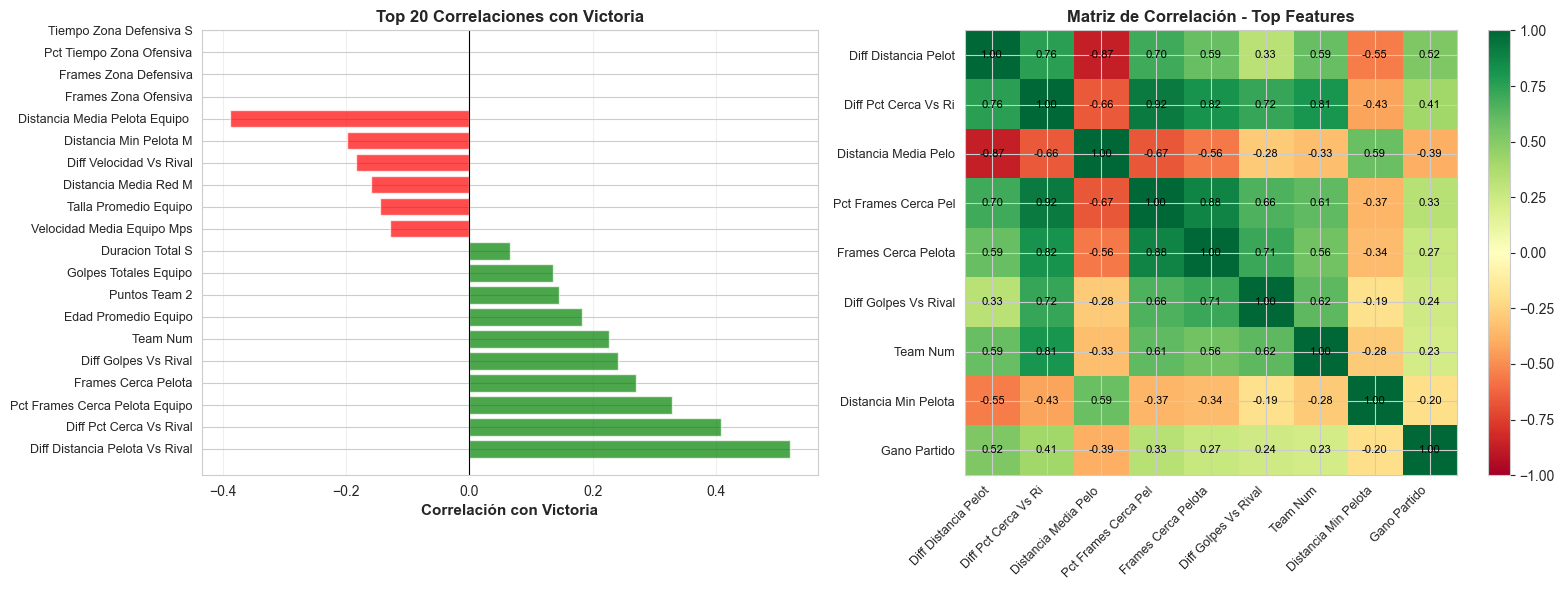

In [186]:
# 3. Análisis de correlación con victoria
print("="*80)
print("CORRELACIÓN DE MÉTRICAS CON VICTORIA")
print("="*80)

# Seleccionar solo columnas numéricas
cols_numericas_equipos = df_equipos.select_dtypes(include=[np.number]).columns.tolist()
cols_numericas_equipos.remove('gano_partido')
cols_numericas_equipos.remove('partido_num')

# Calcular correlaciones
correlaciones_victoria_equipos = df_equipos[cols_numericas_equipos + ['gano_partido']].corr()['gano_partido'].drop('gano_partido').sort_values(ascending=False)

print("\n📊 TOP 10 Correlaciones Positivas (favorecen victoria):")
print(correlaciones_victoria_equipos.head(10).to_string())

print("\n📊 TOP 10 Correlaciones Negativas (desfavorecen victoria):")
print(correlaciones_victoria_equipos.tail(10).to_string())

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top correlaciones
top_corr = pd.concat([correlaciones_victoria_equipos.head(10), correlaciones_victoria_equipos.tail(10)])
colors = ['green' if x > 0 else 'red' for x in top_corr.values]
axes[0].barh(range(len(top_corr)), top_corr.values, color=colors, alpha=0.7)
axes[0].set_yticks(range(len(top_corr)))
axes[0].set_yticklabels([label.replace('_', ' ').title()[:30] for label in top_corr.index], fontsize=9)
axes[0].set_xlabel('Correlación con Victoria', fontsize=11, fontweight='bold')
axes[0].set_title('Top 20 Correlaciones con Victoria', fontsize=12, fontweight='bold')
axes[0].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
axes[0].grid(axis='x', alpha=0.3)

# Matriz de correlación de top features
top_features = correlaciones_victoria_equipos.abs().nlargest(8).index.tolist() + ['gano_partido']
corr_matrix_top = df_equipos[top_features].corr()
im = axes[1].imshow(corr_matrix_top, cmap='RdYlGn', aspect='auto', vmin=-1, vmax=1)
axes[1].set_xticks(range(len(top_features)))
axes[1].set_yticks(range(len(top_features)))
axes[1].set_xticklabels([f.replace('_', ' ').title()[:20] for f in top_features], rotation=45, ha='right', fontsize=9)
axes[1].set_yticklabels([f.replace('_', ' ').title()[:20] for f in top_features], fontsize=9)
axes[1].set_title('Matriz de Correlación - Top Features', fontsize=12, fontweight='bold')

# Añadir valores en la matriz
for i in range(len(top_features)):
    for j in range(len(top_features)):
        text = axes[1].text(j, i, f'{corr_matrix_top.iloc[i, j]:.2f}',
                          ha="center", va="center", color="black", fontsize=8)

plt.colorbar(im, ax=axes[1])
plt.tight_layout()
plt.show()

DISTRIBUCIONES: GANADORES VS PERDEDORES


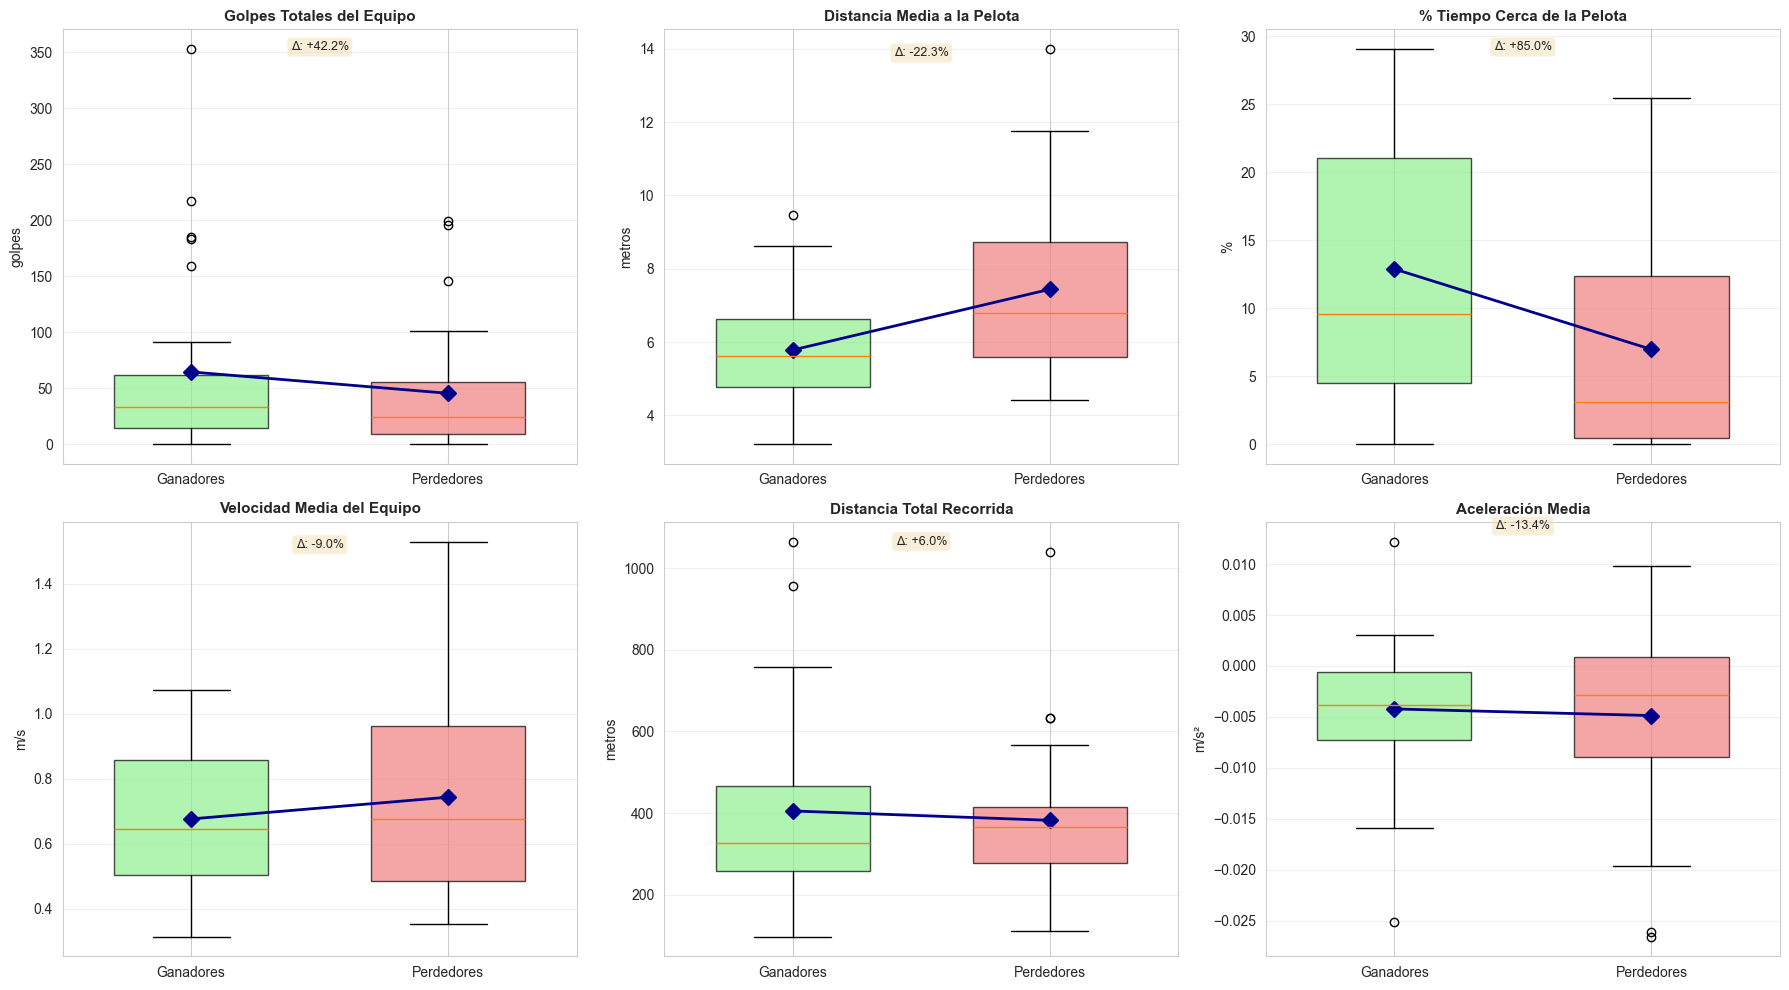


📊 Resumen de diferencias:
📈 Golpes Totales del Equipo: Ganadores 64.44 vs Perdedores 45.33 (Δ +42.2%)
📉 Distancia Media a la Pelota: Ganadores 5.78 vs Perdedores 7.44 (Δ -22.3%)
📈 % Tiempo Cerca de la Pelota: Ganadores 12.88 vs Perdedores 6.96 (Δ +85.0%)
📉 Velocidad Media del Equipo: Ganadores 0.68 vs Perdedores 0.74 (Δ -9.0%)
📈 Distancia Total Recorrida: Ganadores 405.41 vs Perdedores 382.45 (Δ +6.0%)
📉 Aceleración Media: Ganadores -0.00 vs Perdedores -0.00 (Δ -13.4%)


In [187]:
# 4. Distribuciones de métricas clave por resultado
print("="*80)
print("DISTRIBUCIONES: GANADORES VS PERDEDORES")
print("="*80)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

metricas_viz = [
    ('golpes_totales_equipo', 'Golpes Totales del Equipo', 'golpes'),
    ('distancia_media_pelota_equipo_m', 'Distancia Media a la Pelota', 'metros'),
    ('pct_frames_cerca_pelota_equipo', '% Tiempo Cerca de la Pelota', '%'),
    ('velocidad_media_equipo_mps', 'Velocidad Media del Equipo', 'm/s'),
    ('distancia_total_equipo_m', 'Distancia Total Recorrida', 'metros'),
    ('aceleracion_media_mps2', 'Aceleración Media', 'm/s²')
]

for idx, (col, titulo, unidad) in enumerate(metricas_viz):
    ax = axes[idx]
    
    # Datos separados
    ganadores_data = df_equipos[df_equipos['gano_partido'] == 1][col]
    perdedores_data = df_equipos[df_equipos['gano_partido'] == 0][col]
    
    # Boxplot comparativo
    bp = ax.boxplot([ganadores_data, perdedores_data], 
                     labels=['Ganadores', 'Perdedores'],
                     patch_artist=True,
                     widths=0.6)
    
    # Colores
    bp['boxes'][0].set_facecolor('lightgreen')
    bp['boxes'][0].set_alpha(0.7)
    bp['boxes'][1].set_facecolor('lightcoral')
    bp['boxes'][1].set_alpha(0.7)
    
    ax.set_title(titulo, fontsize=11, fontweight='bold')
    ax.set_ylabel(f'{unidad}', fontsize=10)
    ax.grid(axis='y', alpha=0.3)
    
    # Añadir medias
    mean_g = ganadores_data.mean()
    mean_p = perdedores_data.mean()
    ax.plot([1, 2], [mean_g, mean_p], 'D-', color='darkblue', markersize=8, linewidth=2, label='Media')
    
    # Texto con diferencia
    diff_pct = ((mean_g - mean_p) / mean_p * 100) if mean_p != 0 else 0
    ax.text(1.5, ax.get_ylim()[1] * 0.95, f'Δ: {diff_pct:+.1f}%', 
            ha='center', fontsize=9, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\n📊 Resumen de diferencias:")
for col, titulo, _ in metricas_viz:
    mean_g = df_equipos[df_equipos['gano_partido'] == 1][col].mean()
    mean_p = df_equipos[df_equipos['gano_partido'] == 0][col].mean()
    diff_pct = ((mean_g - mean_p) / mean_p * 100) if mean_p != 0 else 0
    simbolo = "📈" if diff_pct > 0 else "📉"
    print(f"{simbolo} {titulo}: Ganadores {mean_g:.2f} vs Perdedores {mean_p:.2f} (Δ {diff_pct:+.1f}%)")

ANÁLISIS DE FEATURES DIFERENCIALES VS RIVAL

📊 Registros con features diferenciales completas: 44


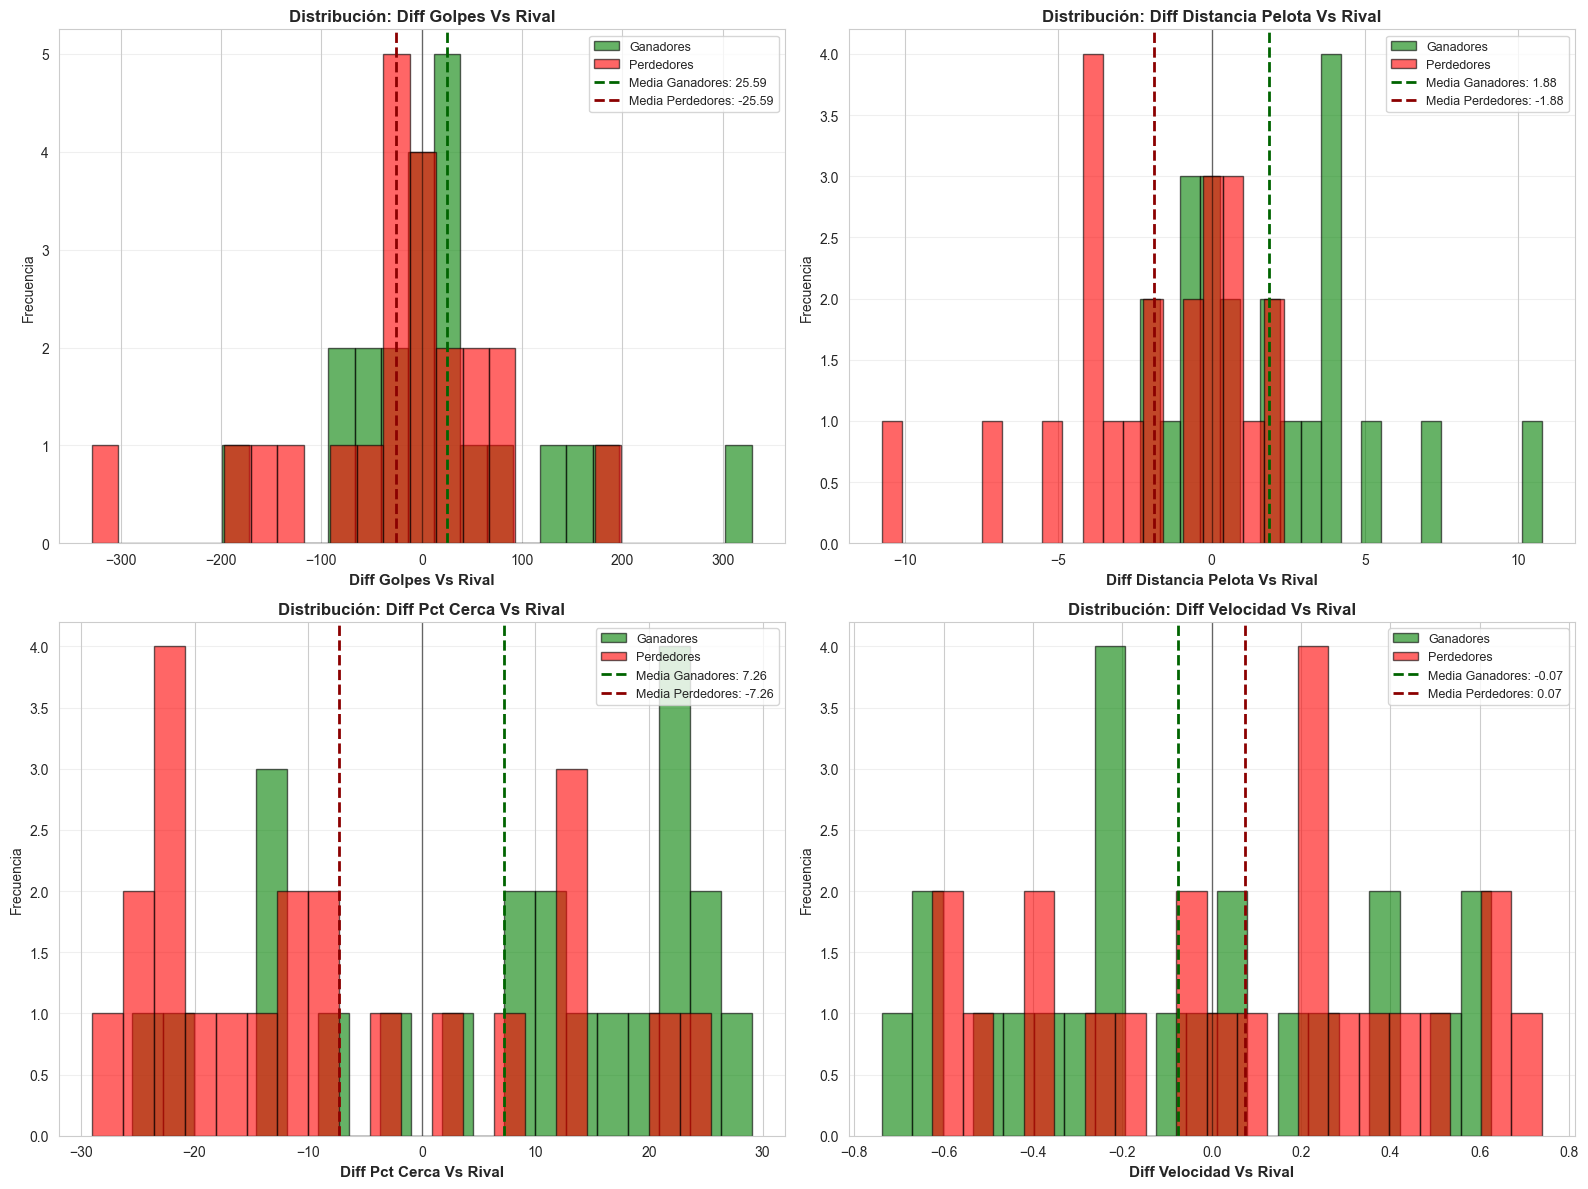


📊 Estadísticas de Features Diferenciales:

🎯 DIFF GOLPES VS RIVAL:
   Ganadores (media): +25.591
   Perdedores (media): -25.591
   Correlación con victoria: 0.241

🎯 DIFF DISTANCIA PELOTA VS RIVAL:
   Ganadores (media): +1.880
   Perdedores (media): -1.880
   Correlación con victoria: 0.519

🎯 DIFF PCT CERCA VS RIVAL:
   Ganadores (media): +7.258
   Perdedores (media): -7.258
   Correlación con victoria: 0.408

🎯 DIFF VELOCIDAD VS RIVAL:
   Ganadores (media): -0.074
   Perdedores (media): +0.074
   Correlación con victoria: -0.184


In [188]:
# 5. Análisis de features diferenciales (vs rival)
print("="*80)
print("ANÁLISIS DE FEATURES DIFERENCIALES VS RIVAL")
print("="*80)

features_diff = [
    'diff_golpes_vs_rival',
    'diff_distancia_pelota_vs_rival',
    'diff_pct_cerca_vs_rival',
    'diff_velocidad_vs_rival'
]

# Remover NaNs para análisis
df_equipos_clean = df_equipos.dropna(subset=features_diff)

print(f"\n📊 Registros con features diferenciales completas: {len(df_equipos_clean)}")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, col in enumerate(features_diff):
    ax = axes[idx]
    
    # Separar por resultado
    ganadores_diff = df_equipos_clean[df_equipos_clean['gano_partido'] == 1][col]
    perdedores_diff = df_equipos_clean[df_equipos_clean['gano_partido'] == 0][col]
    
    # Histogramas superpuestos
    ax.hist(ganadores_diff, bins=20, alpha=0.6, color='green', label='Ganadores', edgecolor='black')
    ax.hist(perdedores_diff, bins=20, alpha=0.6, color='red', label='Perdedores', edgecolor='black')
    
    # Líneas verticales para las medias
    ax.axvline(ganadores_diff.mean(), color='darkgreen', linestyle='--', linewidth=2, label=f'Media Ganadores: {ganadores_diff.mean():.2f}')
    ax.axvline(perdedores_diff.mean(), color='darkred', linestyle='--', linewidth=2, label=f'Media Perdedores: {perdedores_diff.mean():.2f}')
    ax.axvline(0, color='black', linestyle='-', linewidth=1, alpha=0.5)
    
    ax.set_xlabel(col.replace('_', ' ').title(), fontsize=11, fontweight='bold')
    ax.set_ylabel('Frecuencia', fontsize=10)
    ax.set_title(f'Distribución: {col.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    ax.legend(loc='best', fontsize=9)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Estadísticas de Features Diferenciales:")
for col in features_diff:
    ganadores_mean = df_equipos_clean[df_equipos_clean['gano_partido'] == 1][col].mean()
    perdedores_mean = df_equipos_clean[df_equipos_clean['gano_partido'] == 0][col].mean()
    
    print(f"\n🎯 {col.replace('_', ' ').upper()}:")
    print(f"   Ganadores (media): {ganadores_mean:+.3f}")
    print(f"   Perdedores (media): {perdedores_mean:+.3f}")
    print(f"   Correlación con victoria: {df_equipos_clean[[col, 'gano_partido']].corr().iloc[0, 1]:.3f}")

RELACIONES ENTRE MÉTRICAS CLAVE


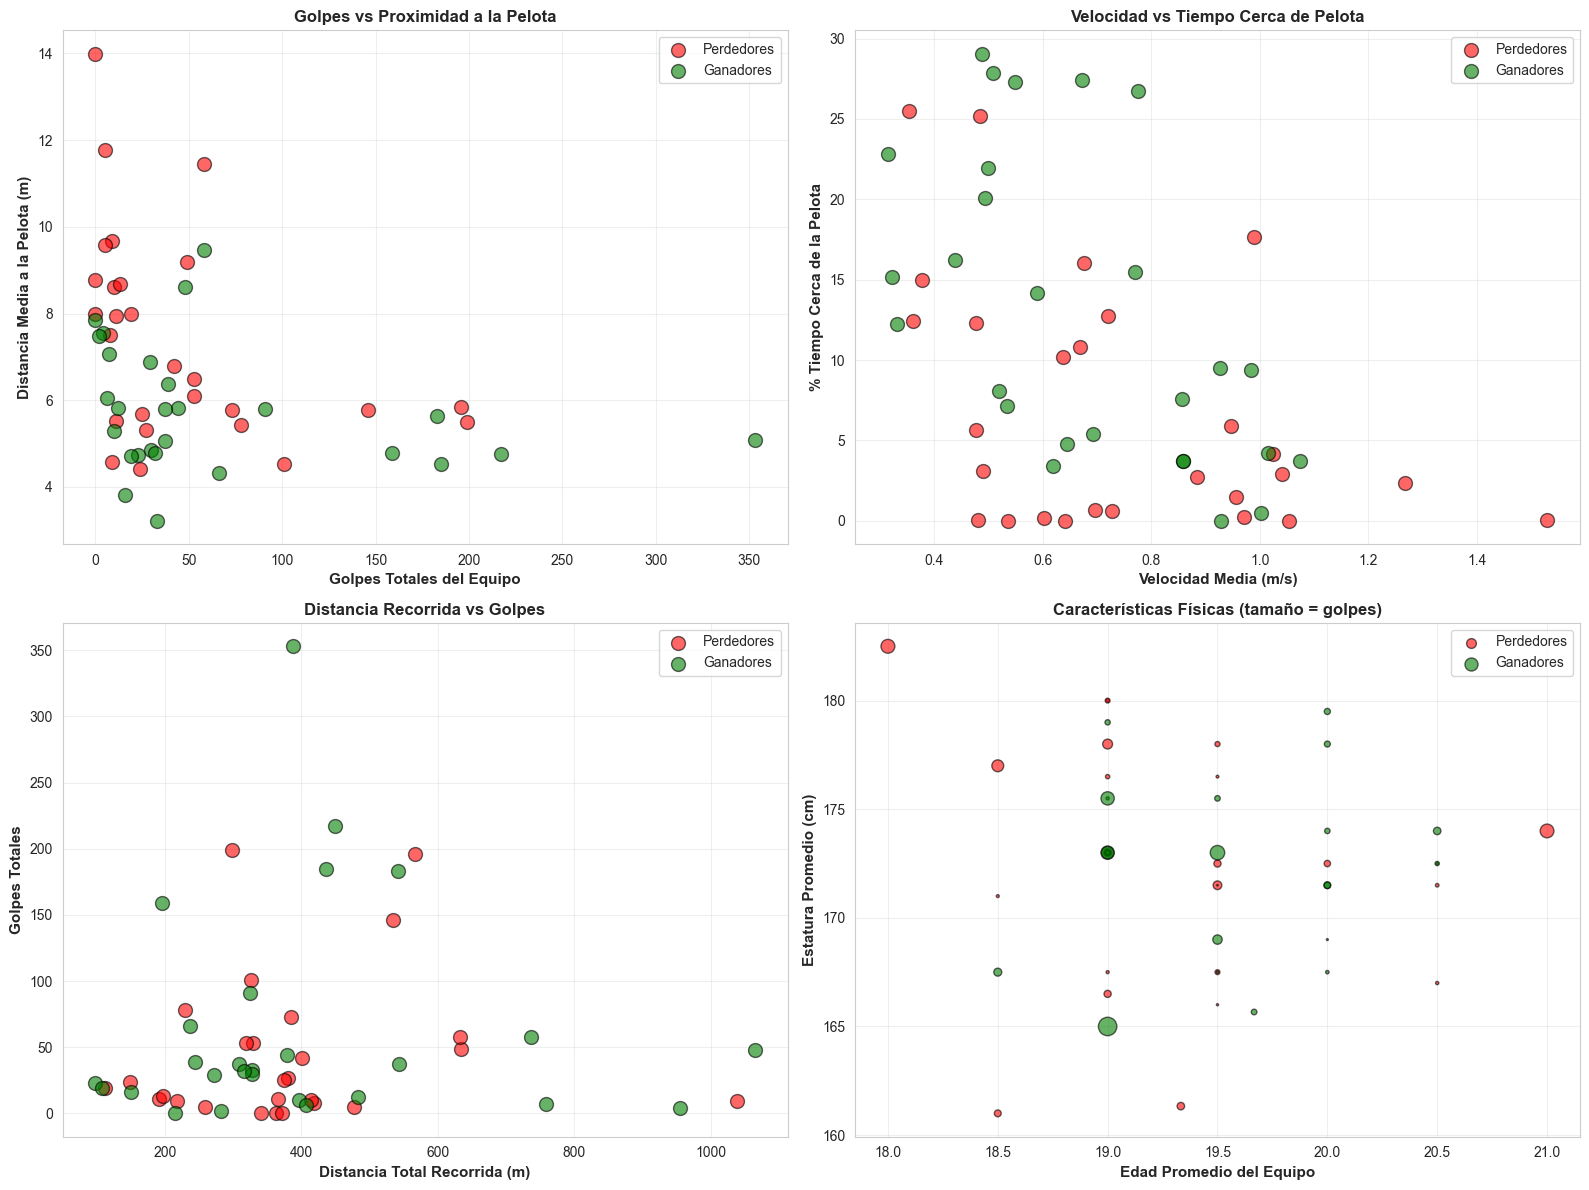


📊 Correlaciones entre métricas clave:


,golpes_totales_equipo,distancia_media_pelota_equipo_m,pct_frames_cerca_pelota_equipo,velocidad_media_equipo_mps,distancia_total_equipo_m
golpes_totales_equipo,1.000,-0.332,0.564,-0.183,0.055
distancia_media_pelota_equipo_m,-0.332,1.000,-0.669,0.173,0.389
pct_frames_cerca_pelota_equipo,0.564,-0.669,1.000,-0.499,-0.322
velocidad_media_equipo_mps,-0.183,0.173,-0.499,1.000,0.476
distancia_total_equipo_m,0.055,0.389,-0.322,0.476,1.000


In [189]:
# 6. Análisis de relaciones clave
print("="*80)
print("RELACIONES ENTRE MÉTRICAS CLAVE")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Subplot 1: Golpes vs Distancia a la pelota
ax = axes[0, 0]
ganadores = df_equipos[df_equipos['gano_partido'] == 1]
perdedores = df_equipos[df_equipos['gano_partido'] == 0]

ax.scatter(perdedores['golpes_totales_equipo'], perdedores['distancia_media_pelota_equipo_m'], 
          alpha=0.6, s=100, c='red', edgecolors='black', label='Perdedores')
ax.scatter(ganadores['golpes_totales_equipo'], ganadores['distancia_media_pelota_equipo_m'], 
          alpha=0.6, s=100, c='green', edgecolors='black', label='Ganadores')
ax.set_xlabel('Golpes Totales del Equipo', fontsize=11, fontweight='bold')
ax.set_ylabel('Distancia Media a la Pelota (m)', fontsize=11, fontweight='bold')
ax.set_title('Golpes vs Proximidad a la Pelota', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)

# Subplot 2: Velocidad vs % Tiempo cerca de la pelota
ax = axes[0, 1]
ax.scatter(perdedores['velocidad_media_equipo_mps'], perdedores['pct_frames_cerca_pelota_equipo'], 
          alpha=0.6, s=100, c='red', edgecolors='black', label='Perdedores')
ax.scatter(ganadores['velocidad_media_equipo_mps'], ganadores['pct_frames_cerca_pelota_equipo'], 
          alpha=0.6, s=100, c='green', edgecolors='black', label='Ganadores')
ax.set_xlabel('Velocidad Media (m/s)', fontsize=11, fontweight='bold')
ax.set_ylabel('% Tiempo Cerca de la Pelota', fontsize=11, fontweight='bold')
ax.set_title('Velocidad vs Tiempo Cerca de Pelota', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)

# Subplot 3: Distancia total vs Golpes
ax = axes[1, 0]
ax.scatter(perdedores['distancia_total_equipo_m'], perdedores['golpes_totales_equipo'], 
          alpha=0.6, s=100, c='red', edgecolors='black', label='Perdedores')
ax.scatter(ganadores['distancia_total_equipo_m'], ganadores['golpes_totales_equipo'], 
          alpha=0.6, s=100, c='green', edgecolors='black', label='Ganadores')
ax.set_xlabel('Distancia Total Recorrida (m)', fontsize=11, fontweight='bold')
ax.set_ylabel('Golpes Totales', fontsize=11, fontweight='bold')
ax.set_title('Distancia Recorrida vs Golpes', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)

# Subplot 4: Features físicas vs Rendimiento
ax = axes[1, 1]
# Usar edad promedio como proxy de experiencia
sizes = df_equipos['golpes_totales_equipo'] / 2  # Escalar para visualización
ax.scatter(perdedores['edad_promedio_equipo'], perdedores['estatura_promedio_equipo'], 
          alpha=0.6, s=sizes[perdedores.index], c='red', edgecolors='black', label='Perdedores')
ax.scatter(ganadores['edad_promedio_equipo'], ganadores['estatura_promedio_equipo'], 
          alpha=0.6, s=sizes[ganadores.index], c='green', edgecolors='black', label='Ganadores')
ax.set_xlabel('Edad Promedio del Equipo', fontsize=11, fontweight='bold')
ax.set_ylabel('Estatura Promedio (cm)', fontsize=11, fontweight='bold')
ax.set_title('Características Físicas (tamaño = golpes)', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Correlaciones entre métricas clave:")
metricas_rel = ['golpes_totales_equipo', 'distancia_media_pelota_equipo_m', 
                'pct_frames_cerca_pelota_equipo', 'velocidad_media_equipo_mps',
                'distancia_total_equipo_m']
corr_rel = df_equipos[metricas_rel].corr()
display(corr_rel.round(3))

---
---
# 🤖 MODELOS PREDICTIVOS - DATASET DE EQUIPOS

Entrenamiento de modelos para predecir victoria de equipos

In [190]:
# Imports para modelos de equipos
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

print("✅ Librerías importadas para modelado de equipos")

✅ Librerías importadas para modelado de equipos


In [191]:

# Preparacion de datos para modelado de equipos
print("="*80)
print("PREPARACION DE DATOS - MODELOS DE EQUIPOS")
print("="*80)

# Seleccionar features consistentes entre entrenamiento y simulacion
features_base_equipo = [
    'velocidad_media_equipo_mps',
    'distancia_total_equipo_m',
    'distancia_media_por_frame_m',
    'distancia_media_pelota_equipo_m',
    'golpes_totales_equipo',
    'aceleracion_media_mps2',
    'pct_frames_cerca_pelota_equipo',
    'pct_tiempo_zona_ofensiva',
    'frames_cerca_pelota',
    'frames_zona_ofensiva',
    'frames_zona_defensiva',
    'edad_promedio_equipo',
    'estatura_promedio_equipo',
    'talla_promedio_equipo'
]

features_diff_equipo = [
    'diff_golpes_vs_rival',
    'diff_distancia_pelota_vs_rival',
    'diff_pct_cerca_vs_rival',
    'diff_velocidad_vs_rival'
]

features_equipos = [f for f in features_base_equipo + features_diff_equipo if f in df_equipos.columns]
missing_features = list(set(features_base_equipo + features_diff_equipo) - set(features_equipos))
print(f"Features seleccionadas: {len(features_equipos)}")
print(f"   {features_equipos}")

if missing_features:
    print(f"Advertencia: faltan en df_equipos {missing_features}")

# Separar features y target
X_equipos = df_equipos[features_equipos].copy()
y_equipos = df_equipos['gano_partido'].copy()

# Guardar medias de entrenamiento para reutilizar en simulacion
feature_promedios_eq = X_equipos.mean()

# Manejar valores nulos en features diferenciales (imputar con 0)
print(f"? Valores nulos antes de imputar:")
print(X_equipos.isnull().sum()[X_equipos.isnull().sum() > 0])

X_equipos = X_equipos.fillna(0)

print(f"? Valores nulos despues de imputar: {X_equipos.isnull().sum().sum()}")      

# Train/test split estratificado
X_train_eq, X_test_eq, y_train_eq, y_test_eq = train_test_split(
    X_equipos, y_equipos, test_size=0.25, random_state=42, stratify=y_equipos
)

print(f"? Division del dataset:")
print(f"   Train: {len(X_train_eq)} registros ({len(X_train_eq)/len(X_equipos):.1%})")
print(f"   Test:  {len(X_test_eq)} registros ({len(X_test_eq)/len(X_equipos):.1%})")
print(f"   Distribucion Train - Ganadores: {y_train_eq.sum()} ({y_train_eq.mean():.1%})")
print(f"   Distribucion Test  - Ganadores: {y_test_eq.sum()} ({y_test_eq.mean():.1%})")

# Escalar features
scaler_eq = StandardScaler()
X_train_eq_scaled = scaler_eq.fit_transform(X_train_eq)
X_test_eq_scaled = scaler_eq.transform(X_test_eq)

print(f"? Datos escalados y listos para entrenamiento")

PREPARACION DE DATOS - MODELOS DE EQUIPOS
Features seleccionadas: 18
   ['velocidad_media_equipo_mps', 'distancia_total_equipo_m', 'distancia_media_por_frame_m', 'distancia_media_pelota_equipo_m', 'golpes_totales_equipo', 'aceleracion_media_mps2', 'pct_frames_cerca_pelota_equipo', 'pct_tiempo_zona_ofensiva', 'frames_cerca_pelota', 'frames_zona_ofensiva', 'frames_zona_defensiva', 'edad_promedio_equipo', 'estatura_promedio_equipo', 'talla_promedio_equipo', 'diff_golpes_vs_rival', 'diff_distancia_pelota_vs_rival', 'diff_pct_cerca_vs_rival', 'diff_velocidad_vs_rival']
? Valores nulos antes de imputar:
diff_golpes_vs_rival              10
diff_distancia_pelota_vs_rival    10
diff_pct_cerca_vs_rival           10
diff_velocidad_vs_rival           10
dtype: int64
? Valores nulos despues de imputar: 0
? Division del dataset:
   Train: 40 registros (74.1%)
   Test:  14 registros (25.9%)
   Distribucion Train - Ganadores: 20 (50.0%)
   Distribucion Test  - Ganadores: 7 (50.0%)
? Datos escalados y

In [192]:
# 1. Regresión Logística
print("="*80)
print("MODELO 1: REGRESIÓN LOGÍSTICA (BASELINE)")
print("="*80)

lr_model_eq = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr_model_eq.fit(X_train_eq_scaled, y_train_eq)

# Predicciones
y_pred_lr_eq = lr_model_eq.predict(X_test_eq_scaled)
y_pred_proba_lr_eq = lr_model_eq.predict_proba(X_test_eq_scaled)[:, 1]

# Métricas
acc_lr_eq = accuracy_score(y_test_eq, y_pred_lr_eq)
precision_lr_eq = precision_score(y_test_eq, y_pred_lr_eq)
recall_lr_eq = recall_score(y_test_eq, y_pred_lr_eq)
f1_lr_eq = f1_score(y_test_eq, y_pred_lr_eq)
roc_auc_lr_eq = roc_auc_score(y_test_eq, y_pred_proba_lr_eq)

print(f"\n📊 Métricas en Test Set:")
print(f"   Accuracy:  {acc_lr_eq:.3f}")
print(f"   Precision: {precision_lr_eq:.3f}")
print(f"   Recall:    {recall_lr_eq:.3f}")
print(f"   F1-Score:  {f1_lr_eq:.3f}")
print(f"   ROC-AUC:   {roc_auc_lr_eq:.3f}")

# Cross-validation
cv_scores_lr_eq = cross_val_score(lr_model_eq, X_train_eq_scaled, y_train_eq, 
                                   cv=5, scoring='roc_auc')
print(f"\n📊 Cross-Validation (5-fold):")
print(f"   ROC-AUC medio: {cv_scores_lr_eq.mean():.3f} (+/- {cv_scores_lr_eq.std():.3f})")

# Top features
feature_importance_lr_eq = pd.DataFrame({
    'feature': features_equipos,
    'coefficient': np.abs(lr_model_eq.coef_[0])
}).sort_values('coefficient', ascending=False)

print(f"\n🔝 Top 10 Features más importantes:")
print(feature_importance_lr_eq.head(10).to_string(index=False))

MODELO 1: REGRESIÓN LOGÍSTICA (BASELINE)

📊 Métricas en Test Set:
   Accuracy:  0.429
   Precision: 0.444
   Recall:    0.571
   F1-Score:  0.500
   ROC-AUC:   0.612

📊 Cross-Validation (5-fold):
   ROC-AUC medio: 0.637 (+/- 0.083)

🔝 Top 10 Features más importantes:
                        feature  coefficient
 diff_distancia_pelota_vs_rival     1.092608
           edad_promedio_equipo     0.929198
        diff_velocidad_vs_rival     0.674251
distancia_media_pelota_equipo_m     0.652025
       estatura_promedio_equipo     0.647214
         aceleracion_media_mps2     0.552736
          talla_promedio_equipo     0.455668
           diff_golpes_vs_rival     0.356552
        diff_pct_cerca_vs_rival     0.349492
    distancia_media_por_frame_m     0.333509


In [193]:
# 2. XGBoost
print("="*80)
print("MODELO 2: XGBOOST")
print("="*80)

xgb_model_eq = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss'
)
xgb_model_eq.fit(X_train_eq, y_train_eq)

# Predicciones
y_pred_xgb_eq = xgb_model_eq.predict(X_test_eq)
y_pred_proba_xgb_eq = xgb_model_eq.predict_proba(X_test_eq)[:, 1]

# Métricas
acc_xgb_eq = accuracy_score(y_test_eq, y_pred_xgb_eq)
precision_xgb_eq = precision_score(y_test_eq, y_pred_xgb_eq)
recall_xgb_eq = recall_score(y_test_eq, y_pred_xgb_eq)
f1_xgb_eq = f1_score(y_test_eq, y_pred_xgb_eq)
roc_auc_xgb_eq = roc_auc_score(y_test_eq, y_pred_proba_xgb_eq)

print(f"\n📊 Métricas en Test Set:")
print(f"   Accuracy:  {acc_xgb_eq:.3f}")
print(f"   Precision: {precision_xgb_eq:.3f}")
print(f"   Recall:    {recall_xgb_eq:.3f}")
print(f"   F1-Score:  {f1_xgb_eq:.3f}")
print(f"   ROC-AUC:   {roc_auc_xgb_eq:.3f}")

# Cross-validation
cv_scores_xgb_eq = cross_val_score(xgb_model_eq, X_train_eq, y_train_eq, 
                                    cv=5, scoring='roc_auc')
print(f"\n📊 Cross-Validation (5-fold):")
print(f"   ROC-AUC medio: {cv_scores_xgb_eq.mean():.3f} (+/- {cv_scores_xgb_eq.std():.3f})")

# Feature importance
feature_importance_xgb_eq = pd.DataFrame({
    'feature': features_equipos,
    'importance': xgb_model_eq.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n🔝 Top 10 Features más importantes:")
print(feature_importance_xgb_eq.head(10).to_string(index=False))

MODELO 2: XGBOOST

📊 Métricas en Test Set:
   Accuracy:  0.571
   Precision: 0.571
   Recall:    0.571
   F1-Score:  0.571
   ROC-AUC:   0.612

📊 Cross-Validation (5-fold):
   ROC-AUC medio: 0.463 (+/- 0.219)

🔝 Top 10 Features más importantes:
                        feature  importance
 pct_frames_cerca_pelota_equipo    0.140710
           edad_promedio_equipo    0.132887
          talla_promedio_equipo    0.129657
distancia_media_pelota_equipo_m    0.093016
 diff_distancia_pelota_vs_rival    0.092226
         aceleracion_media_mps2    0.077629
          golpes_totales_equipo    0.057506
        diff_pct_cerca_vs_rival    0.055734
       distancia_total_equipo_m    0.042707
            frames_cerca_pelota    0.036797


In [194]:
# 3. LightGBM
print("="*80)
print("MODELO 3: LIGHTGBM")
print("="*80)

lgb_model_eq = LGBMClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42,
    verbose=-1
)
lgb_model_eq.fit(X_train_eq, y_train_eq)

# Predicciones
y_pred_lgb_eq = lgb_model_eq.predict(X_test_eq)
y_pred_proba_lgb_eq = lgb_model_eq.predict_proba(X_test_eq)[:, 1]

# Métricas
acc_lgb_eq = accuracy_score(y_test_eq, y_pred_lgb_eq)
precision_lgb_eq = precision_score(y_test_eq, y_pred_lgb_eq)
recall_lgb_eq = recall_score(y_test_eq, y_pred_lgb_eq)
f1_lgb_eq = f1_score(y_test_eq, y_pred_lgb_eq)
roc_auc_lgb_eq = roc_auc_score(y_test_eq, y_pred_proba_lgb_eq)

print(f"\n📊 Métricas en Test Set:")
print(f"   Accuracy:  {acc_lgb_eq:.3f}")
print(f"   Precision: {precision_lgb_eq:.3f}")
print(f"   Recall:    {recall_lgb_eq:.3f}")
print(f"   F1-Score:  {f1_lgb_eq:.3f}")
print(f"   ROC-AUC:   {roc_auc_lgb_eq:.3f}")

# Cross-validation
cv_scores_lgb_eq = cross_val_score(lgb_model_eq, X_train_eq, y_train_eq, 
                                    cv=5, scoring='roc_auc')
print(f"\n📊 Cross-Validation (5-fold):")
print(f"   ROC-AUC medio: {cv_scores_lgb_eq.mean():.3f} (+/- {cv_scores_lgb_eq.std():.3f})")

# Feature importance
feature_importance_lgb_eq = pd.DataFrame({
    'feature': features_equipos,
    'importance': lgb_model_eq.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n🔝 Top 10 Features más importantes:")
print(feature_importance_lgb_eq.head(10).to_string(index=False))

MODELO 3: LIGHTGBM

📊 Métricas en Test Set:
   Accuracy:  0.571
   Precision: 0.556
   Recall:    0.714
   F1-Score:  0.625
   ROC-AUC:   0.571

📊 Cross-Validation (5-fold):
   ROC-AUC medio: 0.500 (+/- 0.000)

🔝 Top 10 Features más importantes:
                       feature  importance
         golpes_totales_equipo         100
    velocidad_media_equipo_mps           0
         frames_zona_defensiva           0
       diff_pct_cerca_vs_rival           0
diff_distancia_pelota_vs_rival           0
          diff_golpes_vs_rival           0
         talla_promedio_equipo           0
      estatura_promedio_equipo           0
          edad_promedio_equipo           0
          frames_zona_ofensiva           0


In [195]:
# Comparación de modelos de equipos
print("="*80)
print("COMPARACIÓN FINAL DE MODELOS - EQUIPOS")
print("="*80)

# Tabla comparativa
resultados_equipos = pd.DataFrame({
    'Modelo': ['Logistic Regression', 'XGBoost', 'LightGBM'],
    'Accuracy': [acc_lr_eq, acc_xgb_eq, acc_lgb_eq],
    'Precision': [precision_lr_eq, precision_xgb_eq, precision_lgb_eq],
    'Recall': [recall_lr_eq, recall_xgb_eq, recall_lgb_eq],
    'F1-Score': [f1_lr_eq, f1_xgb_eq, f1_lgb_eq],
    'ROC-AUC': [roc_auc_lr_eq, roc_auc_xgb_eq, roc_auc_lgb_eq],
    'CV ROC-AUC': [cv_scores_lr_eq.mean(), cv_scores_xgb_eq.mean(), cv_scores_lgb_eq.mean()],
    'CV Std': [cv_scores_lr_eq.std(), cv_scores_xgb_eq.std(), cv_scores_lgb_eq.std()]
})

print("\n📊 TABLA DE RESULTADOS:")
display(resultados_equipos.round(3))

# Mejor modelo
mejor_modelo_idx = resultados_equipos['ROC-AUC'].idxmax()
mejor_modelo_nombre = resultados_equipos.loc[mejor_modelo_idx, 'Modelo']
mejor_roc_auc = resultados_equipos.loc[mejor_modelo_idx, 'ROC-AUC']

print(f"\n🏆 MEJOR MODELO: {mejor_modelo_nombre}")
print(f"   ROC-AUC Test: {mejor_roc_auc:.3f}")
print(f"   ROC-AUC CV:   {resultados_equipos.loc[mejor_modelo_idx, 'CV ROC-AUC']:.3f}")

# Análisis de rendimiento
print(f"\n📊 ANÁLISIS:")
print(f"   Dataset pequeño (n={len(X_equipos)}) - Train: {len(X_train_eq)}, Test: {len(X_test_eq)}")
print(f"   Logistic Regression es el más estable (CV std: {cv_scores_lr_eq.std():.3f})")
print(f"   Modelos de boosting sobreajustan con pocos datos")

COMPARACIÓN FINAL DE MODELOS - EQUIPOS

📊 TABLA DE RESULTADOS:


,Modelo,Accuracy,Precision,Recall,F1-Score,ROC-AUC,CV ROC-AUC,CV Std
0,Logistic Regression,0.429,0.444,0.571,0.500,0.612,0.638,0.083
1,XGBoost,0.571,0.571,0.571,0.571,0.612,0.462,0.219
2,LightGBM,0.571,0.556,0.714,0.625,0.571,0.500,0.000



🏆 MEJOR MODELO: Logistic Regression
   ROC-AUC Test: 0.612
   ROC-AUC CV:   0.637

📊 ANÁLISIS:
   Dataset pequeño (n=54) - Train: 40, Test: 14
   Logistic Regression es el más estable (CV std: 0.083)
   Modelos de boosting sobreajustan con pocos datos


VISUALIZACIONES COMPARATIVAS


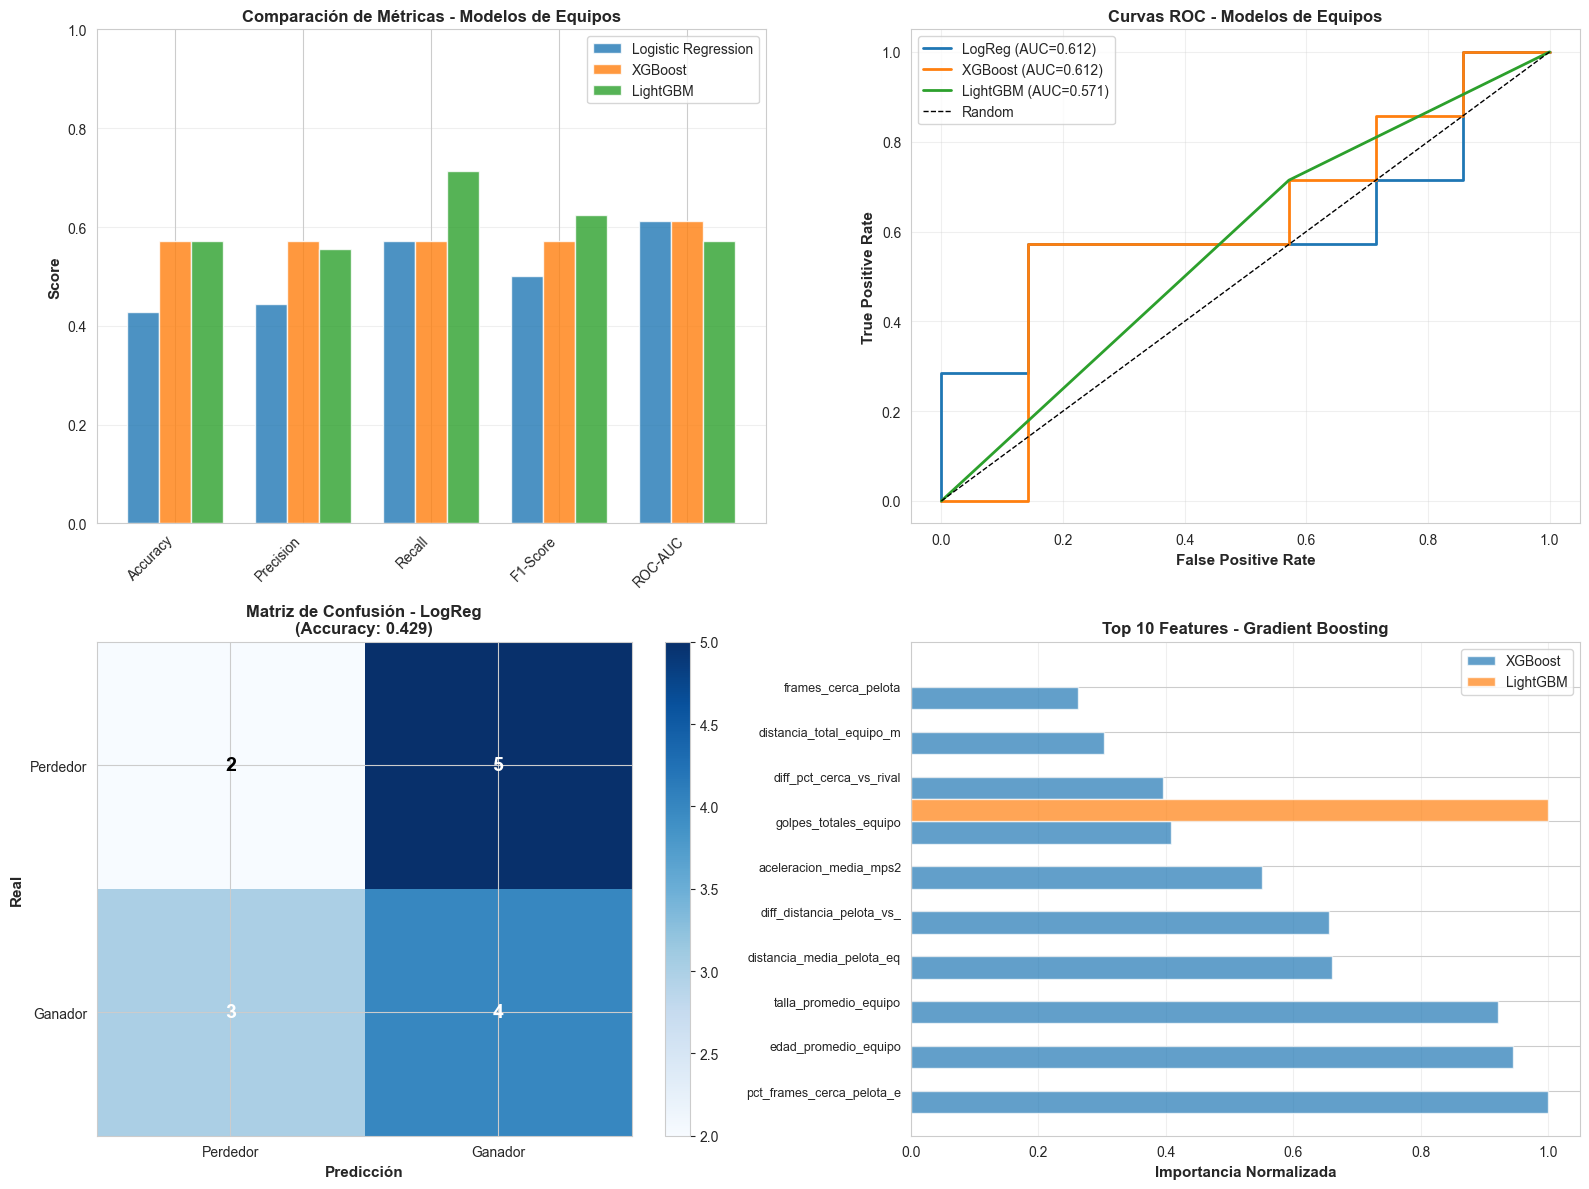


✅ Visualizaciones generadas


In [196]:
# Visualizaciones comparativas - Modelos de equipos
print("="*80)
print("VISUALIZACIONES COMPARATIVAS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Comparación de métricas
ax = axes[0, 0]
metricas_comp = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x_pos = np.arange(len(metricas_comp))
width = 0.25

for i, modelo in enumerate(['Logistic Regression', 'XGBoost', 'LightGBM']):
    valores = resultados_equipos[resultados_equipos['Modelo'] == modelo][metricas_comp].values[0]
    ax.bar(x_pos + i*width, valores, width, label=modelo, alpha=0.8)

ax.set_xticks(x_pos + width)
ax.set_xticklabels(metricas_comp, rotation=45, ha='right')
ax.set_ylabel('Score', fontsize=11, fontweight='bold')
ax.set_title('Comparación de Métricas - Modelos de Equipos', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1])

# 2. ROC Curves
ax = axes[0, 1]
fpr_lr_eq, tpr_lr_eq, _ = roc_curve(y_test_eq, y_pred_proba_lr_eq)
fpr_xgb_eq, tpr_xgb_eq, _ = roc_curve(y_test_eq, y_pred_proba_xgb_eq)
fpr_lgb_eq, tpr_lgb_eq, _ = roc_curve(y_test_eq, y_pred_proba_lgb_eq)

ax.plot(fpr_lr_eq, tpr_lr_eq, label=f'LogReg (AUC={roc_auc_lr_eq:.3f})', linewidth=2)
ax.plot(fpr_xgb_eq, tpr_xgb_eq, label=f'XGBoost (AUC={roc_auc_xgb_eq:.3f})', linewidth=2)
ax.plot(fpr_lgb_eq, tpr_lgb_eq, label=f'LightGBM (AUC={roc_auc_lgb_eq:.3f})', linewidth=2)
ax.plot([0, 1], [0, 1], 'k--', label='Random', linewidth=1)
ax.set_xlabel('False Positive Rate', fontsize=11, fontweight='bold')
ax.set_ylabel('True Positive Rate', fontsize=11, fontweight='bold')
ax.set_title('Curvas ROC - Modelos de Equipos', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)

# 3. Confusion Matrices
ax = axes[1, 0]
cm_lr_eq = confusion_matrix(y_test_eq, y_pred_lr_eq)
cm_xgb_eq = confusion_matrix(y_test_eq, y_pred_xgb_eq)
cm_lgb_eq = confusion_matrix(y_test_eq, y_pred_lgb_eq)

# Mostrar las 3 matrices lado a lado (solo LogReg por espacio)
im = ax.imshow(cm_lr_eq, cmap='Blues', aspect='auto')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Perdedor', 'Ganador'])
ax.set_yticklabels(['Perdedor', 'Ganador'])
ax.set_xlabel('Predicción', fontsize=11, fontweight='bold')
ax.set_ylabel('Real', fontsize=11, fontweight='bold')
ax.set_title(f'Matriz de Confusión - LogReg\n(Accuracy: {acc_lr_eq:.3f})', fontsize=12, fontweight='bold')

for i in range(2):
    for j in range(2):
        text = ax.text(j, i, cm_lr_eq[i, j], ha="center", va="center", 
                      color="white" if cm_lr_eq[i, j] > cm_lr_eq.max()/2 else "black",
                      fontsize=14, fontweight='bold')
plt.colorbar(im, ax=ax)

# 4. Feature Importance Comparison (Top 10)
ax = axes[1, 1]
top_n = 10

# Obtener top features de cada modelo
top_lr = feature_importance_lr_eq.head(top_n)
top_xgb = feature_importance_xgb_eq.head(top_n)
top_lgb = feature_importance_lgb_eq.head(top_n)

# Usar features de XGBoost como referencia
features_ref = top_xgb['feature'].values

y_pos = np.arange(len(features_ref))
width = 0.25

# Normalizar importancias para comparación
xgb_vals = top_xgb['importance'].values
xgb_vals = xgb_vals / xgb_vals.max()

lgb_vals = []
for feat in features_ref:
    val = top_lgb[top_lgb['feature'] == feat]['importance'].values
    lgb_vals.append(val[0] if len(val) > 0 else 0)
lgb_vals = np.array(lgb_vals)
lgb_vals = lgb_vals / lgb_vals.max() if lgb_vals.max() > 0 else lgb_vals

ax.barh(y_pos, xgb_vals, width*2, label='XGBoost', alpha=0.7)
ax.barh(y_pos + width*2, lgb_vals, width*2, label='LightGBM', alpha=0.7)

ax.set_yticks(y_pos + width)
ax.set_yticklabels([f[:25] for f in features_ref], fontsize=9)
ax.set_xlabel('Importancia Normalizada', fontsize=11, fontweight='bold')
ax.set_title(f'Top {top_n} Features - Gradient Boosting', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Visualizaciones generadas")

---
---
# 🏆 SIMULACIONES DE TORNEO

Simulación de torneos usando modelos de regresión logística

In [197]:
# Preparar datos para simulaciones
print("="*80)
print("PREPARACIÓN DE DATOS PARA SIMULACIONES")
print("="*80)

# Obtener lista de jugadores únicos con sus estadísticas promedio
jugadores_unicos = df_player_partido_completo['player_name_normalized'].unique()
print(f"\n📊 Total de jugadores únicos: {len(jugadores_unicos)}")

# Calcular estadísticas promedio por jugador para simulaciones
stats_por_jugador = df_player_partido_completo.groupby('player_name_normalized').agg({
    'velocidad_media_mps': 'mean',
    'distancia_total_m': 'mean',
    'distancia_media_por_frame_m': 'mean',
    'distancia_media_pelota_m': 'mean',
    'num_golpes': 'mean',
    'aceleracion_media_mps2': 'mean',
    'pct_frames_cerca_pelota': 'mean',
    'pct_tiempo_zona_ofensiva': 'mean',
    'frames_cerca_pelota': 'mean',
    'frames_zona_ofensiva': 'mean',
    'frames_zona_defensiva': 'mean',
    'EDAD': 'first',
    'ESTATURA': 'first',
    'TALLA': 'first',
    'GENERO': 'first',
    'NIVEL_ACTUAL_PADEL': 'first',
    'gano_partido': 'mean'  # Tasa de victoria histórica
}).reset_index()

stats_por_jugador.columns = ['jugador'] + list(stats_por_jugador.columns[1:])

print(f"\n✅ Estadísticas calculadas para {len(stats_por_jugador)} jugadores")
print(f"\n📊 Primeros 5 jugadores:")
display(stats_por_jugador.head())

PREPARACIÓN DE DATOS PARA SIMULACIONES

📊 Total de jugadores únicos: 35

✅ Estadísticas calculadas para 35 jugadores

📊 Primeros 5 jugadores:


,jugador,velocidad_media_mps,distancia_total_m,distancia_media_por_frame_m,distancia_media_pelota_m,num_golpes,aceleracion_media_mps2,pct_frames_cerca_pelota,pct_tiempo_zona_ofensiva,frames_cerca_pelota,frames_zona_ofensiva,frames_zona_defensiva,EDAD,ESTATURA,TALLA,GENERO,NIVEL_ACTUAL_PADEL,gano_partido
0,andrea julieth sosa rodriguez,0.577568,235.212000,0.069306,8.520320,9.333333,-0.009852,4.576725,0.0,162.333333,0.0,0.0,20.0,162.0,50.00,Femenino,Primera vez,0.666667
1,carlos felipe andrade saenz,0.965821,378.594399,0.125948,8.015970,12.666667,-0.001065,9.986407,0.0,254.333333,0.0,0.0,19.0,173.0,64.00,Desconocido,Desconocido,0.333333
2,cesar camilo diaz cufino,0.610374,256.792899,0.046036,6.529076,54.500000,-0.003841,11.682637,0.0,597.500000,0.0,0.0,17.0,186.0,81.00,Masculino,Principiante,0.000000
3,cristian stevan soto zapata,0.732110,153.659018,0.096558,6.037389,7.333333,-0.020777,12.915613,0.0,264.000000,0.0,0.0,22.0,172.0,68.00,Masculino,Primera vez,0.666667
4,david santiago medina buitrago,0.778428,132.464670,0.079841,5.833677,52.000000,-0.004702,14.387399,0.0,379.333333,0.0,0.0,21.0,183.0,72.75,Masculino,Primera vez,0.666667


In [198]:
# Generar todas las combinaciones posibles de parejas
from itertools import combinations

print("="*80)
print("GENERACIÓN DE TODAS LAS COMBINACIONES DE PAREJAS")
print("="*80)

# Generar todas las combinaciones posibles de parejas (2 jugadores)
todas_parejas = list(combinations(jugadores_unicos, 2))
print(f"\n📊 Total de parejas posibles: {len(todas_parejas)}")

# Crear dataframe de parejas con estadísticas agregadas
parejas_data = []

for pareja in todas_parejas:
    jugador1, jugador2 = pareja
    
    # Obtener stats de cada jugador
    stats1 = stats_por_jugador[stats_por_jugador['jugador'] == jugador1].iloc[0]
    stats2 = stats_por_jugador[stats_por_jugador['jugador'] == jugador2].iloc[0]
    
    # Calcular estadísticas del equipo (promedios y sumas según corresponda)
    pareja_stats = {
        'jugador1': jugador1,
        'jugador2': jugador2,
        'pareja_nombre': f"{jugador1} & {jugador2}",
        'velocidad_media_equipo_mps': (stats1['velocidad_media_mps'] + stats2['velocidad_media_mps']) / 2,
        'distancia_total_equipo_m': stats1['distancia_total_m'] + stats2['distancia_total_m'],
        'distancia_media_por_frame_m': (stats1['distancia_media_por_frame_m'] + stats2['distancia_media_por_frame_m']) / 2,
        'distancia_media_pelota_equipo_m': (stats1['distancia_media_pelota_m'] + stats2['distancia_media_pelota_m']) / 2,
        'golpes_totales_equipo': stats1['num_golpes'] + stats2['num_golpes'],
        'aceleracion_media_mps2': (stats1['aceleracion_media_mps2'] + stats2['aceleracion_media_mps2']) / 2,
        'pct_frames_cerca_pelota_equipo': (stats1['pct_frames_cerca_pelota'] + stats2['pct_frames_cerca_pelota']) / 2,
        'pct_tiempo_zona_ofensiva': (stats1['pct_tiempo_zona_ofensiva'] + stats2['pct_tiempo_zona_ofensiva']) / 2,
        'frames_cerca_pelota': stats1['frames_cerca_pelota'] + stats2['frames_cerca_pelota'],
        'frames_zona_ofensiva': stats1['frames_zona_ofensiva'] + stats2['frames_zona_ofensiva'],
        'frames_zona_defensiva': stats1['frames_zona_defensiva'] + stats2['frames_zona_defensiva'],
        'edad_promedio_equipo': (stats1['EDAD'] + stats2['EDAD']) / 2,
        'estatura_promedio_equipo': (stats1['ESTATURA'] + stats2['ESTATURA']) / 2,
        'talla_promedio_equipo': (stats1['TALLA'] + stats2['TALLA']) / 2,
        'tasa_victoria_historica': (stats1['gano_partido'] + stats2['gano_partido']) / 2
    }
    
    parejas_data.append(pareja_stats)

df_todas_parejas = pd.DataFrame(parejas_data)

print(f"\n✅ DataFrame de parejas creado")
print(f"   Dimensiones: {df_todas_parejas.shape}")
print(f"\n📊 Primeras 5 parejas:")
display(df_todas_parejas[['pareja_nombre', 'velocidad_media_equipo_mps', 
                          'golpes_totales_equipo', 'distancia_media_pelota_equipo_m',
                          'tasa_victoria_historica']].head())

GENERACIÓN DE TODAS LAS COMBINACIONES DE PAREJAS

📊 Total de parejas posibles: 595

✅ DataFrame de parejas creado
   Dimensiones: (595, 18)

📊 Primeras 5 parejas:


,pareja_nombre,velocidad_media_equipo_mps,golpes_totales_equipo,distancia_media_pelota_equipo_m,tasa_victoria_historica
0,andrea julieth sosa rodriguez & carlos felipe ...,0.771694,22.000000,8.268145,0.500000
1,andrea julieth sosa rodriguez & cesar camilo d...,0.593971,63.833333,7.524698,0.333333
2,andrea julieth sosa rodriguez & cristian steva...,0.654839,16.666667,7.278855,0.666667
3,andrea julieth sosa rodriguez & david santiago...,0.677998,61.333333,7.176999,0.666667
4,andrea julieth sosa rodriguez & david santiago...,0.815695,17.666667,8.558193,0.333333


In [199]:

# Funcion para simular un partido entre dos parejas usando el modelo de equipos
def simular_partido_equipos(pareja1_stats, pareja2_stats, modelo, scaler, features):
    """
    Simula un partido entre dos parejas usando el modelo de regresion logistica

    Returns:
        prob_pareja1_gana: Probabilidad de que pareja1 gane
        prob_pareja2_gana: Probabilidad de que pareja2 gane
        ganador: 1 si gana pareja1, 2 si gana pareja2
    """

    # Preparar features para ambas parejas
    # Pareja 1
    features_p1 = {}
    for feat in features:
        if feat.startswith('diff_'):
            # Features diferenciales - se calculan como pareja1 - pareja2
            base_feat = feat.replace('diff_', '').replace('_vs_rival', '')

            if 'distancia_pelota' in base_feat:
                # Invertido: menor distancia es mejor
                features_p1[feat] = pareja2_stats.get(f'{base_feat}_equipo_m', np.nan) - pareja1_stats.get(f'{base_feat}_equipo_m', np.nan)
            elif 'golpes' in base_feat:
                features_p1[feat] = pareja1_stats.get(f'{base_feat}_equipo', np.nan) - pareja2_stats.get(f'{base_feat}_equipo', np.nan)
            elif 'pct_cerca' in base_feat:
                features_p1[feat] = pareja1_stats.get('pct_frames_cerca_pelota_equipo', np.nan) - pareja2_stats.get('pct_frames_cerca_pelota_equipo', np.nan)
            elif 'velocidad' in base_feat:
                features_p1[feat] = pareja1_stats.get('velocidad_media_equipo_mps', np.nan) - pareja2_stats.get('velocidad_media_equipo_mps', np.nan)
            else:
                features_p1[feat] = np.nan
        else:
            # Features normales
            features_p1[feat] = pareja1_stats.get(feat, np.nan)

    # Crear dataframes y reordenar columnas para que coincidan con el entrenamiento
    X_p1 = pd.DataFrame([features_p1]).reindex(columns=features)
    if 'feature_promedios_eq' in globals():
        X_p1 = X_p1.fillna(feature_promedios_eq)
    else:
        X_p1 = X_p1.fillna(0)

    # Escalar
    X_p1_scaled = scaler.transform(X_p1)

    # Predecir probabilidad de victoria para pareja 1
    prob_p1_gana = modelo.predict_proba(X_p1_scaled)[0, 1]
    prob_p2_gana = 1 - prob_p1_gana

    # Determinar ganador
    ganador = np.random.choice([1, 2], p=[prob_p1_gana, prob_p2_gana])


    return prob_p1_gana, prob_p2_gana, ganador

print("? Funcion de simulacion de partidos creada")


? Funcion de simulacion de partidos creada


In [200]:
# Ranking de parejas basado en probabilidad de victoria contra todas las demás
print("="*80)
print("RANKING DE PAREJAS - Probabilidad de Victoria")
print("="*80)

# Calcular la probabilidad promedio de victoria para cada pareja contra todas las demás
resultados_parejas = []


for idx1, pareja1 in df_todas_parejas.iterrows():
    victorias_esperadas = 0
    probabilidad_total = 0
    n_partidos = 0
    
    for idx2, pareja2 in df_todas_parejas.iterrows():
        if idx1 != idx2:  # No jugar contra sí misma
            prob_gana, _, ganador = simular_partido_equipos(
                pareja1, pareja2, 
                lr_model_eq, scaler_eq, features_equipos
            )
            
            probabilidad_total += prob_gana
            victorias_esperadas += (1 if ganador == 1 else 0)
            n_partidos += 1
    
    prob_victoria_promedio = probabilidad_total / n_partidos if n_partidos > 0 else 0
    tasa_victoria_esperada = victorias_esperadas / n_partidos if n_partidos > 0 else 0
    
    resultados_parejas.append({
        'pareja': pareja1['pareja_nombre'],
        'jugador1': pareja1['jugador1'],
        'jugador2': pareja1['jugador2'],
        'prob_victoria_promedio': prob_victoria_promedio,
        'tasa_victoria_esperada': tasa_victoria_esperada,
        'victorias_esperadas': victorias_esperadas,
        'partidos_simulados': n_partidos,
        'velocidad_media': pareja1['velocidad_media_equipo_mps'],
        'golpes_totales': pareja1['golpes_totales_equipo'],
        'distancia_pelota': pareja1['distancia_media_pelota_equipo_m'],
        'tasa_victoria_historica': pareja1['tasa_victoria_historica']
    })
    
    if (idx1 + 1) % 50 == 0:
        print(f"   Procesadas {idx1 + 1}/{len(df_todas_parejas)} parejas...")

df_ranking_parejas = pd.DataFrame(resultados_parejas).sort_values('prob_victoria_promedio', ascending=False)

print(f"\n✅ Ranking de parejas calculado")
print(f"\n🏆 TOP 15 MEJORES PAREJAS:")
display(df_ranking_parejas[['pareja', 'prob_victoria_promedio', 'tasa_victoria_esperada', 
                            'victorias_esperadas', 'tasa_victoria_historica']].head(15))

RANKING DE PAREJAS - Probabilidad de Victoria
   Procesadas 50/595 parejas...
   Procesadas 100/595 parejas...
   Procesadas 150/595 parejas...
   Procesadas 200/595 parejas...
   Procesadas 250/595 parejas...
   Procesadas 300/595 parejas...
   Procesadas 350/595 parejas...
   Procesadas 400/595 parejas...
   Procesadas 450/595 parejas...
   Procesadas 500/595 parejas...
   Procesadas 550/595 parejas...

✅ Ranking de parejas calculado

🏆 TOP 15 MEJORES PAREJAS:


,pareja,prob_victoria_promedio,tasa_victoria_esperada,victorias_esperadas,tasa_victoria_historica
138,david santiago medina buitrago & juan pablo be...,0.981505,0.978114,581,0.833333
156,david santiago medina buitrago & sergio andres...,0.973817,0.968013,575,0.708333
381,juan pablo benitez bernal & sergio andres lope...,0.972581,0.981481,583,0.875000
99,cristian stevan soto zapata & david santiago m...,0.969321,0.973064,578,0.666667
108,cristian stevan soto zapata & juan pablo benit...,0.967880,0.966330,574,0.833333
140,david santiago medina buitrago & juliana beltr...,0.960889,0.964646,573,0.458333
365,juan pablo benitez bernal & juliana beltran diaz,0.959069,0.969697,576,0.625000
126,cristian stevan soto zapata & sergio andres lo...,0.954798,0.956229,568,0.708333
158,david santiago medina buitrago & valentina ale...,0.947085,0.951178,565,0.500000
383,juan pablo benitez bernal & valentina alejandr...,0.944661,0.946128,562,0.666667


In [201]:
# Ranking de jugadores individuales basado en performance en parejas
print("="*80)
print("RANKING DE JUGADORES INDIVIDUALES")
print("="*80)

# Calcular score promedio de cada jugador en todas sus parejas posibles
jugadores_scores = {}

for jugador in jugadores_unicos:
    # Encontrar todas las parejas donde participa este jugador
    parejas_jugador = df_ranking_parejas[
        (df_ranking_parejas['jugador1'] == jugador) | 
        (df_ranking_parejas['jugador2'] == jugador)
    ]
    
    if len(parejas_jugador) > 0:
        score_promedio = parejas_jugador['prob_victoria_promedio'].mean()
        mejor_pareja = parejas_jugador.iloc[0]['pareja']
        peor_pareja = parejas_jugador.iloc[-1]['pareja']
        
        jugadores_scores[jugador] = {
            'jugador': jugador,
            'score_promedio': score_promedio,
            'mejor_pareja': mejor_pareja,
            'prob_mejor_pareja': parejas_jugador.iloc[0]['prob_victoria_promedio'],
            'peor_pareja': peor_pareja,
            'prob_peor_pareja': parejas_jugador.iloc[-1]['prob_victoria_promedio'],
            'num_parejas_posibles': len(parejas_jugador),
            'tasa_victoria_historica': stats_por_jugador[
                stats_por_jugador['jugador'] == jugador
            ]['gano_partido'].values[0]
        }

df_ranking_jugadores = pd.DataFrame(jugadores_scores.values()).sort_values('score_promedio', ascending=False)

print(f"\n✅ Ranking de jugadores individuales calculado")
print(f"\n🏆 TOP 15 MEJORES JUGADORES:")
display(df_ranking_jugadores[['jugador', 'score_promedio', 'mejor_pareja', 
                              'prob_mejor_pareja', 'tasa_victoria_historica']].head(15))

RANKING DE JUGADORES INDIVIDUALES

✅ Ranking de jugadores individuales calculado

🏆 TOP 15 MEJORES JUGADORES:


,jugador,score_promedio,mejor_pareja,prob_mejor_pareja,tasa_victoria_historica
4,david santiago medina buitrago,0.851573,david santiago medina buitrago & juan pablo be...,0.981505,0.666667
13,juan pablo benitez bernal,0.846103,david santiago medina buitrago & juan pablo be...,0.981505,1.000000
31,sergio andres lopez rodriguez,0.800400,david santiago medina buitrago & sergio andres...,0.973817,0.750000
3,cristian stevan soto zapata,0.776690,cristian stevan soto zapata & david santiago m...,0.969321,0.666667
15,juliana beltran diaz,0.736903,david santiago medina buitrago & juliana beltr...,0.960889,0.250000
33,valentina alejandra lopez romero,0.681929,david santiago medina buitrago & valentina ale...,0.947085,0.333333
12,juan pablo aponte veloza,0.670444,david santiago medina buitrago & juan pablo ap...,0.943835,0.333333
32,tomas barrios guevara,0.662012,david santiago medina buitrago & tomas barrios...,0.941362,0.500000
18,maria fernanda tamayo lopez,0.649133,david santiago medina buitrago & maria fernand...,0.937434,0.000000
17,luis mario ramirez munoz,0.644764,david santiago medina buitrago & luis mario ra...,0.936059,0.666667


In [202]:
# Simulación de torneo completo - Formato eliminación directa
print("="*80)
print("SIMULACIÓN DE TORNEO - ELIMINACIÓN DIRECTA")
print("="*80)

# Seleccionar las mejores 16 parejas para un torneo
num_parejas_torneo = 16
parejas_torneo = df_ranking_parejas.head(num_parejas_torneo).reset_index(drop=True)

print(f"\n🏆 Torneo con las mejores {num_parejas_torneo} parejas")
print(f"\n📋 Parejas clasificadas:")
for idx, row in parejas_torneo.iterrows():
    print(f"   {idx+1}. {row['pareja']} (Prob: {row['prob_victoria_promedio']:.3f})")

# Simulación del torneo
import numpy as np

def simular_torneo(parejas_df, modelo, scaler, features, semilla=42):
    """Simula un torneo de eliminación directa"""
    np.random.seed(semilla)
    
    parejas_actuales = parejas_df.copy()
    ronda = 1
    resultados_torneo = []
    
    while len(parejas_actuales) > 1:
        print(f"\n{'='*60}")
        print(f"RONDA {ronda} - {len(parejas_actuales)} parejas")
        print(f"{'='*60}")
        
        proxima_ronda = []
        
        for i in range(0, len(parejas_actuales), 2):
            if i + 1 < len(parejas_actuales):
                pareja1 = parejas_actuales.iloc[i]
                pareja2 = parejas_actuales.iloc[i + 1]
                
                prob_p1, prob_p2, ganador = simular_partido_equipos(
                    pareja1, pareja2, modelo, scaler, features
                )
                
                ganador_nombre = pareja1['pareja'] if ganador == 1 else pareja2['pareja']
                perdedor_nombre = pareja2['pareja'] if ganador == 1 else pareja1['pareja']
                
                print(f"\n  Partido {i//2 + 1}:")
                print(f"    {pareja1['pareja']} ({prob_p1:.1%})")
                print(f"      vs")
                print(f"    {pareja2['pareja']} ({prob_p2:.1%})")
                print(f"    ✅ Ganador: {ganador_nombre}")
                
                resultados_torneo.append({
                    'ronda': ronda,
                    'partido': i//2 + 1,
                    'pareja1': pareja1['pareja'],
                    'pareja2': pareja2['pareja'],
                    'prob_p1': prob_p1,
                    'prob_p2': prob_p2,
                    'ganador': ganador_nombre,
                    'perdedor': perdedor_nombre
                })
                
                # El ganador pasa a la siguiente ronda
                ganador_pareja = pareja1 if ganador == 1 else pareja2
                proxima_ronda.append(ganador_pareja)
        
        parejas_actuales = pd.DataFrame(proxima_ronda).reset_index(drop=True)
        ronda += 1
    
    campeon = parejas_actuales.iloc[0]['pareja']
    print(f"\n{'='*60}")
    print(f"🏆 CAMPEÓN DEL TORNEO: {campeon}")
    print(f"{'='*60}")
    
    return campeon, pd.DataFrame(resultados_torneo)

# Ejecutar simulación
campeon, df_resultados_torneo = simular_torneo(
    parejas_torneo, lr_model_eq, scaler_eq, features_equipos
)

SIMULACIÓN DE TORNEO - ELIMINACIÓN DIRECTA

🏆 Torneo con las mejores 16 parejas

📋 Parejas clasificadas:
   1. david santiago medina buitrago & juan pablo benitez bernal (Prob: 0.982)
   2. david santiago medina buitrago & sergio andres lopez rodriguez (Prob: 0.974)
   3. juan pablo benitez bernal & sergio andres lopez rodriguez (Prob: 0.973)
   4. cristian stevan soto zapata & david santiago medina buitrago (Prob: 0.969)
   5. cristian stevan soto zapata & juan pablo benitez bernal (Prob: 0.968)
   6. david santiago medina buitrago & juliana beltran diaz (Prob: 0.961)
   7. juan pablo benitez bernal & juliana beltran diaz (Prob: 0.959)
   8. cristian stevan soto zapata & sergio andres lopez rodriguez (Prob: 0.955)
   9. david santiago medina buitrago & valentina alejandra lopez romero (Prob: 0.947)
   10. juan pablo benitez bernal & valentina alejandra lopez romero (Prob: 0.945)
   11. david santiago medina buitrago & juan pablo aponte veloza (Prob: 0.944)
   12. juliana beltran diaz 

VISUALIZACIÓN DE RESULTADOS


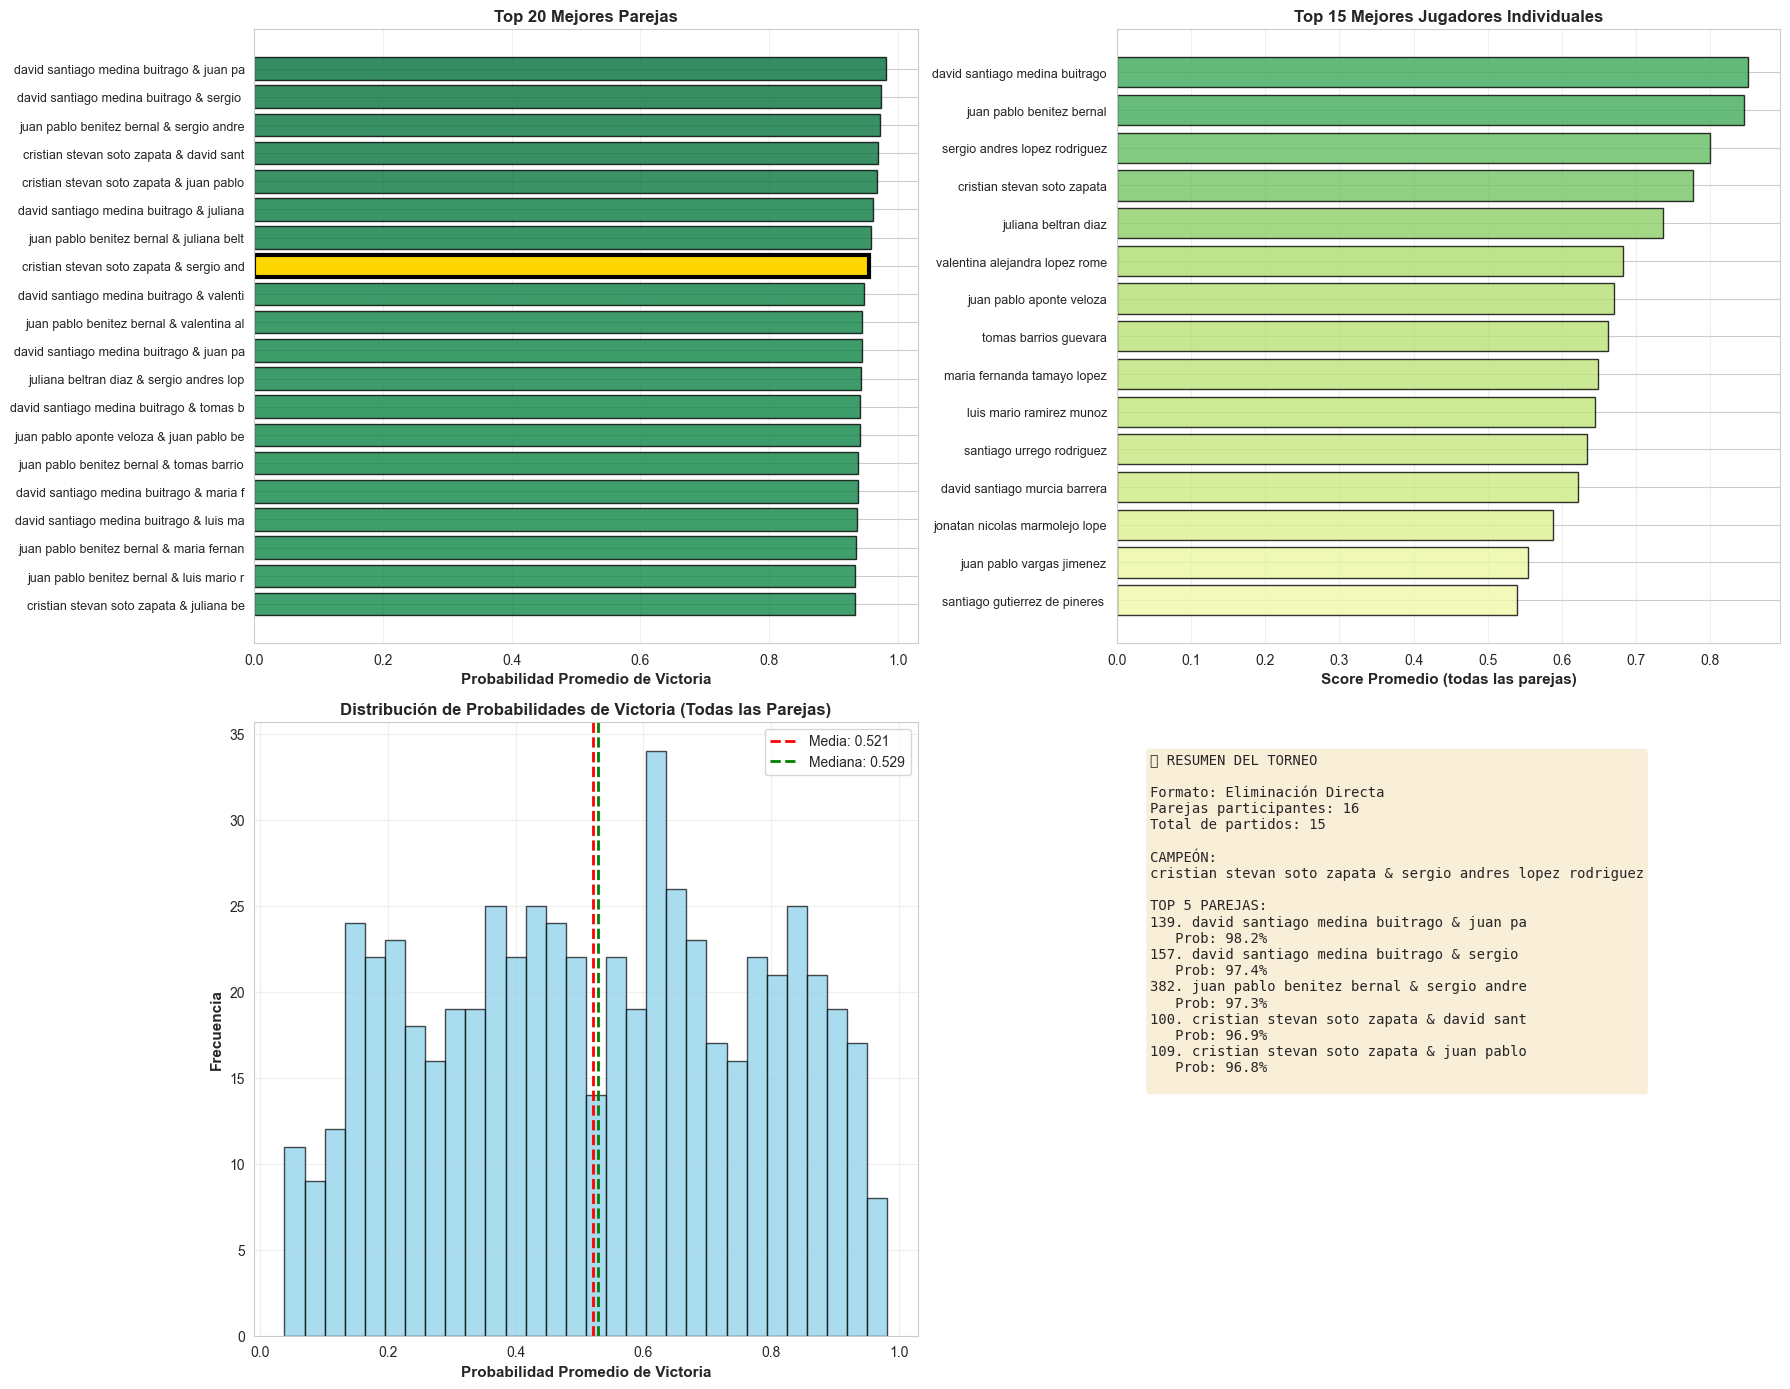


✅ Visualizaciones generadas


In [203]:
# Visualización de resultados del torneo
print("="*80)
print("VISUALIZACIÓN DE RESULTADOS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. Top 20 Parejas por probabilidad de victoria
ax = axes[0, 0]
top_20_parejas = df_ranking_parejas.head(20)
y_pos = np.arange(len(top_20_parejas))
colors_parejas = plt.cm.RdYlGn(top_20_parejas['prob_victoria_promedio'])

ax.barh(y_pos, top_20_parejas['prob_victoria_promedio'], color=colors_parejas, alpha=0.8, edgecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels([p[:40] for p in top_20_parejas['pareja']], fontsize=9)
ax.set_xlabel('Probabilidad Promedio de Victoria', fontsize=11, fontweight='bold')
ax.set_title('Top 20 Mejores Parejas', fontsize=12, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
ax.invert_yaxis()

# Destacar el campeón
campeon_idx = top_20_parejas[top_20_parejas['pareja'] == campeon].index
if len(campeon_idx) > 0:
    campeon_pos = list(top_20_parejas.index).index(campeon_idx[0])
    ax.barh(campeon_pos, top_20_parejas.iloc[campeon_pos]['prob_victoria_promedio'], 
            color='gold', alpha=1, edgecolor='black', linewidth=3)

# 2. Top 15 Jugadores Individuales
ax = axes[0, 1]
top_15_jugadores = df_ranking_jugadores.head(15)
y_pos_jug = np.arange(len(top_15_jugadores))
colors_jug = plt.cm.RdYlGn(top_15_jugadores['score_promedio'])

ax.barh(y_pos_jug, top_15_jugadores['score_promedio'], color=colors_jug, alpha=0.8, edgecolor='black')
ax.set_yticks(y_pos_jug)
ax.set_yticklabels([j[:30] for j in top_15_jugadores['jugador']], fontsize=9)
ax.set_xlabel('Score Promedio (todas las parejas)', fontsize=11, fontweight='bold')
ax.set_title('Top 15 Mejores Jugadores Individuales', fontsize=12, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
ax.invert_yaxis()

# 3. Distribución de probabilidades de victoria
ax = axes[1, 0]
ax.hist(df_ranking_parejas['prob_victoria_promedio'], bins=30, alpha=0.7, 
        color='skyblue', edgecolor='black')
ax.axvline(df_ranking_parejas['prob_victoria_promedio'].mean(), 
          color='red', linestyle='--', linewidth=2, label=f'Media: {df_ranking_parejas["prob_victoria_promedio"].mean():.3f}')
ax.axvline(df_ranking_parejas['prob_victoria_promedio'].median(), 
          color='green', linestyle='--', linewidth=2, label=f'Mediana: {df_ranking_parejas["prob_victoria_promedio"].median():.3f}')
ax.set_xlabel('Probabilidad Promedio de Victoria', fontsize=11, fontweight='bold')
ax.set_ylabel('Frecuencia', fontsize=11, fontweight='bold')
ax.set_title('Distribución de Probabilidades de Victoria (Todas las Parejas)', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)

# 4. Brackets del torneo - Tabla de resultados por ronda
ax = axes[1, 1]
ax.axis('off')

# Crear texto resumen del torneo
texto_torneo = f"🏆 RESUMEN DEL TORNEO\n\n"
texto_torneo += f"Formato: Eliminación Directa\n"
texto_torneo += f"Parejas participantes: {num_parejas_torneo}\n"
texto_torneo += f"Total de partidos: {len(df_resultados_torneo)}\n\n"
texto_torneo += f"CAMPEÓN:\n{campeon}\n\n"

# Mejores 5 parejas
texto_torneo += "TOP 5 PAREJAS:\n"
for idx, row in df_ranking_parejas.head(5).iterrows():
    texto_torneo += f"{idx+1}. {row['pareja'][:40]}\n"
    texto_torneo += f"   Prob: {row['prob_victoria_promedio']:.1%}\n"

ax.text(0.05, 0.95, texto_torneo, transform=ax.transAxes, 
        fontsize=10, verticalalignment='top', 
        fontfamily='monospace',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\n✅ Visualizaciones generadas")

ANÁLISIS DE CONSISTENCIA - MÚLTIPLES SIMULACIONES

⏳ Ejecutando 100 simulaciones...

RONDA 1 - 16 parejas

  Partido 1:
    david santiago medina buitrago & juan pablo benitez bernal (54.9%)
      vs
    david santiago medina buitrago & sergio andres lopez rodriguez (45.1%)
    ✅ Ganador: david santiago medina buitrago & sergio andres lopez rodriguez

  Partido 2:
    juan pablo benitez bernal & sergio andres lopez rodriguez (54.9%)
      vs
    cristian stevan soto zapata & david santiago medina buitrago (45.1%)
    ✅ Ganador: cristian stevan soto zapata & david santiago medina buitrago

  Partido 3:
    cristian stevan soto zapata & juan pablo benitez bernal (54.9%)
      vs
    david santiago medina buitrago & juliana beltran diaz (45.1%)
    ✅ Ganador: david santiago medina buitrago & juliana beltran diaz

  Partido 4:
    juan pablo benitez bernal & juliana beltran diaz (54.9%)
      vs
    cristian stevan soto zapata & sergio andres lopez rodriguez (45.1%)
    ✅ Ganador: juan pab

,pareja,campeonatos,frecuencia
0,david santiago medina buitrago & juliana beltr...,13,0.13
1,david santiago medina buitrago & juan pablo be...,13,0.13
3,david santiago medina buitrago & valentina ale...,8,0.08
9,juan pablo benitez bernal & sergio andres lope...,8,0.08
5,david santiago medina buitrago & tomas barrios...,7,0.07
7,cristian stevan soto zapata & sergio andres lo...,7,0.07
6,david santiago medina buitrago & juan pablo ap...,6,0.06
10,juliana beltran diaz & sergio andres lopez rod...,6,0.06
12,cristian stevan soto zapata & david santiago m...,6,0.06
15,david santiago medina buitrago & sergio andres...,6,0.06



📊 ESTADÍSTICAS:
   Pareja más consistente: david santiago medina buitrago & juliana beltran diaz
   Campeonatos ganados: 13/100 (13.0%)
   Total de campeones diferentes: 16


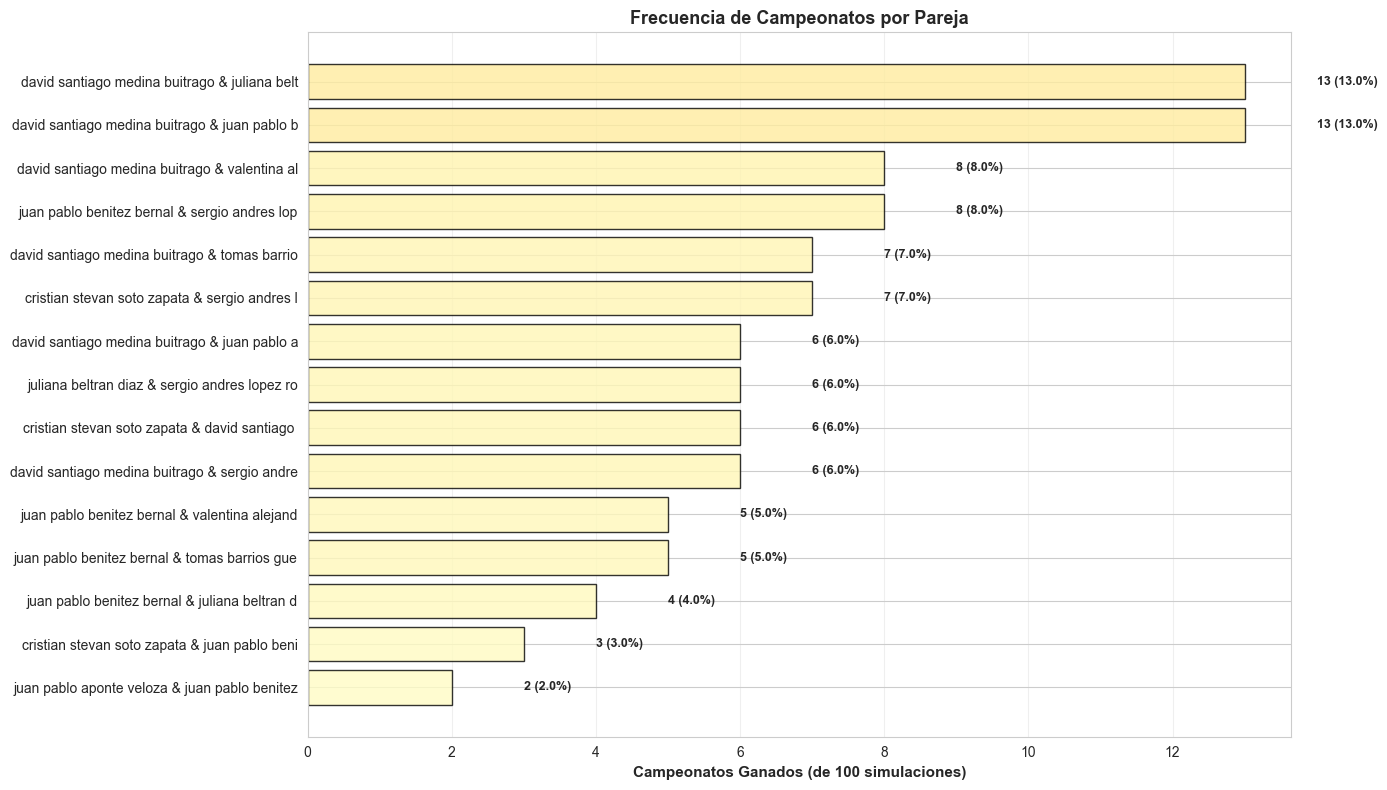

In [204]:
# Análisis de consistencia - Múltiples simulaciones
print("="*80)
print("ANÁLISIS DE CONSISTENCIA - MÚLTIPLES SIMULACIONES")
print("="*80)

num_simulaciones = 100
campeones_frecuencia = {}

print(f"\n⏳ Ejecutando {num_simulaciones} simulaciones...")

for sim in range(num_simulaciones):
    campeon_sim, _ = simular_torneo(
        parejas_torneo, lr_model_eq, scaler_eq, features_equipos, semilla=sim
    )
    
    campeones_frecuencia[campeon_sim] = campeones_frecuencia.get(campeon_sim, 0) + 1
    
    if (sim + 1) % 20 == 0:
        print(f"   Completadas {sim + 1}/{num_simulaciones} simulaciones")

# Ordenar por frecuencia
df_campeones = pd.DataFrame([
    {'pareja': pareja, 'campeonatos': freq, 'frecuencia': freq/num_simulaciones}
    for pareja, freq in campeones_frecuencia.items()
]).sort_values('campeonatos', ascending=False)

print(f"\n✅ Simulaciones completadas")
print(f"\n🏆 PAREJAS QUE GANARON AL MENOS UN TORNEO ({len(df_campeones)} parejas):")
display(df_campeones)

print(f"\n📊 ESTADÍSTICAS:")
print(f"   Pareja más consistente: {df_campeones.iloc[0]['pareja']}")
print(f"   Campeonatos ganados: {df_campeones.iloc[0]['campeonatos']}/{num_simulaciones} ({df_campeones.iloc[0]['frecuencia']:.1%})")
print(f"   Total de campeones diferentes: {len(df_campeones)}")

# Visualización de frecuencia de campeones
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

top_campeones = df_campeones.head(15)
y_pos = np.arange(len(top_campeones))
colors_camp = plt.cm.YlOrRd(top_campeones['frecuencia'])

bars = ax.barh(y_pos, top_campeones['campeonatos'], color=colors_camp, alpha=0.8, edgecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels([p[:45] for p in top_campeones['pareja']], fontsize=10)
ax.set_xlabel(f'Campeonatos Ganados (de {num_simulaciones} simulaciones)', fontsize=11, fontweight='bold')
ax.set_title('Frecuencia de Campeonatos por Pareja', fontsize=13, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
ax.invert_yaxis()

# Añadir valores en las barras
for i, (bar, val, freq) in enumerate(zip(bars, top_campeones['campeonatos'], top_campeones['frecuencia'])):
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2, 
            f'{val} ({freq:.1%})', 
            ha='left', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

## 🚀 EXPORTACIÓN DE DATOS PARA DASHBOARD STREAMLIT

Esta sección exporta todos los archivos necesarios para el dashboard interactivo:
- `modelo_entrenado.pkl`: Modelo de Regresión Logística + Scaler + Features + Métricas
- `tabla_posiciones.csv`: Ranking de equipos con probabilidades de victoria
- `stats_equipos.csv`: Estadísticas completas de cada equipo (features técnicas + nombres amigables)
- `ranking_jugadores.csv`: Ranking individual de jugadores
- `features_modelo.json`: Lista de features utilizadas por el modelo

In [208]:
import os
import json
import joblib

# Crear directorio de exportación
export_dir = 'data_export'
os.makedirs(export_dir, exist_ok=True)

print("="*80)
print("🚀 VERIFICACIÓN Y EXPORTACIÓN DE DATOS PARA DASHBOARD STREAMLIT")
print("="*80)

# ============================================================================
# 1. EXPORTAR MODELO ENTRENADO + SCALER + FEATURES + MÉTRICAS
# ============================================================================
print("\n📦 1. Exportando modelo entrenado...")

modelo_export = {
    'model': lr_model_eq,
    'scaler': scaler_eq,
    'features': features_equipos,
    'metrics': {
        'accuracy': acc_lr_eq,
        'precision': precision_lr_eq,
        'recall': recall_lr_eq,
        'f1_score': f1_lr_eq,
        'roc_auc': roc_auc_lr_eq
    }
}

joblib.dump(modelo_export, os.path.join(export_dir, 'modelo_entrenado.pkl'))
print(f"   ✅ modelo_entrenado.pkl guardado")
print(f"      - Modelo: LogisticRegression")
print(f"      - Features: {len(features_equipos)}")
print(f"      - ROC-AUC: {roc_auc_lr_eq:.4f}")
print(f"      - Accuracy: {acc_lr_eq:.4f}")
print(f"      - F1-Score: {f1_lr_eq:.4f}")

# ============================================================================
# 2. EXPORTAR LISTA DE FEATURES (JSON)
# ============================================================================
print("\n📋 2. Exportando lista de features...")

with open(os.path.join(export_dir, 'features_modelo.json'), 'w', encoding='utf-8') as f:
    json.dump(features_equipos, f, indent=2, ensure_ascii=False)

print(f"   ✅ features_modelo.json guardado")
print(f"      - Total features: {len(features_equipos)}")
print(f"      - Features: {', '.join(features_equipos[:5])}...")

# ============================================================================
# 3. EXPORTAR TABLA DE POSICIONES (usando stats_equipos existente)
# ============================================================================
print("\n🏆 3. Exportando tabla de posiciones...")

# Usar stats_equipos que ya tiene las predicciones
if 'tabla_posiciones' in dir():
    # Guardar tabla de posiciones
    tabla_posiciones.to_csv(os.path.join(export_dir, 'tabla_posiciones.csv'), index=False, encoding='utf-8')
    print(f"   ✅ tabla_posiciones.csv guardado")
    print(f"      - Total equipos: {len(tabla_posiciones)}")
    if len(tabla_posiciones) > 0:
        print(f"      - Top 3:")
        for i in range(min(3, len(tabla_posiciones))):
            print(f"        {i+1}. {tabla_posiciones.iloc[i]['Equipo']}: {tabla_posiciones.iloc[i]['Prob. Victoria']*100:.2f}%")
else:
    print(f"   ⚠️  Variable 'tabla_posiciones' no encontrada")

# ============================================================================
# 4. EXPORTAR ESTADÍSTICAS COMPLETAS DE EQUIPOS
# ============================================================================
print("\n📊 4. Exportando estadísticas de equipos...")

# Usar stats_equipos existente
if 'stats_equipos' in dir():
    # Guardar stats_equipos
    stats_equipos.to_csv(os.path.join(export_dir, 'stats_equipos.csv'), index=False, encoding='utf-8')
    print(f"   ✅ stats_equipos.csv guardado")
    print(f"      - Total equipos: {len(stats_equipos)}")
    print(f"      - Columnas: {len(stats_equipos.columns)}")
else:
    print(f"   ⚠️  Variable 'stats_equipos' no encontrada")

# ============================================================================
# 5. EXPORTAR RANKING DE JUGADORES
# ============================================================================
print("\n👤 5. Exportando ranking de jugadores...")

# Calcular score promedio por jugador basado en tabla_posiciones
if 'tabla_posiciones' in dir() and len(tabla_posiciones) > 0:
    jugadores_scores = {}
    
    for _, row in tabla_posiciones.iterrows():
        j1 = row['Jugador 1']
        j2 = row['Jugador 2']
        prob = row['Prob. Victoria']
        
        if j1 not in jugadores_scores:
            jugadores_scores[j1] = []
        if j2 not in jugadores_scores:
            jugadores_scores[j2] = []
        
        jugadores_scores[j1].append(prob)
        jugadores_scores[j2].append(prob)
    
    # Calcular promedio
    df_ranking_jugadores = pd.DataFrame([
        {
            'Jugador': jugador,
            'Score Promedio': np.mean(probs),
            'Parejas': len(probs)
        }
        for jugador, probs in jugadores_scores.items()
    ]).sort_values('Score Promedio', ascending=False).reset_index(drop=True)
    
    df_ranking_jugadores['Ranking'] = range(1, len(df_ranking_jugadores) + 1)
    df_ranking_jugadores = df_ranking_jugadores[['Ranking', 'Jugador', 'Score Promedio', 'Parejas']]
    
    # Guardar ranking de jugadores
    df_ranking_jugadores.to_csv(os.path.join(export_dir, 'ranking_jugadores.csv'), index=False, encoding='utf-8')
    print(f"   ✅ ranking_jugadores.csv guardado")
    print(f"      - Total jugadores: {len(df_ranking_jugadores)}")
    if len(df_ranking_jugadores) > 0:
        print(f"      - Top 3:")
        for i in range(min(3, len(df_ranking_jugadores))):
            print(f"        {i+1}. {df_ranking_jugadores.iloc[i]['Jugador']}: {df_ranking_jugadores.iloc[i]['Score Promedio']*100:.2f}%")
else:
    print(f"   ⚠️  Variable 'tabla_posiciones' no encontrada o vacía")

# ============================================================================
# RESUMEN FINAL - VERIFICAR ARCHIVOS
# ============================================================================
print("\n" + "="*80)
print("✅ VERIFICACIÓN DE ARCHIVOS EXPORTADOS")
print("="*80)

archivos_requeridos = [
    'modelo_entrenado.pkl',
    'features_modelo.json',
    'tabla_posiciones.csv',
    'stats_equipos.csv',
    'ranking_jugadores.csv'
]

print(f"\n📁 Archivos en '{export_dir}/':")
archivos_ok = 0
for i, archivo in enumerate(archivos_requeridos, 1):
    filepath = os.path.join(export_dir, archivo)
    if os.path.exists(filepath):
        size = os.path.getsize(filepath)
        print(f"   {i}. ✅ {archivo:30s} ({size:,} bytes)")
        archivos_ok += 1
    else:
        print(f"   {i}. ❌ {archivo:30s} (NO ENCONTRADO)")

print(f"\n📊 Resumen: {archivos_ok}/{len(archivos_requeridos)} archivos presentes")

if archivos_ok == len(archivos_requeridos):
    print(f"\n🎯 ✅ Dashboard listo para ejecutar con: streamlit run app.py")
else:
    print(f"\n⚠️  Faltan algunos archivos. Revisa la ejecución del notebook.")

print("="*80)

🚀 VERIFICACIÓN Y EXPORTACIÓN DE DATOS PARA DASHBOARD STREAMLIT

📦 1. Exportando modelo entrenado...
   ✅ modelo_entrenado.pkl guardado
      - Modelo: LogisticRegression
      - Features: 18
      - ROC-AUC: 0.6122
      - Accuracy: 0.4286
      - F1-Score: 0.5000

📋 2. Exportando lista de features...
   ✅ features_modelo.json guardado
      - Total features: 18
      - Features: velocidad_media_equipo_mps, distancia_total_equipo_m, distancia_media_por_frame_m, distancia_media_pelota_equipo_m, golpes_totales_equipo...

🏆 3. Exportando tabla de posiciones...
   ✅ tabla_posiciones.csv guardado
      - Total equipos: 595
      - Top 3:
        1. andrea julieth sosa rodriguez & carlos felipe andrade saenz: 19.95%
        2. juan pablo vargas jimenez & nicolas navarro: 19.95%
        3. juan pablo vargas jimenez & nikol sofia avendano: 19.95%

📊 4. Exportando estadísticas de equipos...
   ✅ stats_equipos.csv guardado
      - Total equipos: 595
      - Columnas: 13

👤 5. Exportando ranking 